# RCFM Model

## 1. Import modules and helper functions

In [1]:
# Modules
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from scipy.optimize import curve_fit

# Helper functions from DataAid.py and DataImport.py
import DataAid
import DataImporter

# Numerically stable class of functions from Neros_v2.py
import Neros_v2

## 2. Load Galaxy Data

In [2]:
# Load Galaxy Data
sparcGalaxies = DataAid.GetGalaxyData("data/Sparc/Rotmod_LTG/")
littleDataGalaxies = DataAid.GetGalaxyData("data/little-data-things/data/")
lcmGalaxies = DataAid.GetGalaxyData("data/LCMFits/data/")

# Load Milky Way Model Data
xueSofueGalaxies = DataAid.GetGalaxyData("data/XueSofue/")
mcGaughMW = DataAid.GetGalaxyData("data/McGaugh/")

# Create array of Milky Way radius and vlum tuples from model data
MWXueSofue = np.array(xueSofueGalaxies['MW_lum'])
MWMcGaugh = np.array(mcGaughMW['MW_lumMcGaugh'])


## 3. Create Neros class instance

In [3]:
# Create Neros instance to perform calculations with the supplied Milky Way model as comparison
# Change Milky Way model by changing the variable in the parentheses
# i.e. neros_fns = Neros_v2.Neros(MWModelVariable)

neros_fns = Neros_v2.Neros(MWXueSofue)
MW_name = "MWXueSofue" # Change this if you change the MW model in neros_fns!
MW_rad = neros_fns.mw_rad
MW_vLum = neros_fns.mw_vLum
MW_phi = neros_fns.mw_phi

MW_vLum_interp_func = neros_fns.mw_vLum_interp

## 4. Designate outfile name, initialize variables, and designate galaxy sample

In [4]:
MW_phi

array([3.31593939e-07, 1.49405364e-06, 2.10183160e-06, ...,
       4.62346349e-06, 4.62350590e-06, 4.62355371e-06])

In [5]:
# This designates which galaxy sample to fit
galaxies = sparcGalaxies


## 5. Fit galaxies, print and save graphs

/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


galaxyName is: NGC5371_rotmod
chi_squared is: 1.5551529917951334
alpha is: 10.32759264195298
disk_scale is: 0.6560282305347802
bulge_scale is: 1.0
--------------------------
Running average chi_squared: 1.5551529917951334
galaxyName is: UGC07603_rotmod
chi_squared is: 13.525642689628006
alpha is: 0.15309650448019035
disk_scale is: 1.0817886518123778
bulge_scale is: 1.0
--------------------------
Running average chi_squared: 7.540397840711569
galaxyName is: NGC4138_rotmod
chi_squared is: 0.7773088466323979
alpha is: 3.2535254412537618
disk_scale is: 0.958802362613128
bulge_scale is: 3.534296600368053e-05
--------------------------
Running average chi_squared: 5.286034842685178
galaxyName is: UGC12632_rotmod
chi_squared is: 2.3111078566523746
alpha is: 9.698973715924182e-11
disk_scale is: 2.2056912938896587
bulge_scale is: 1.0
--------------------------
Running average chi_squared: 4.542303096176978
galaxyName is: NGC5033_rotmod
chi_squared is: 12.015246901759628
alpha is: 12.05631526773

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


galaxyName is: NGC4013_rotmod
chi_squared is: 0.807584009453355
alpha is: 4.341895676269877
disk_scale is: 0.7354734831518962
bulge_scale is: 0.5839541750423992
--------------------------
Running average chi_squared: 12.813199157981316
galaxyName is: UGC07323_rotmod
chi_squared is: 1.9405309415141943
alpha is: 3.658907647956463e-13
disk_scale is: 1.1793363984598282
bulge_scale is: 1.0
--------------------------
Running average chi_squared: 12.318986966323719
galaxyName is: NGC3953_rotmod
chi_squared is: 0.591353041456177
alpha is: 1.4750426301789591e-06
disk_scale is: 0.9219915053925568
bulge_scale is: 1.0
--------------------------
Running average chi_squared: 11.809089839155565
galaxyName is: NGC4559_rotmod
chi_squared is: 4.376670067367859
alpha is: 1.2546048871116033
disk_scale is: 0.6294626762607178
bulge_scale is: 1.0
--------------------------
Running average chi_squared: 11.499405681997743
galaxyName is: NGC6015_rotmod
chi_squared is: 54.31203330897067
alpha is: 1.3560953442096

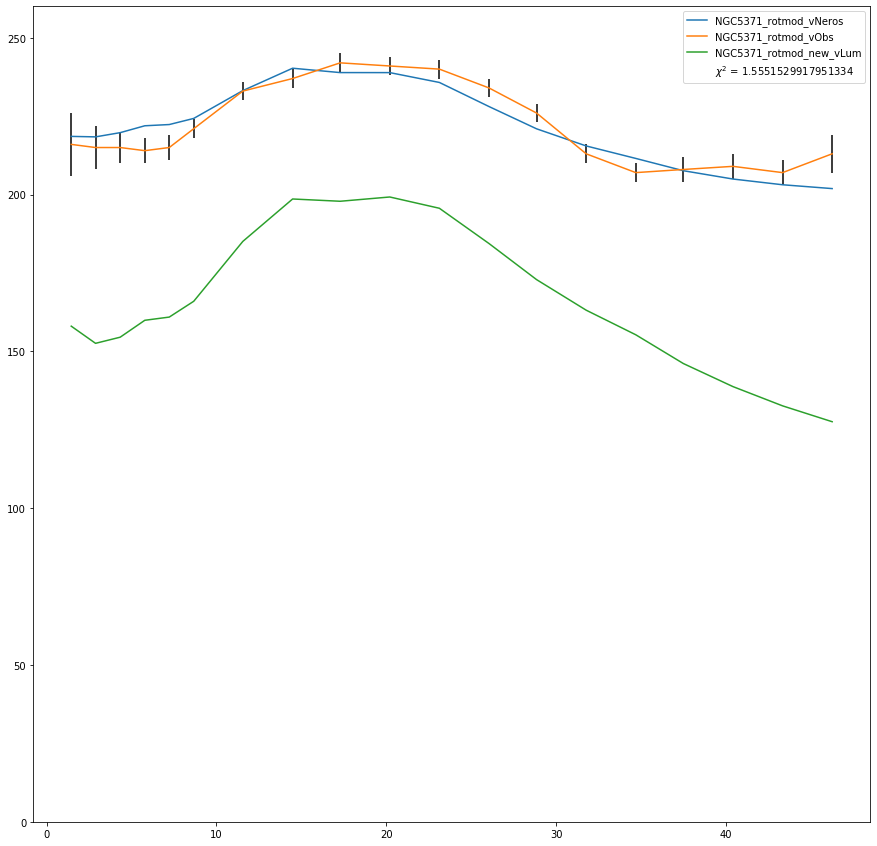

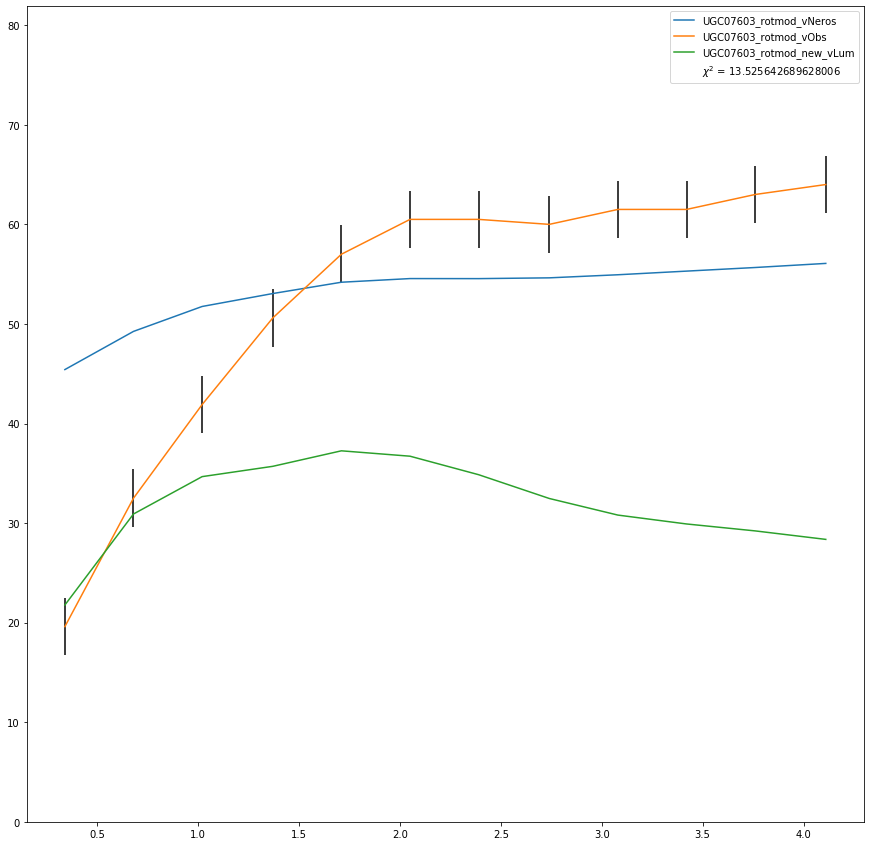

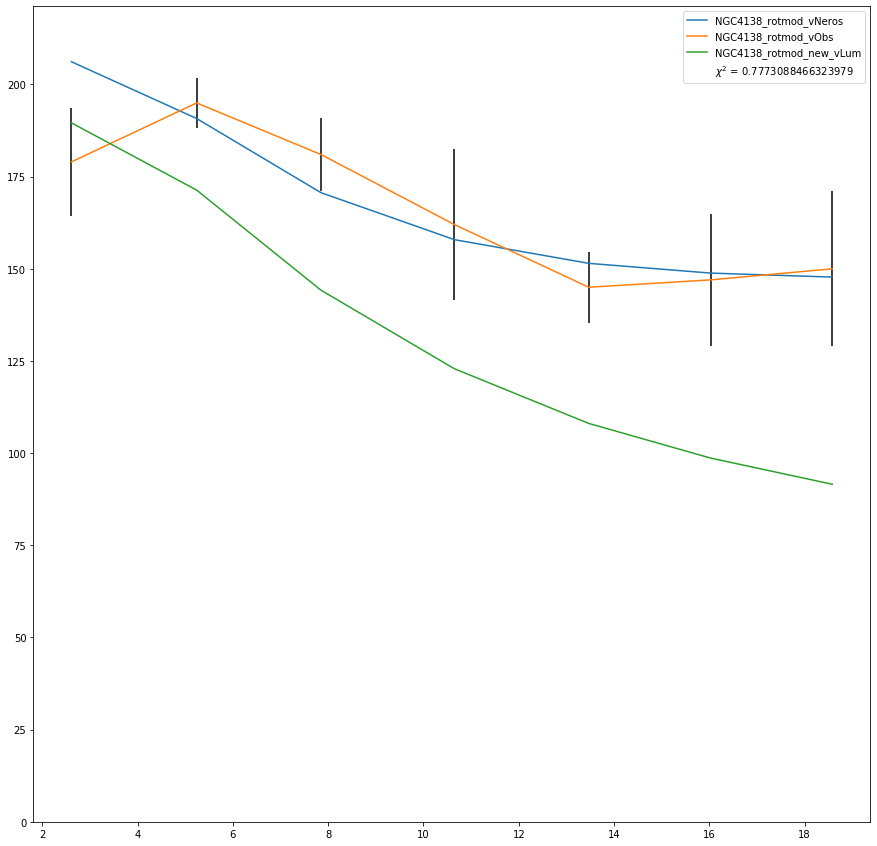

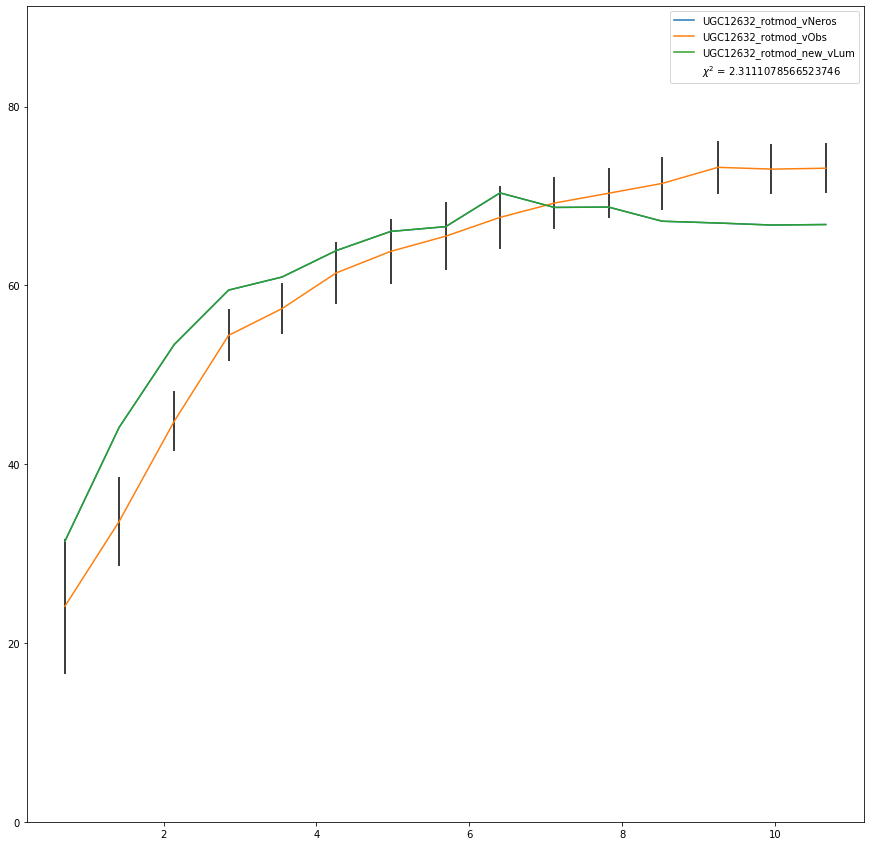

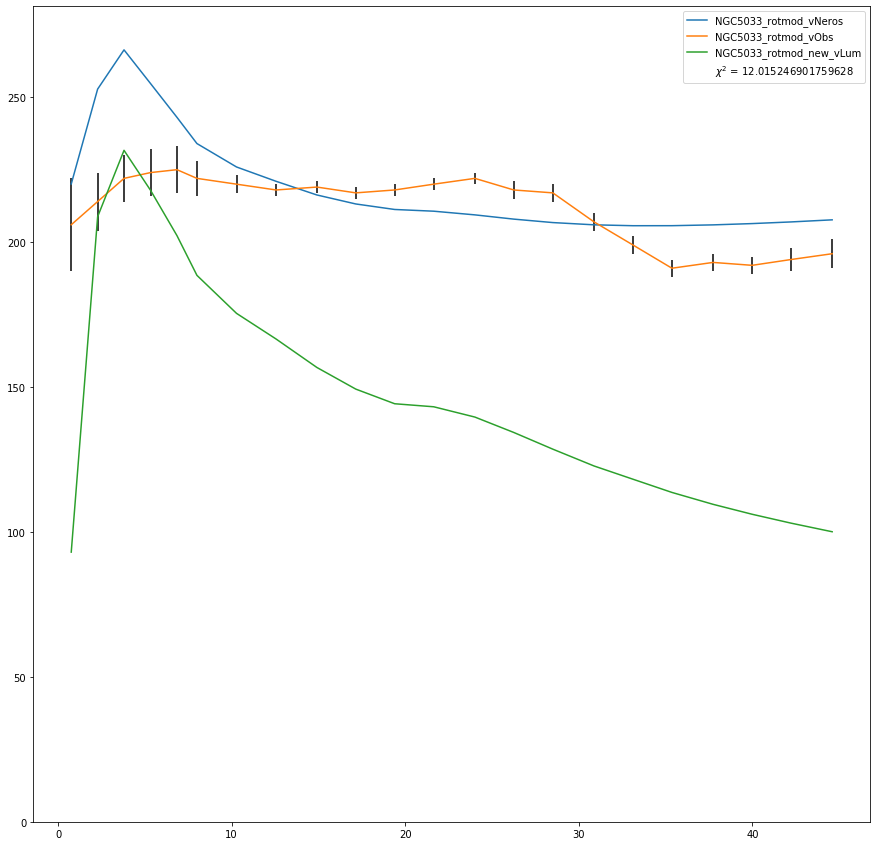

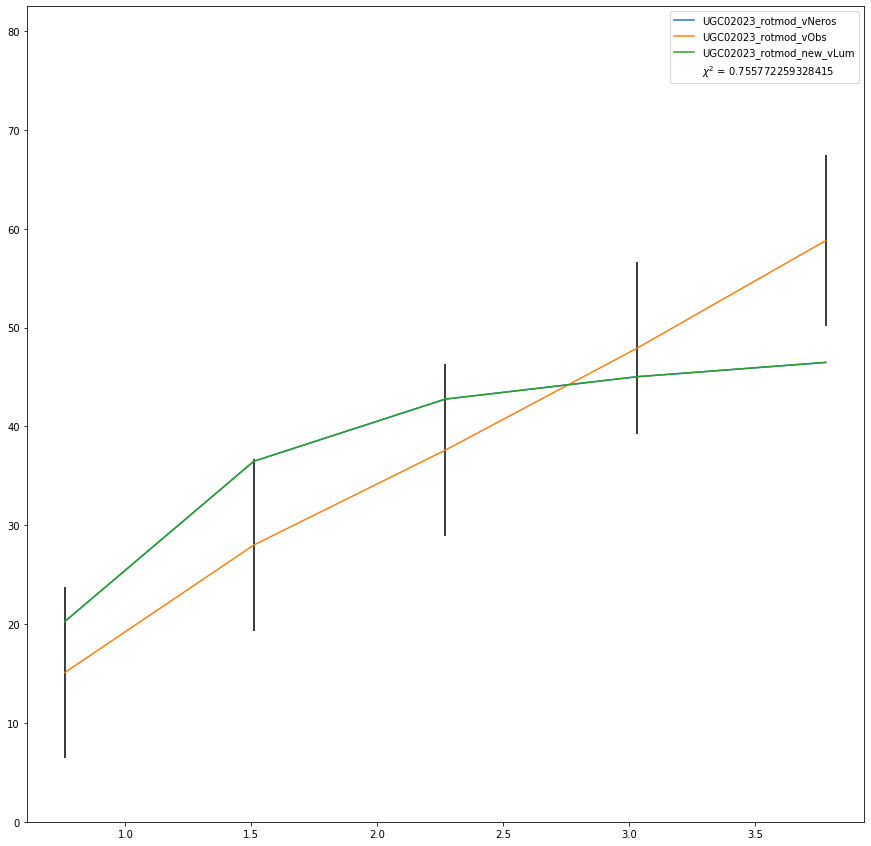

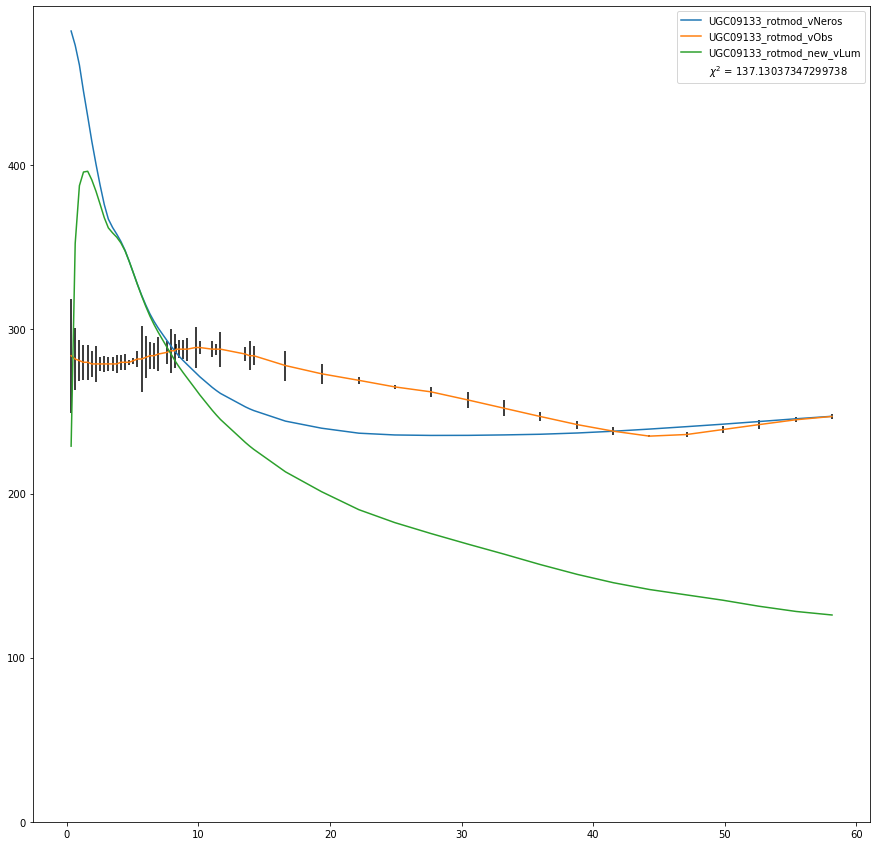

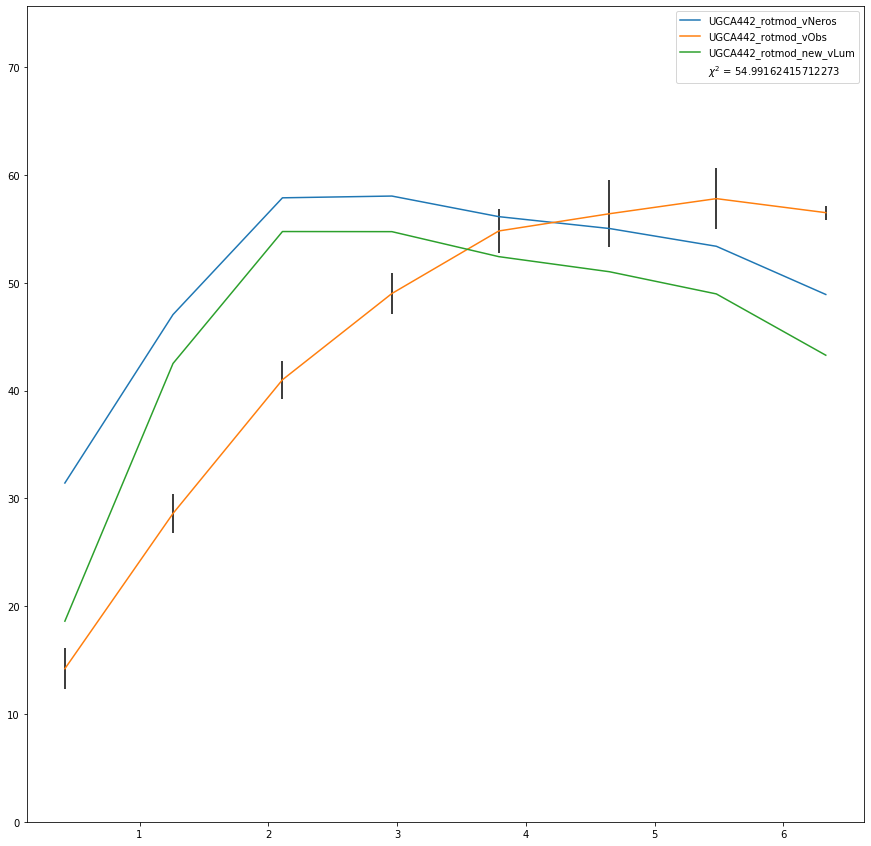

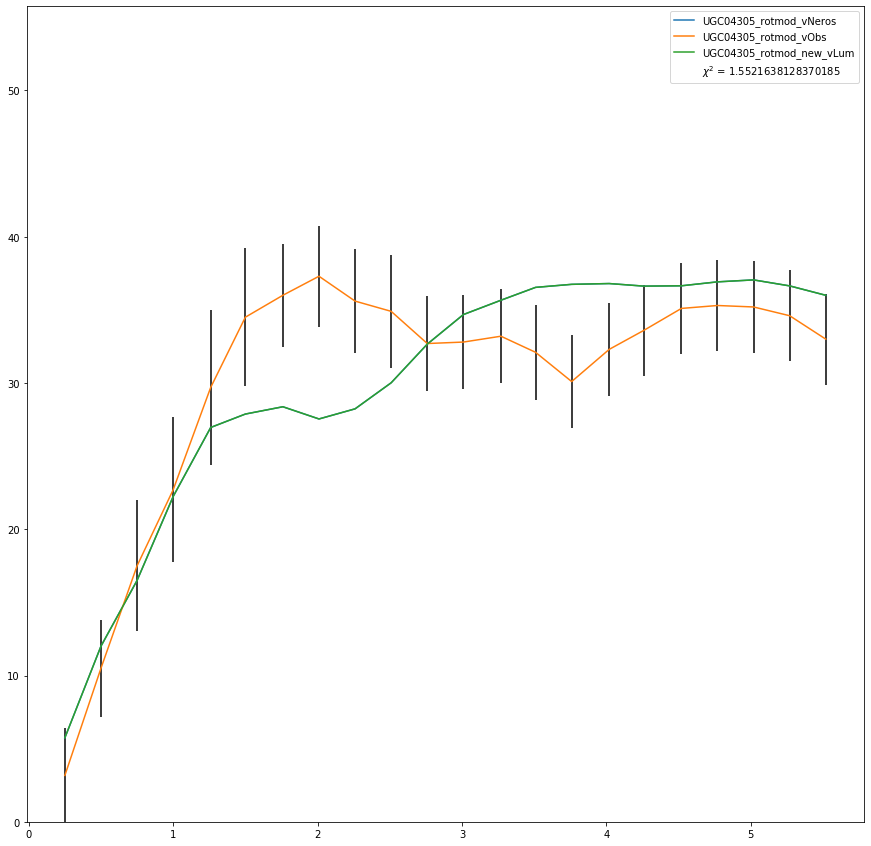

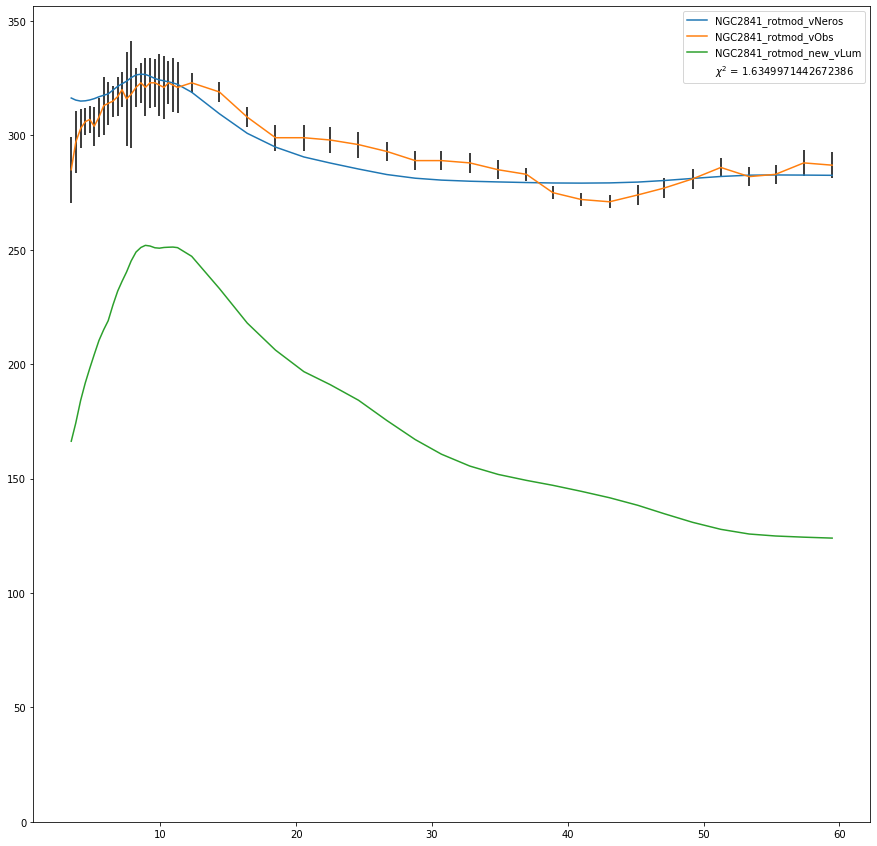

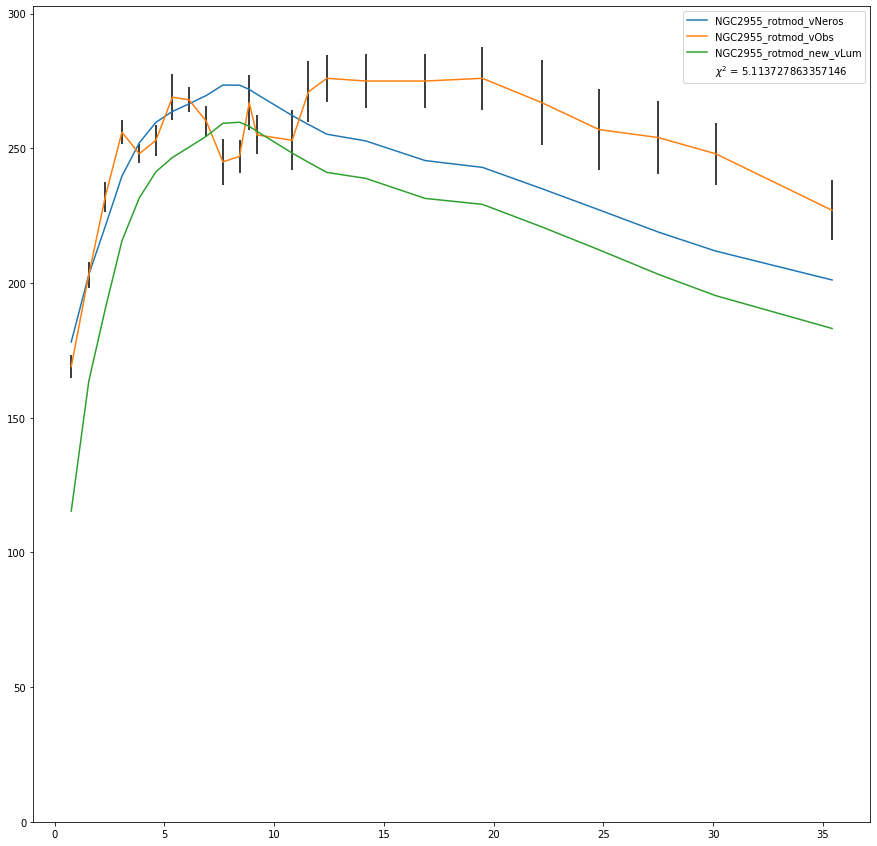

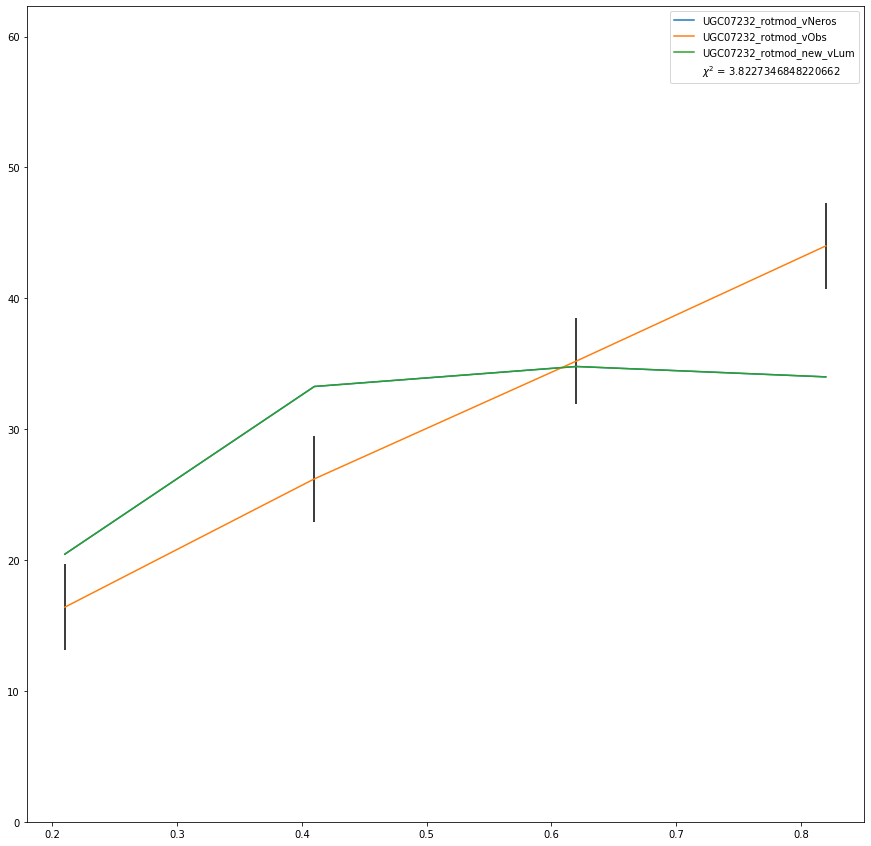

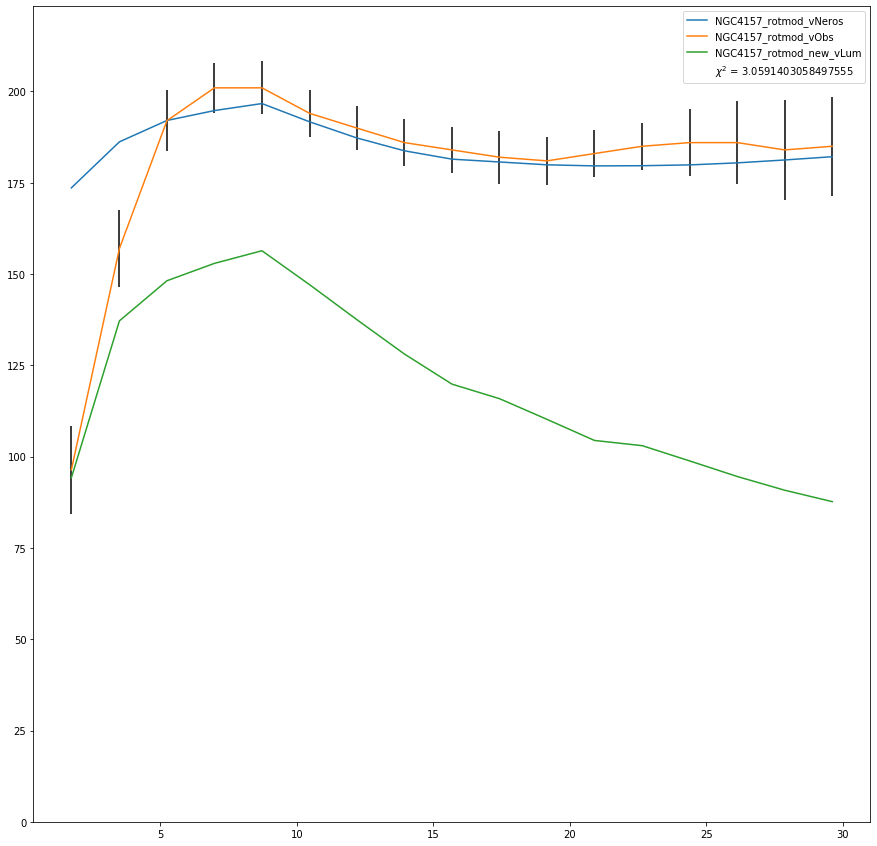

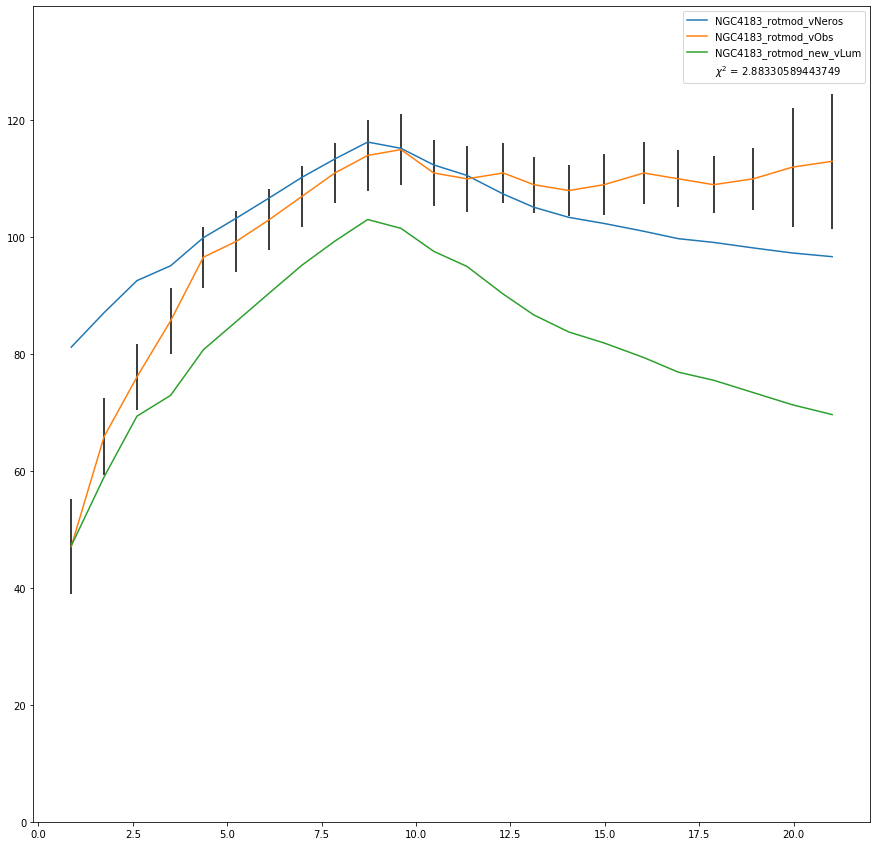

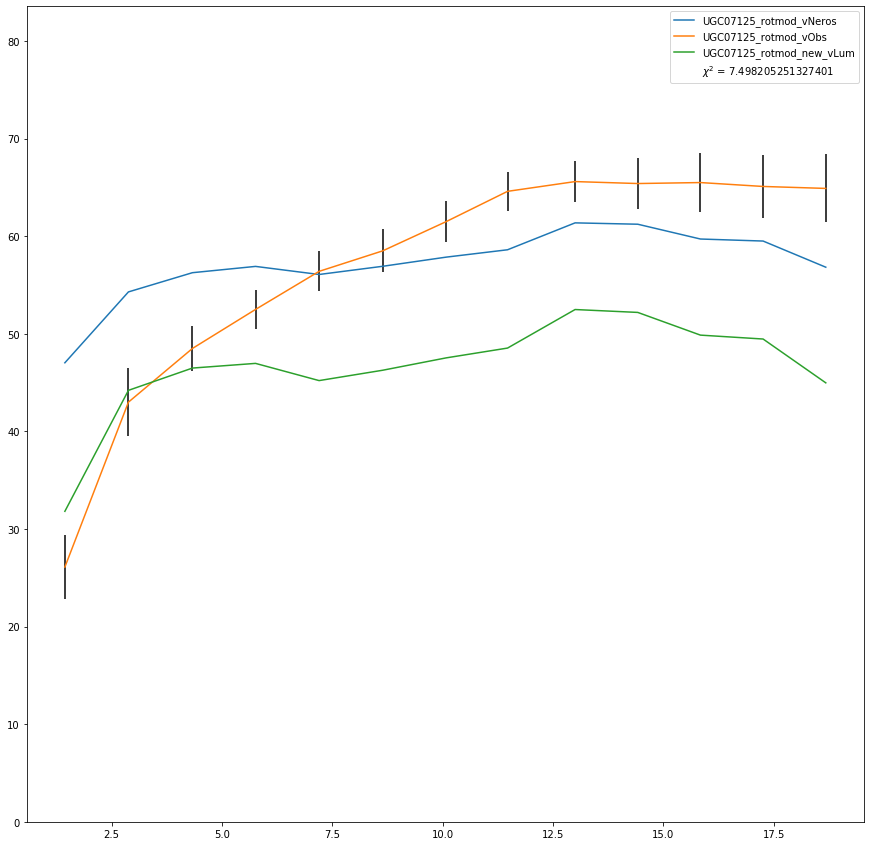

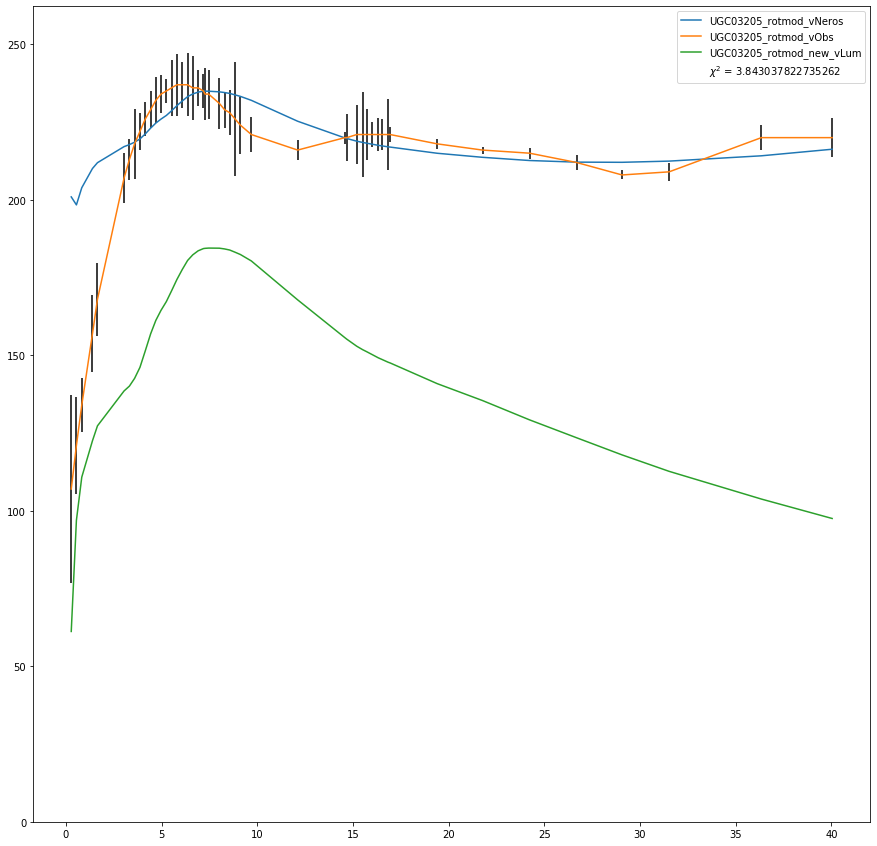

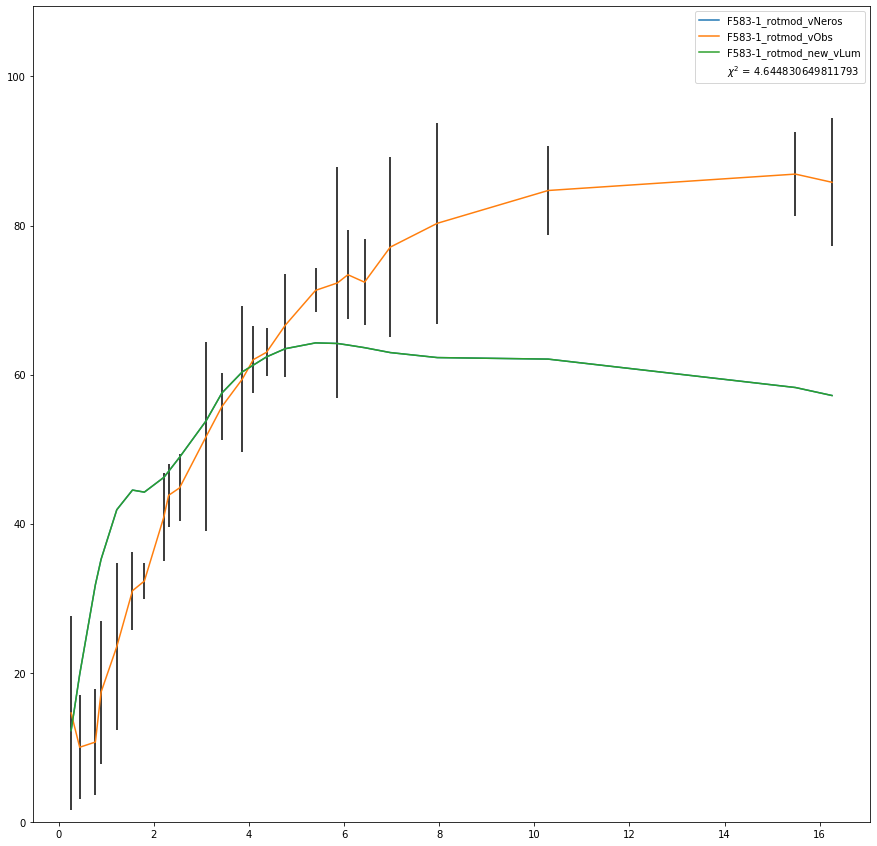

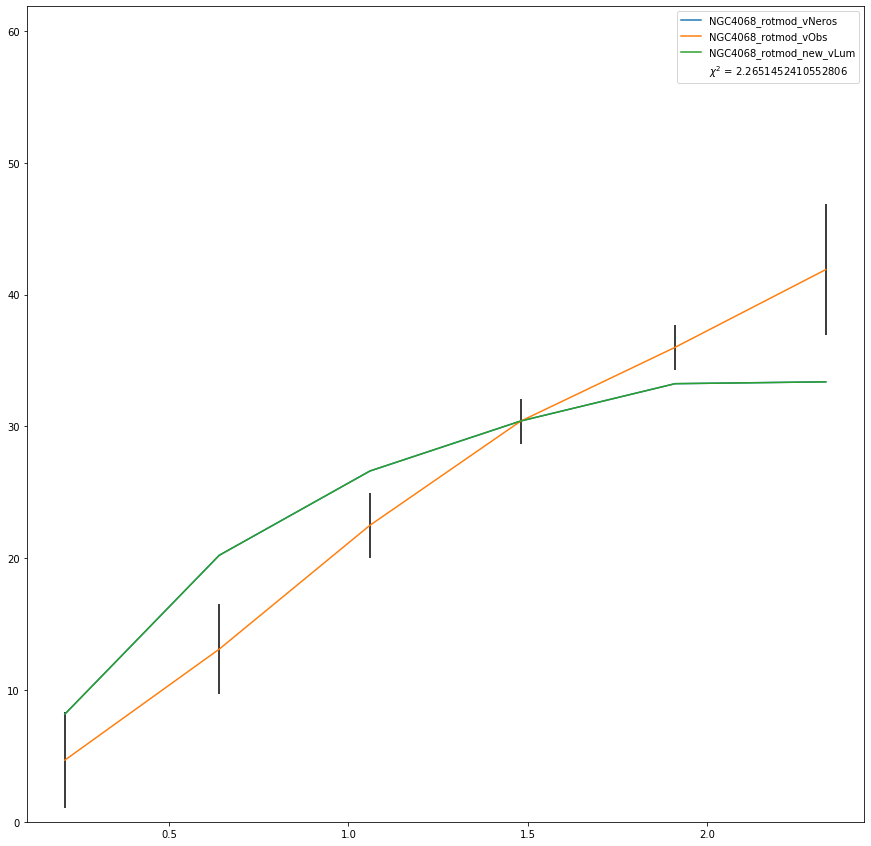

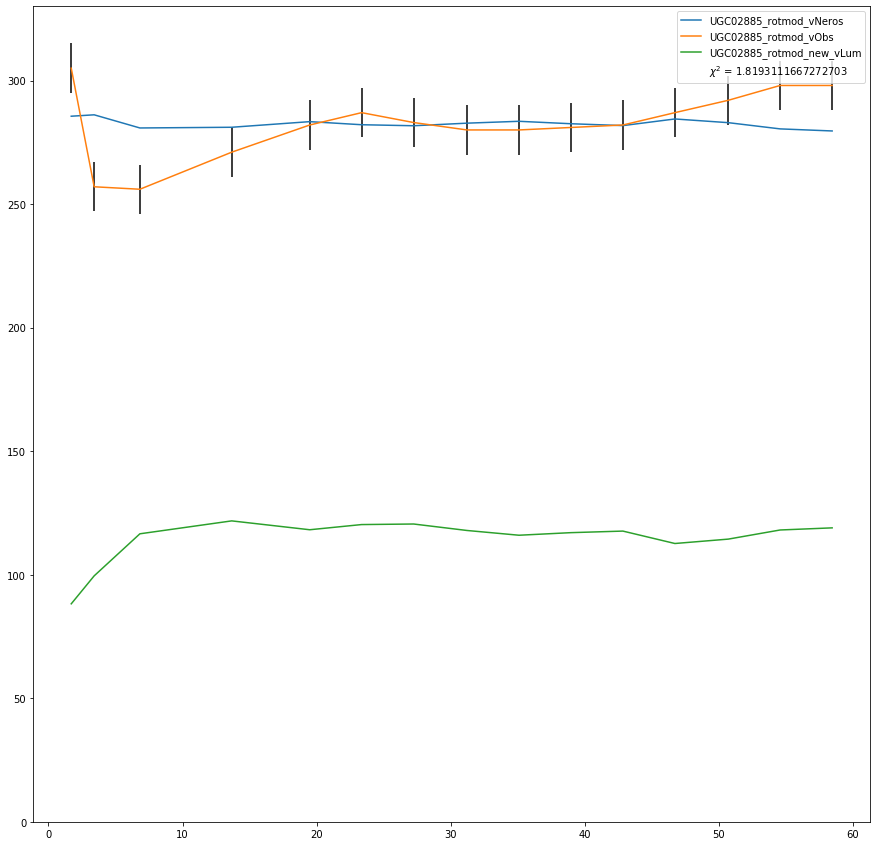

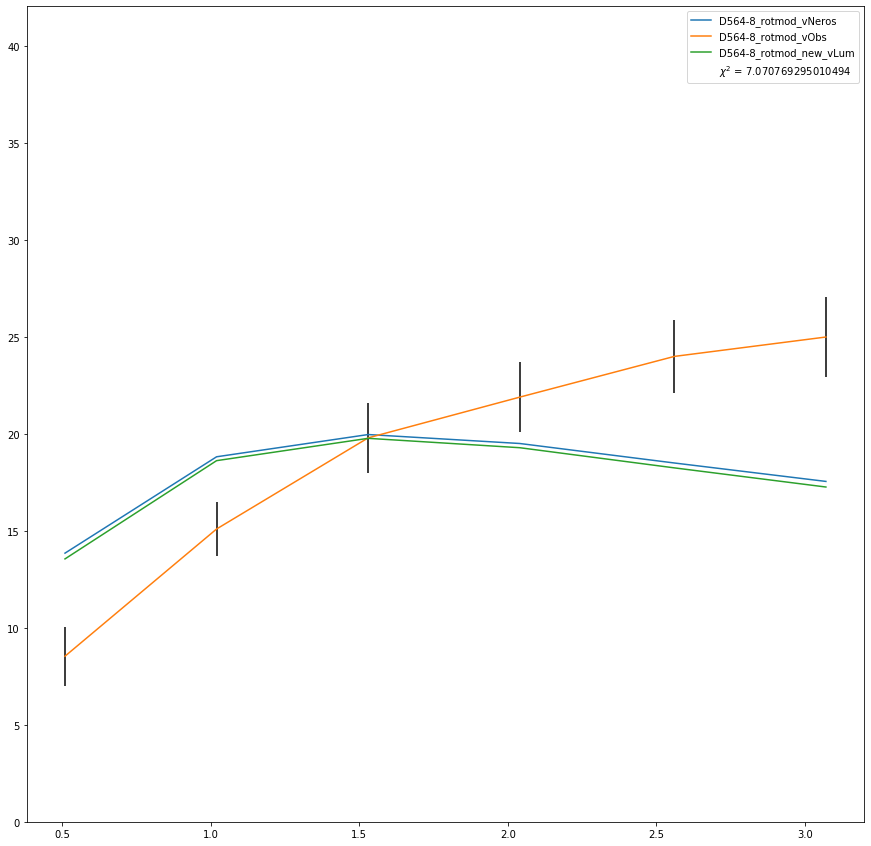

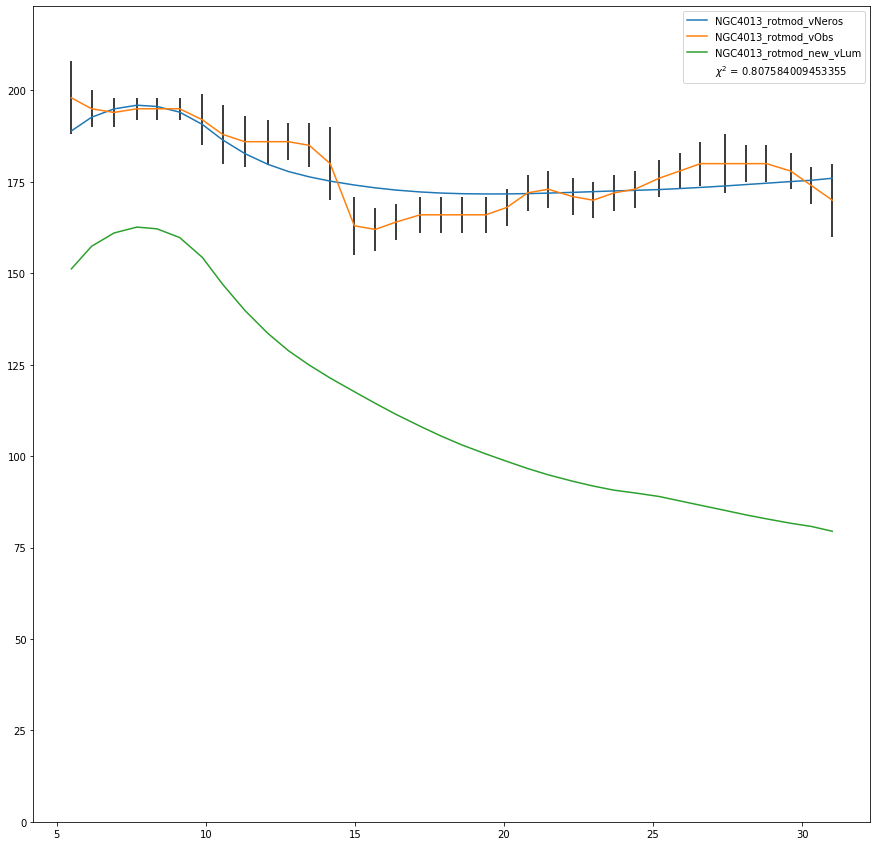

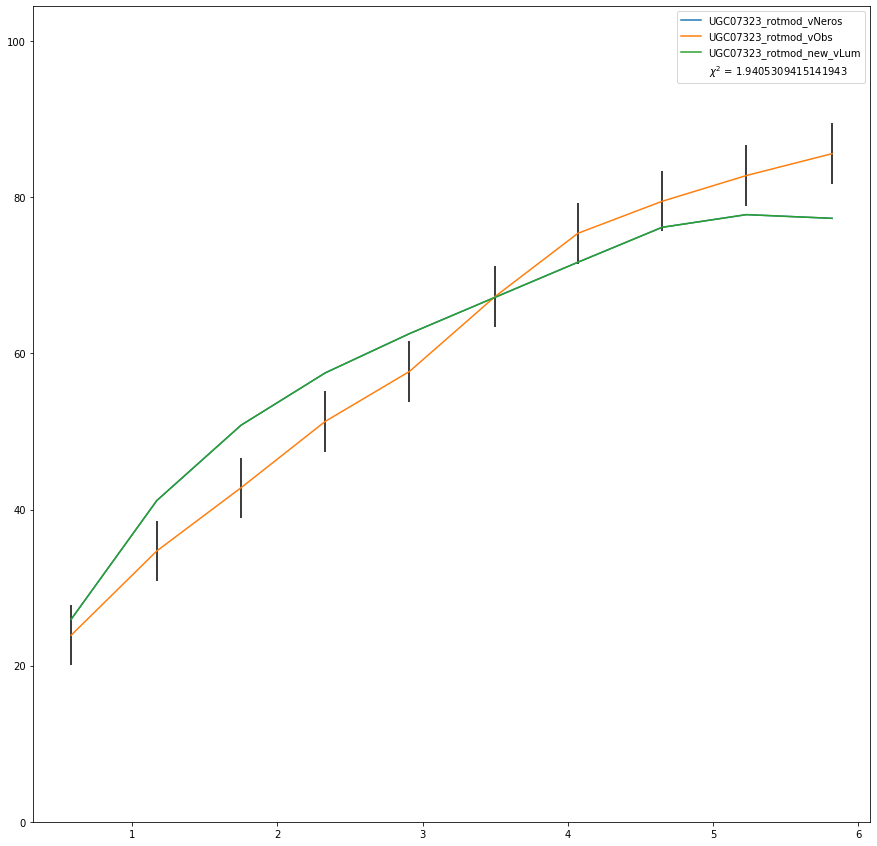

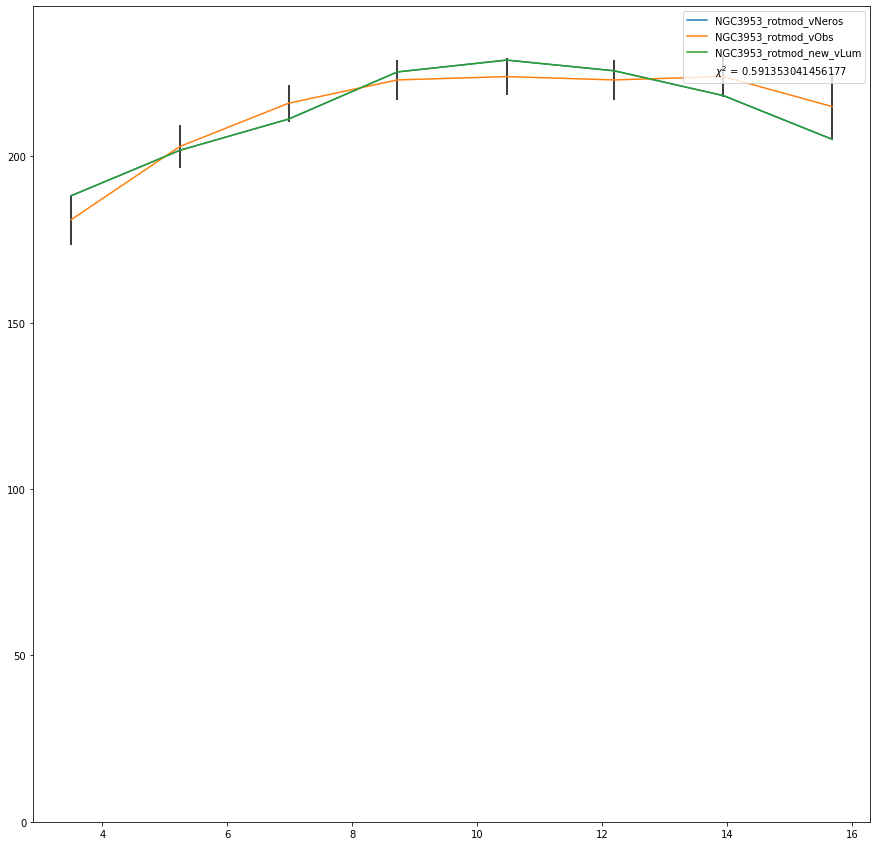

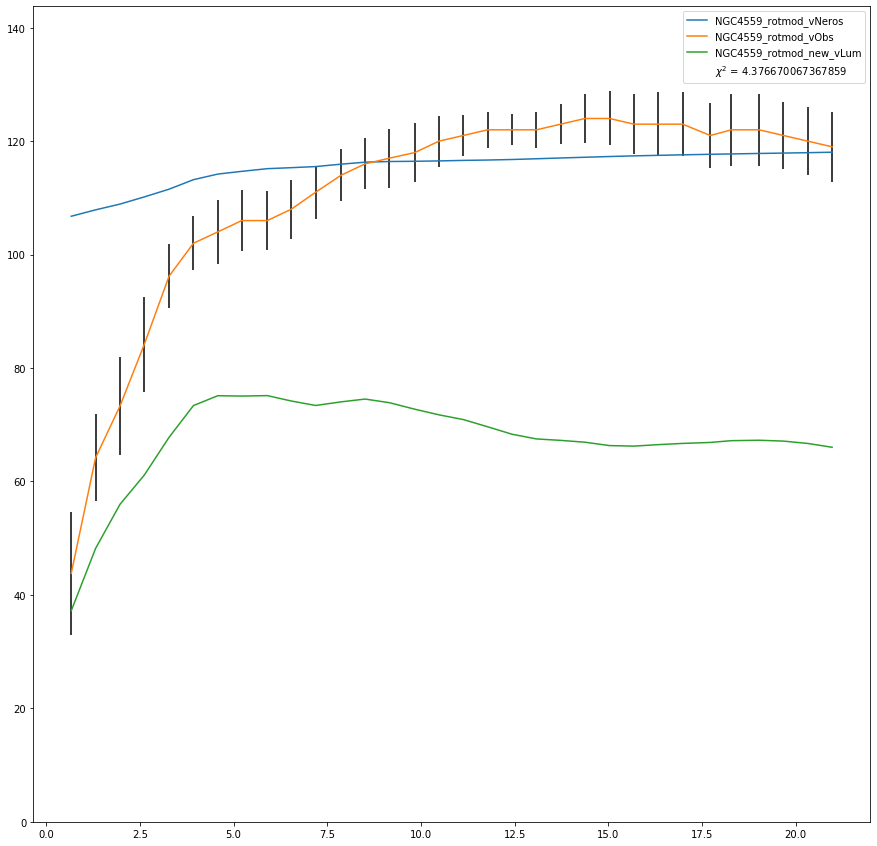

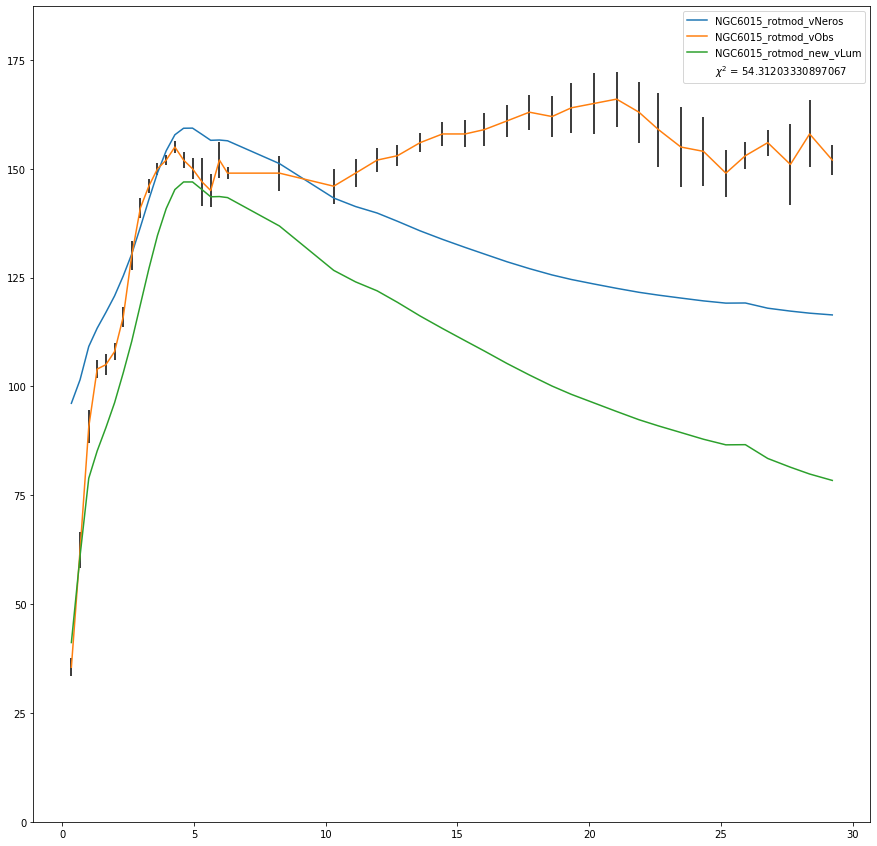

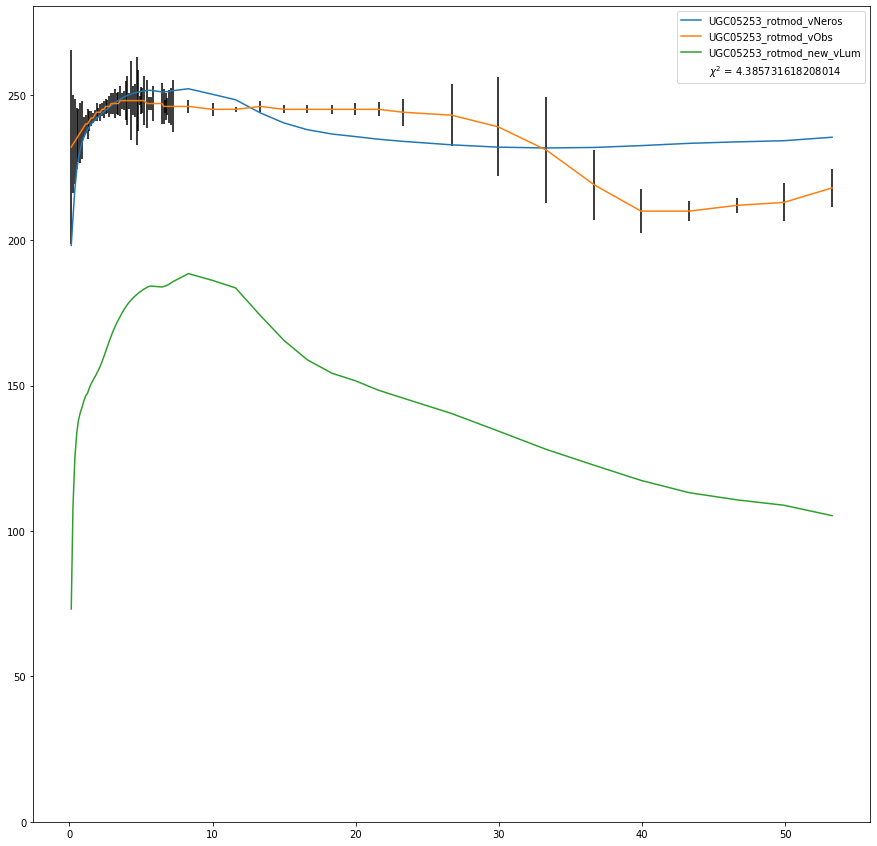

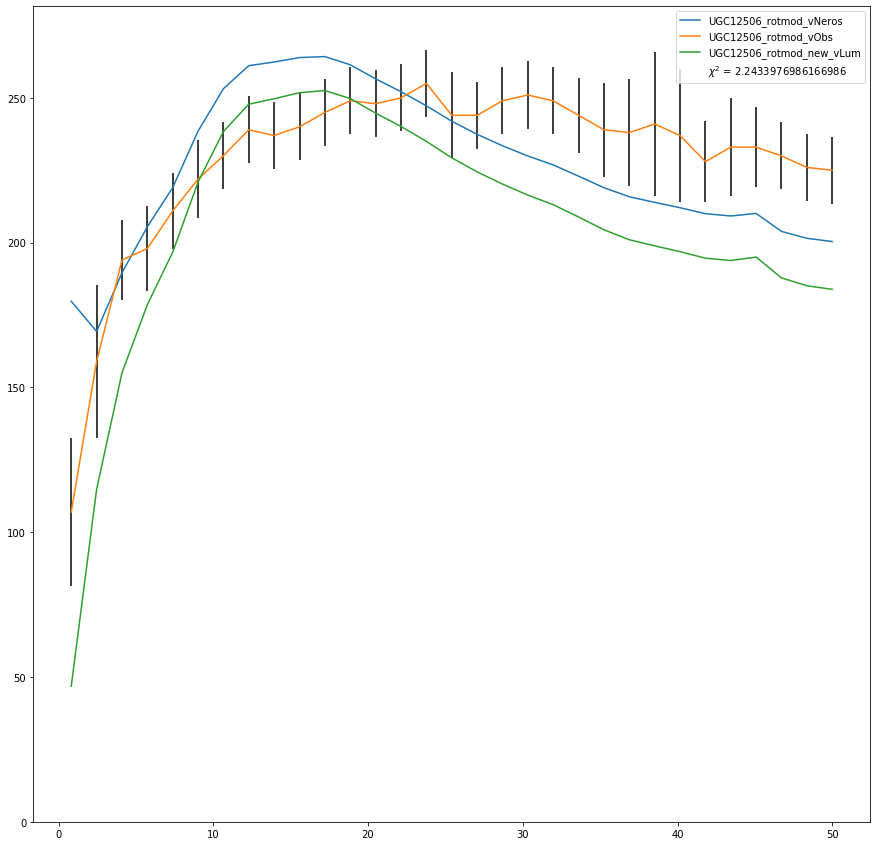

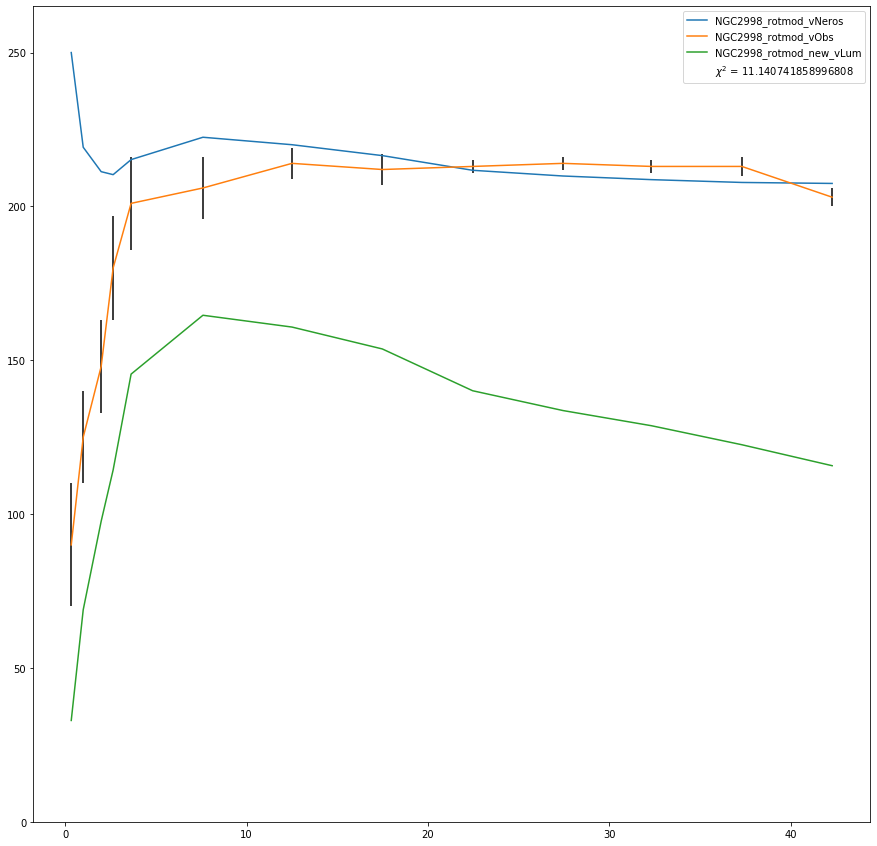

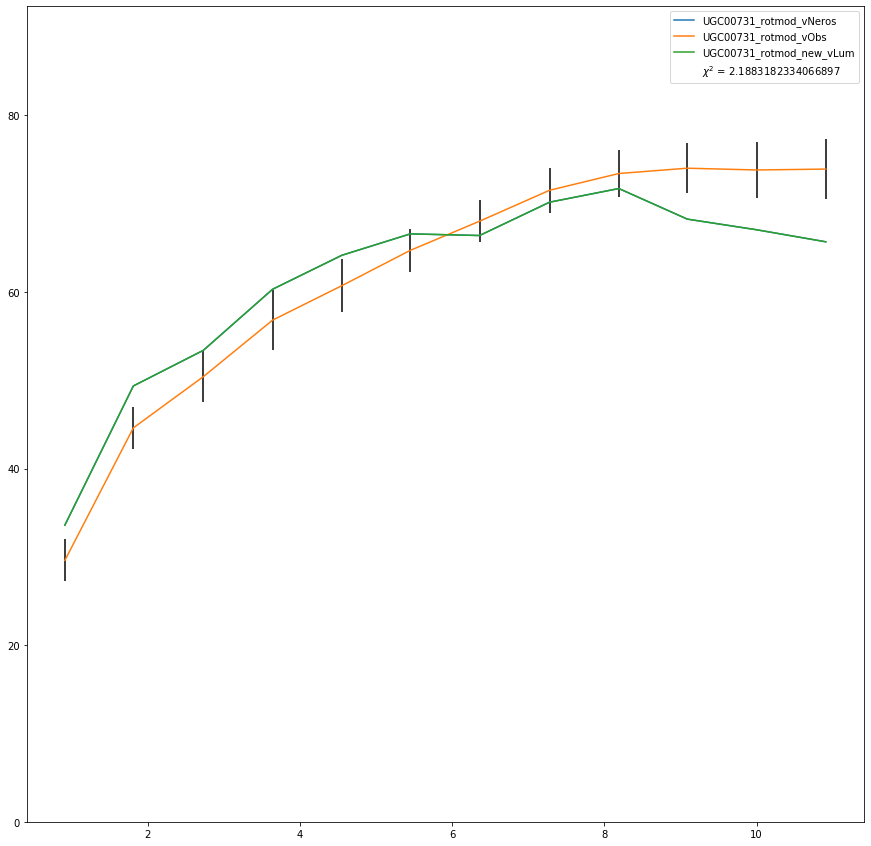

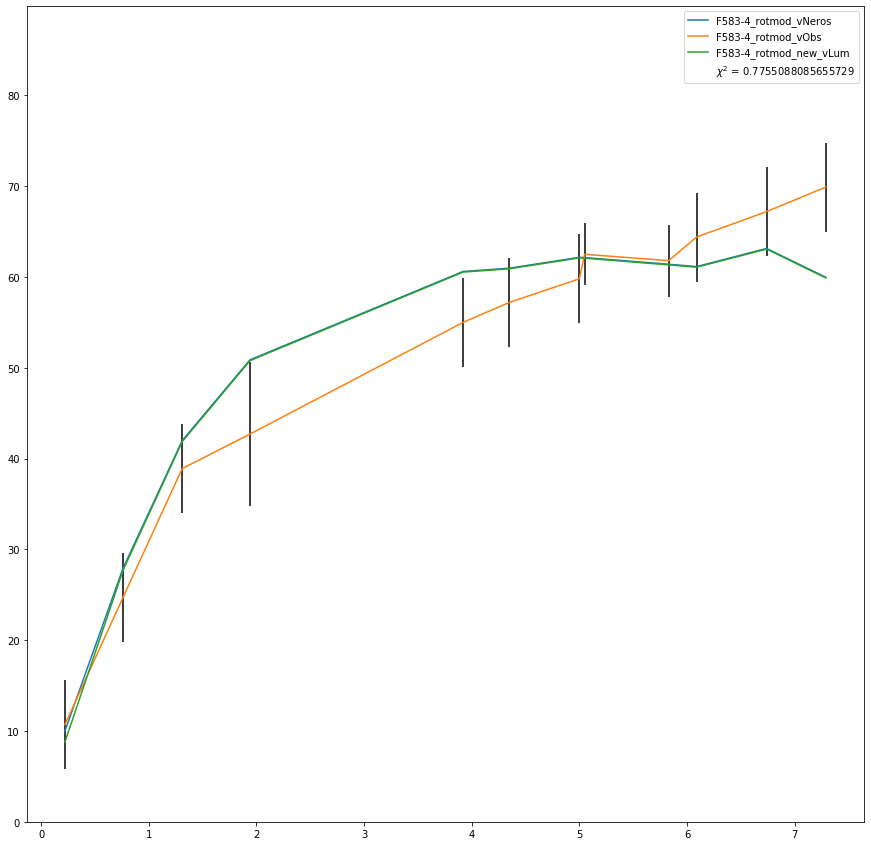

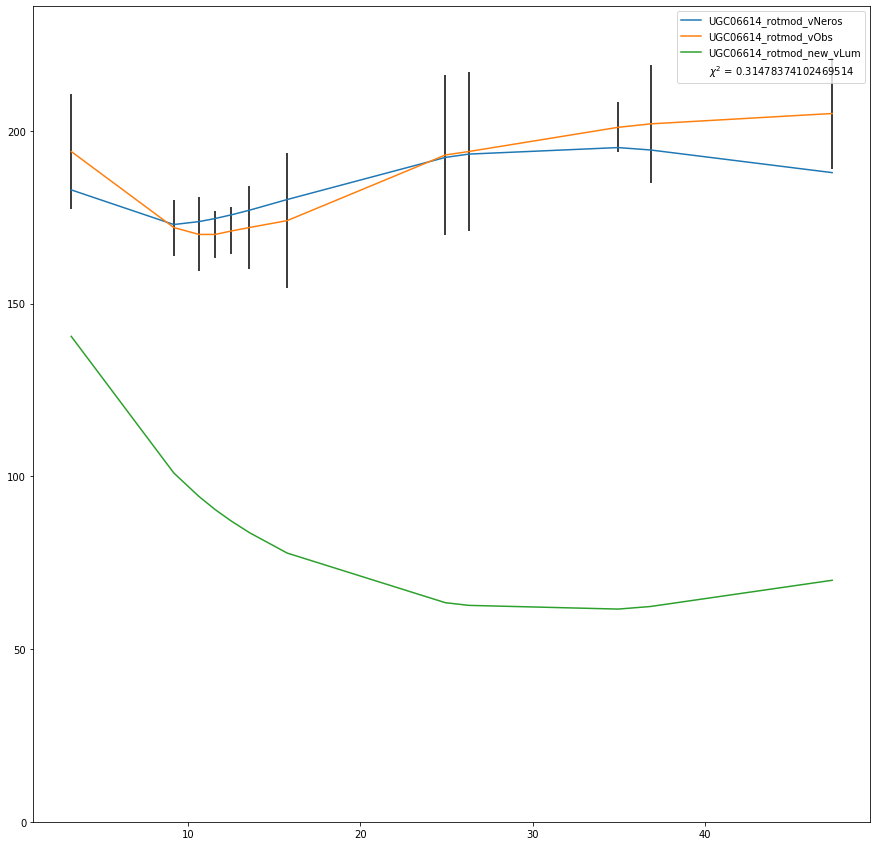

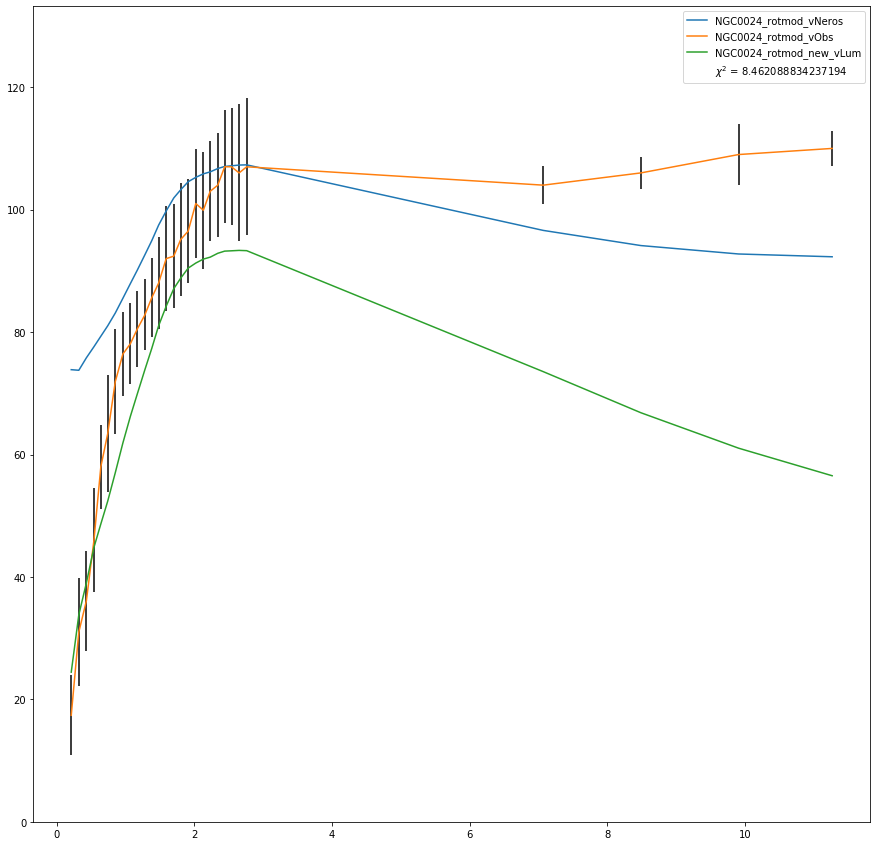

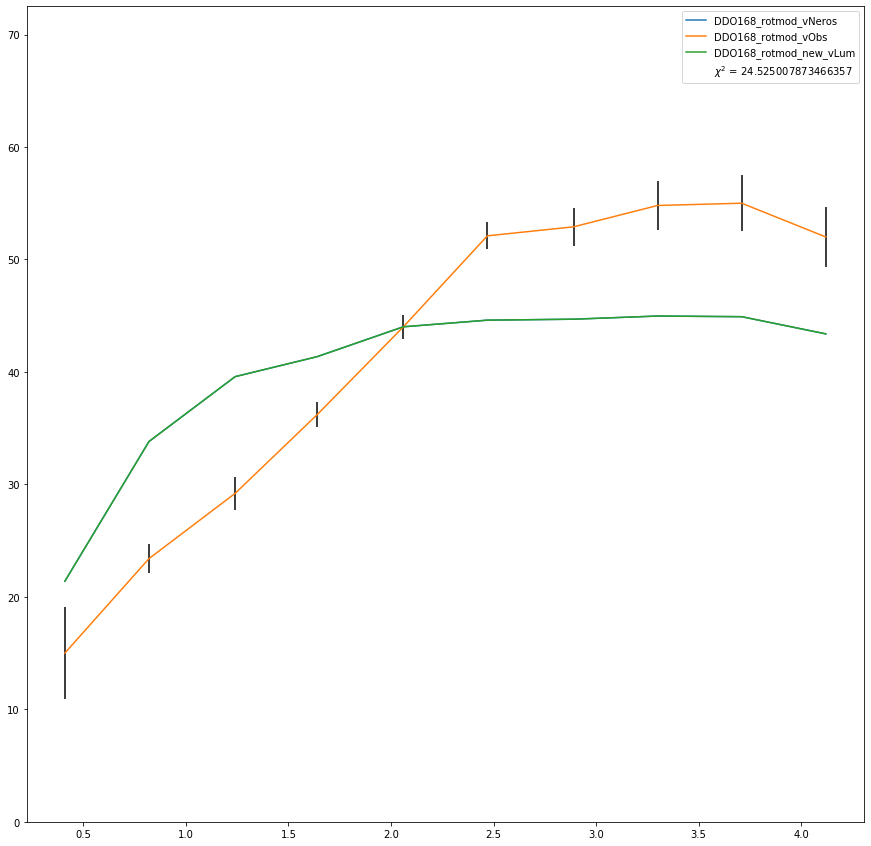

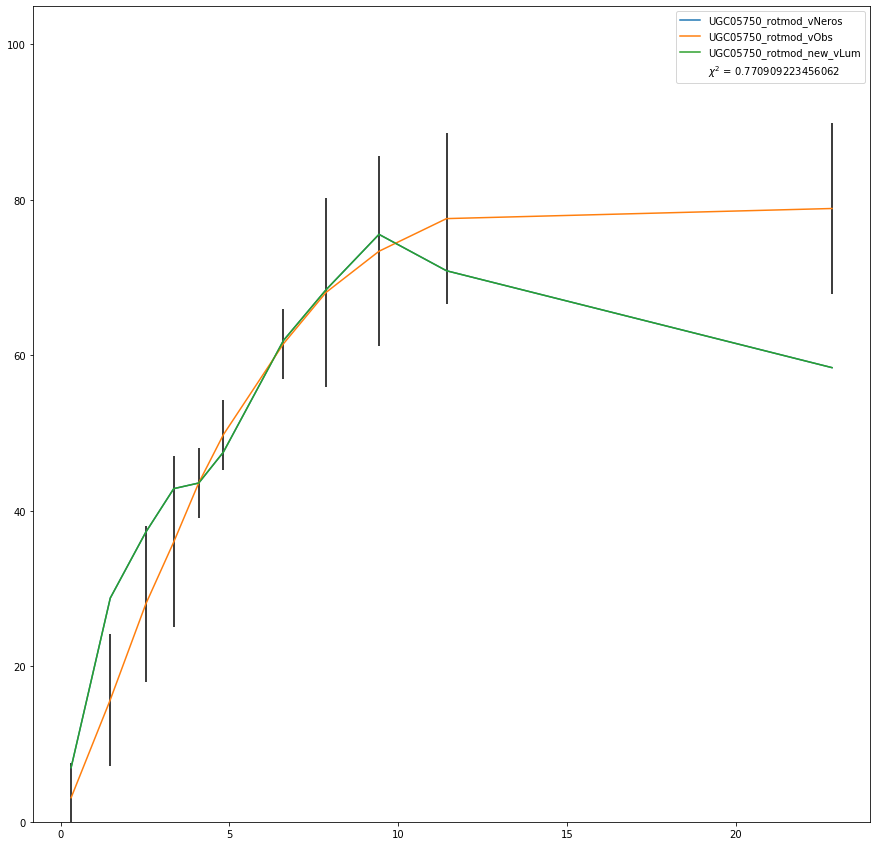

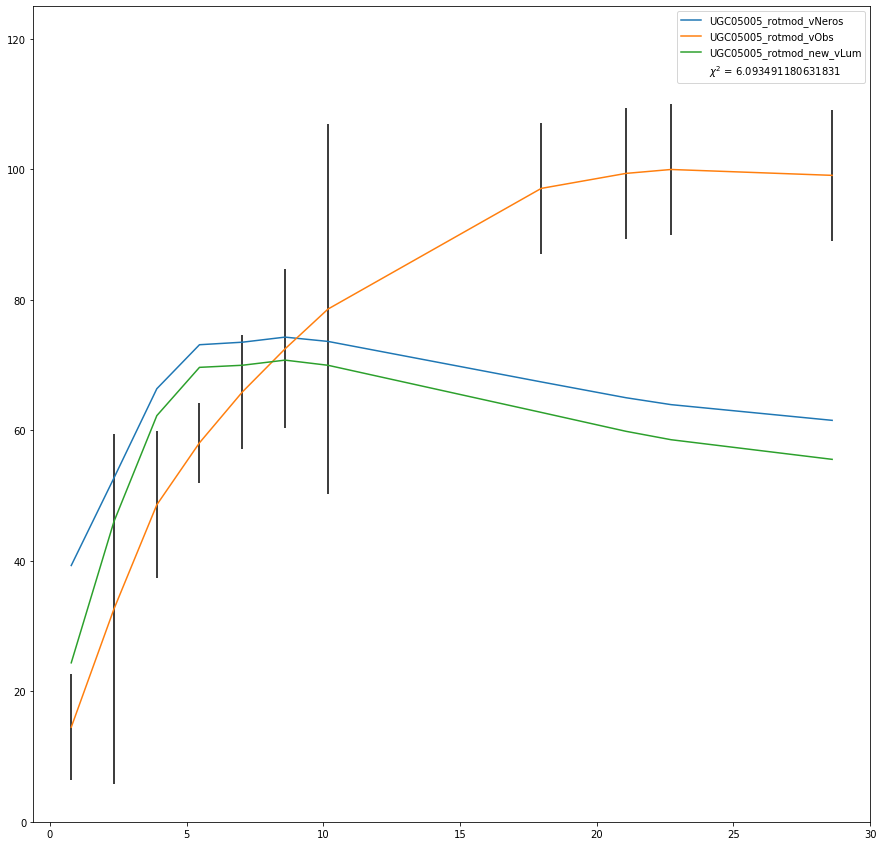

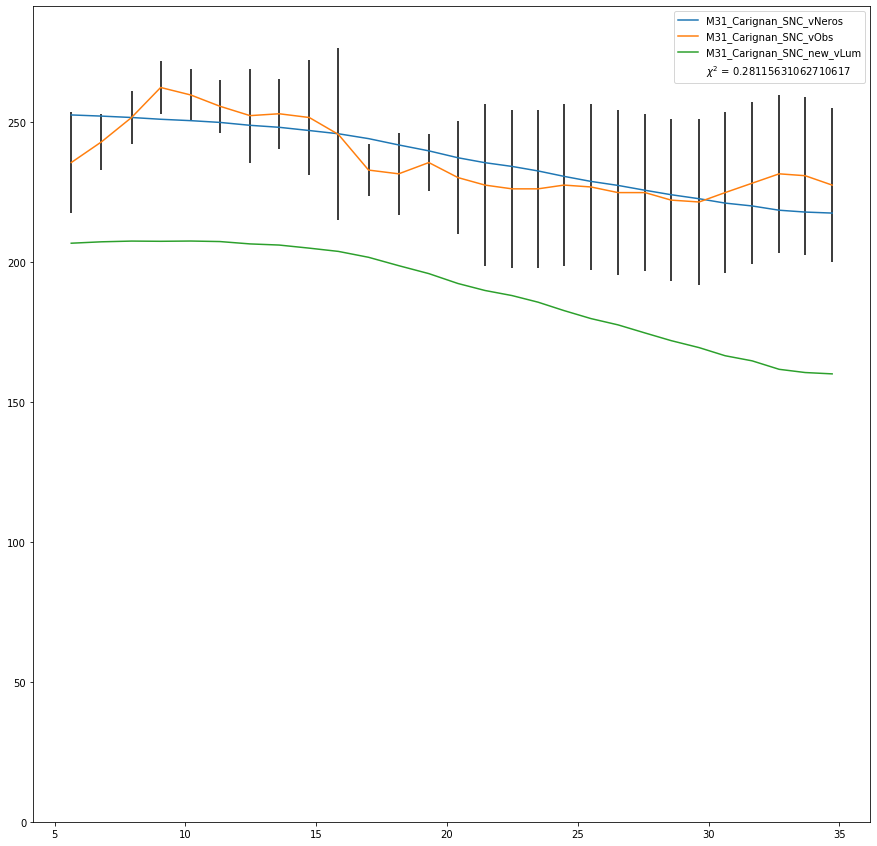

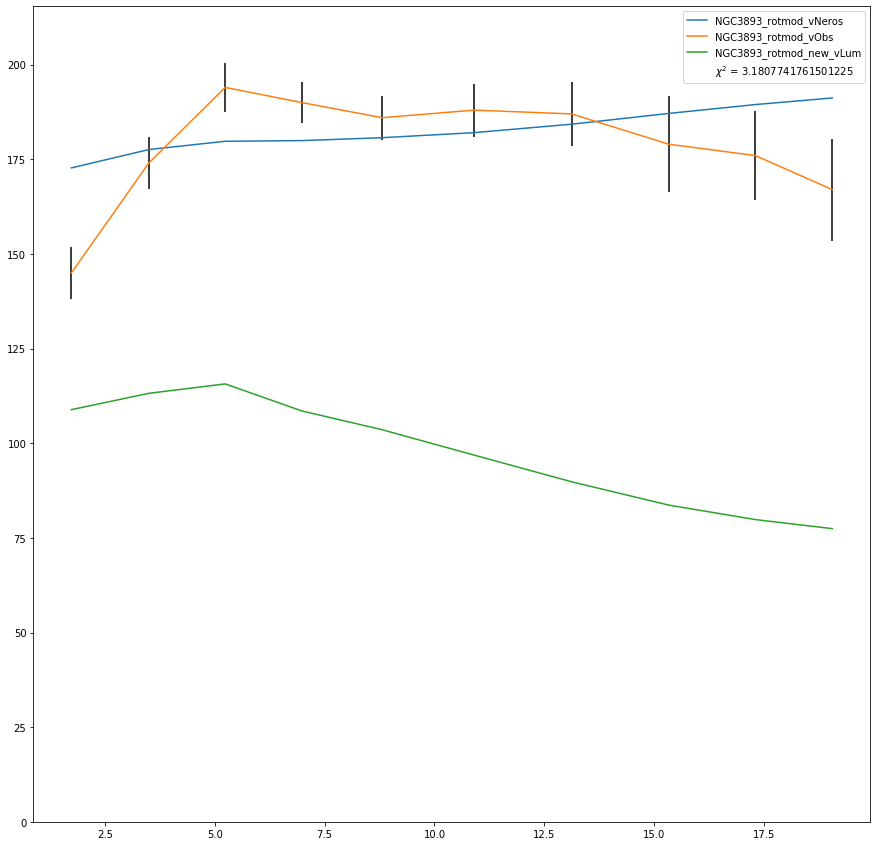

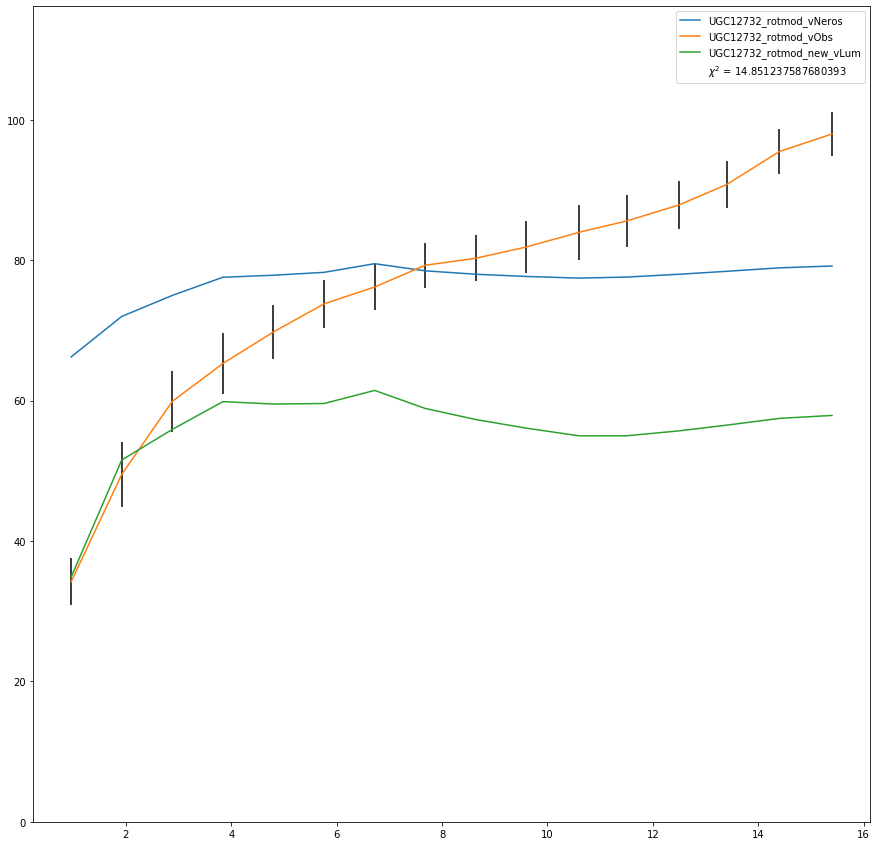

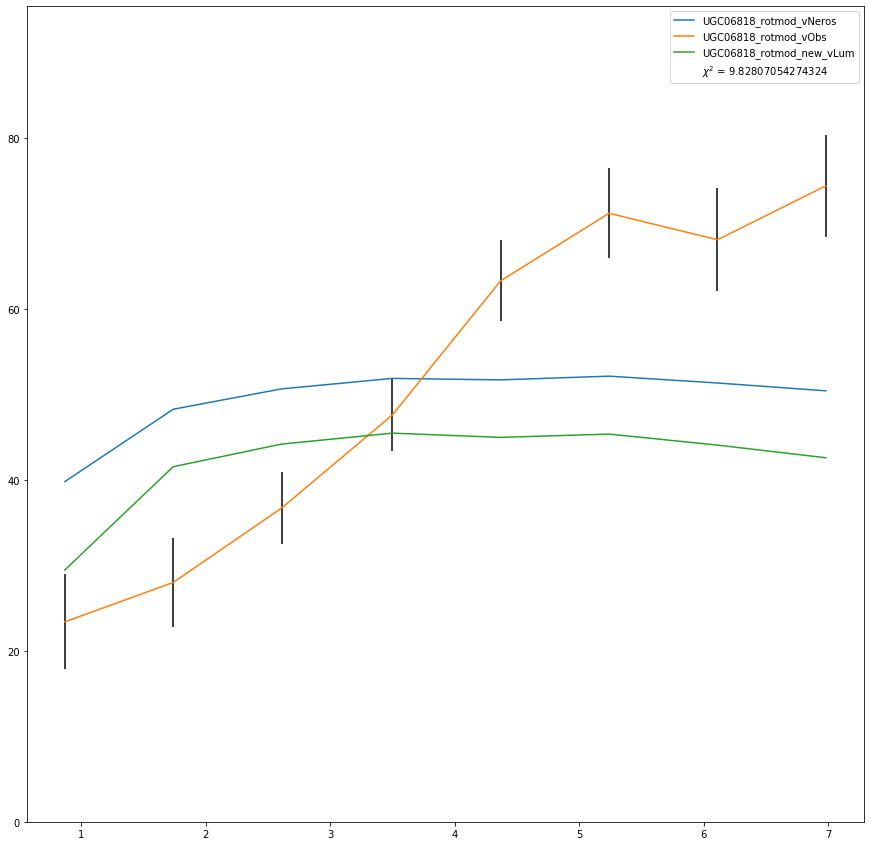

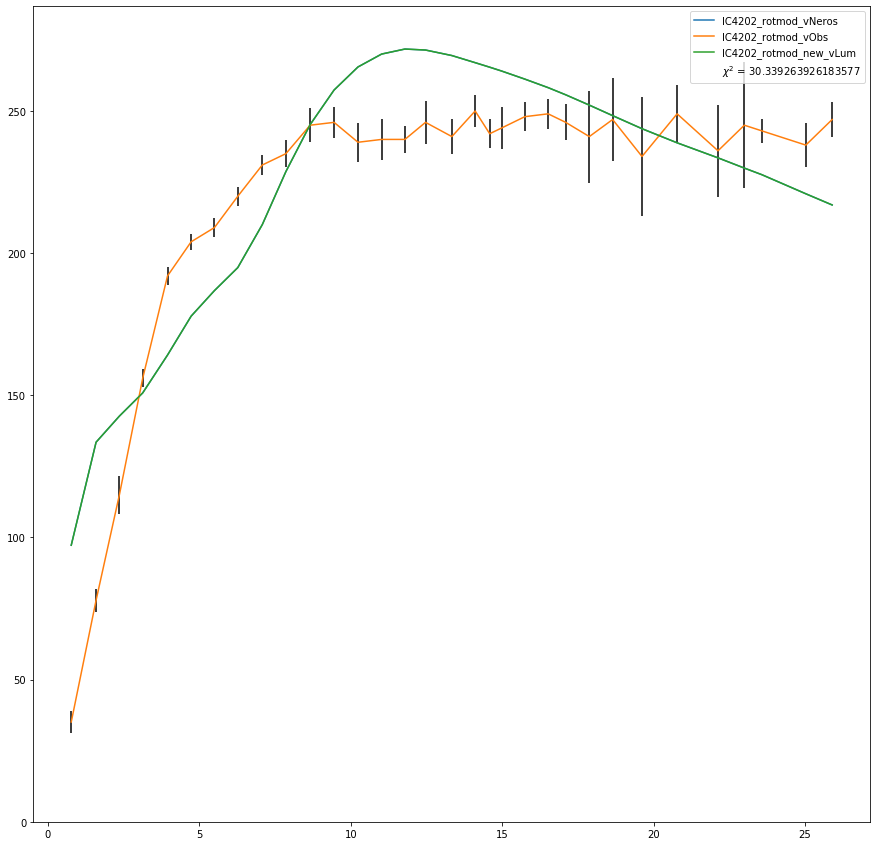

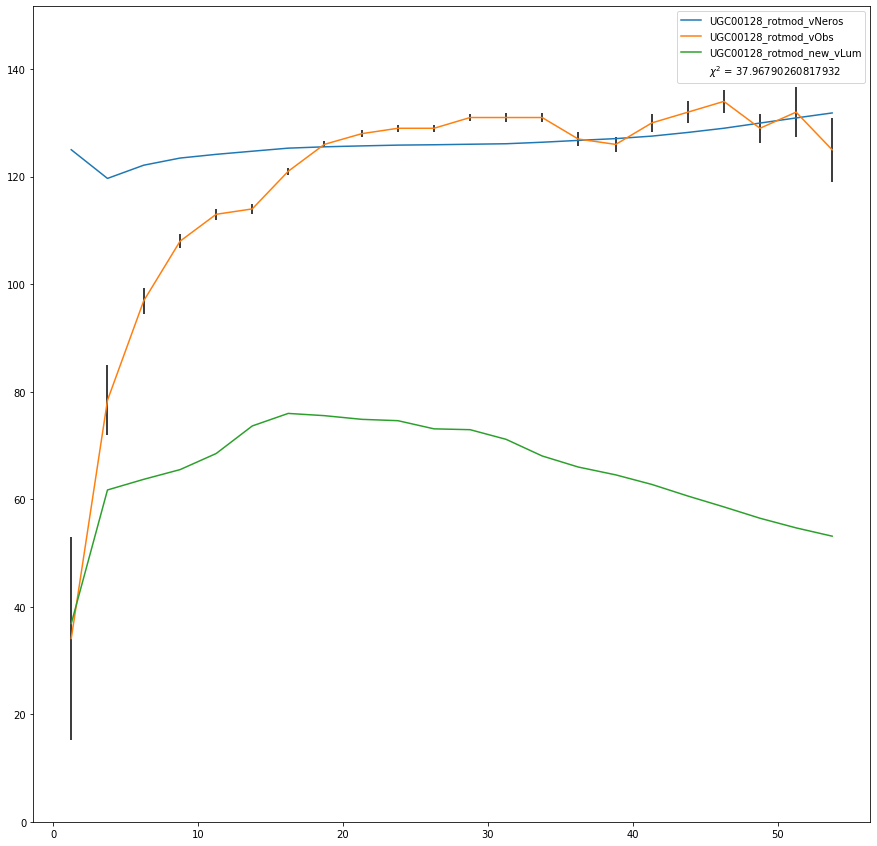

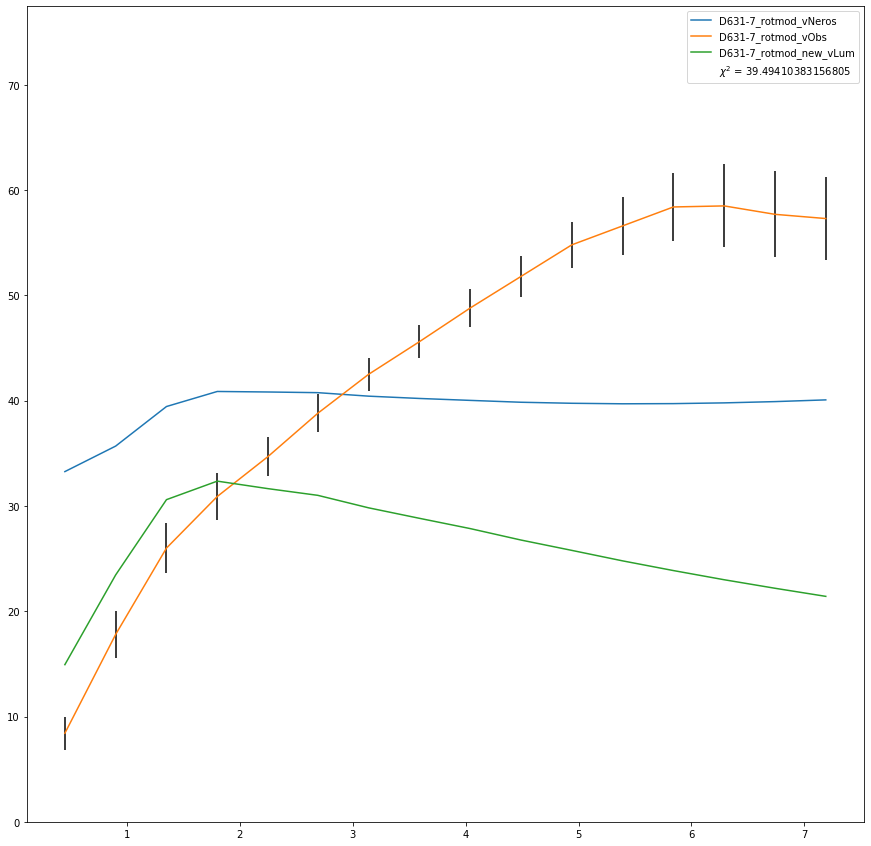

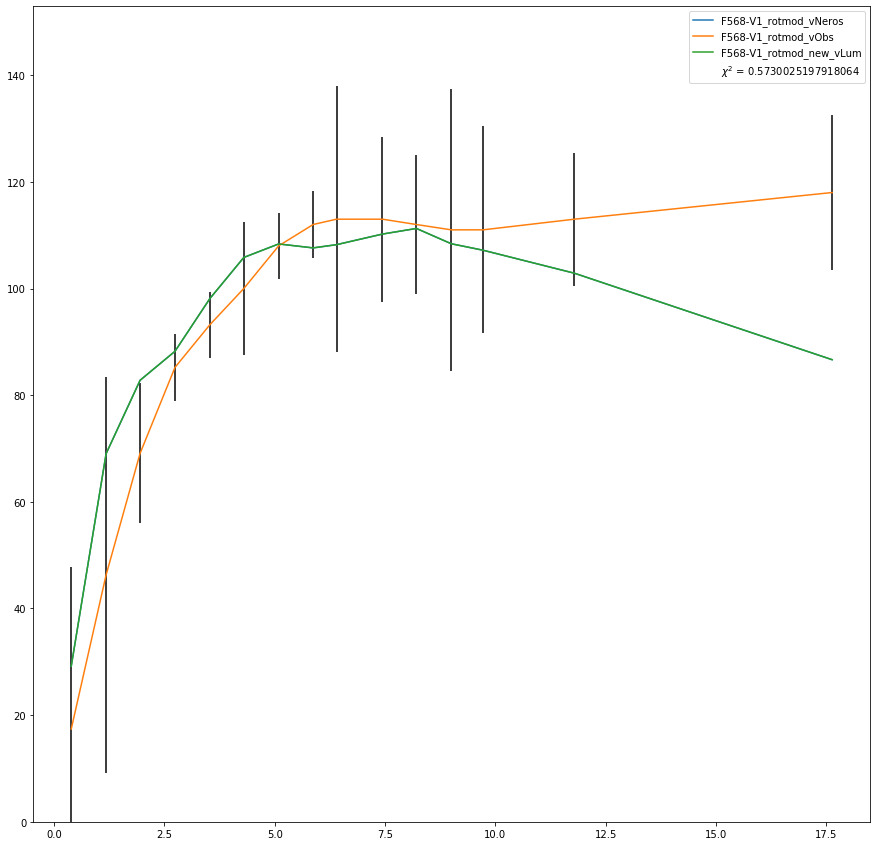

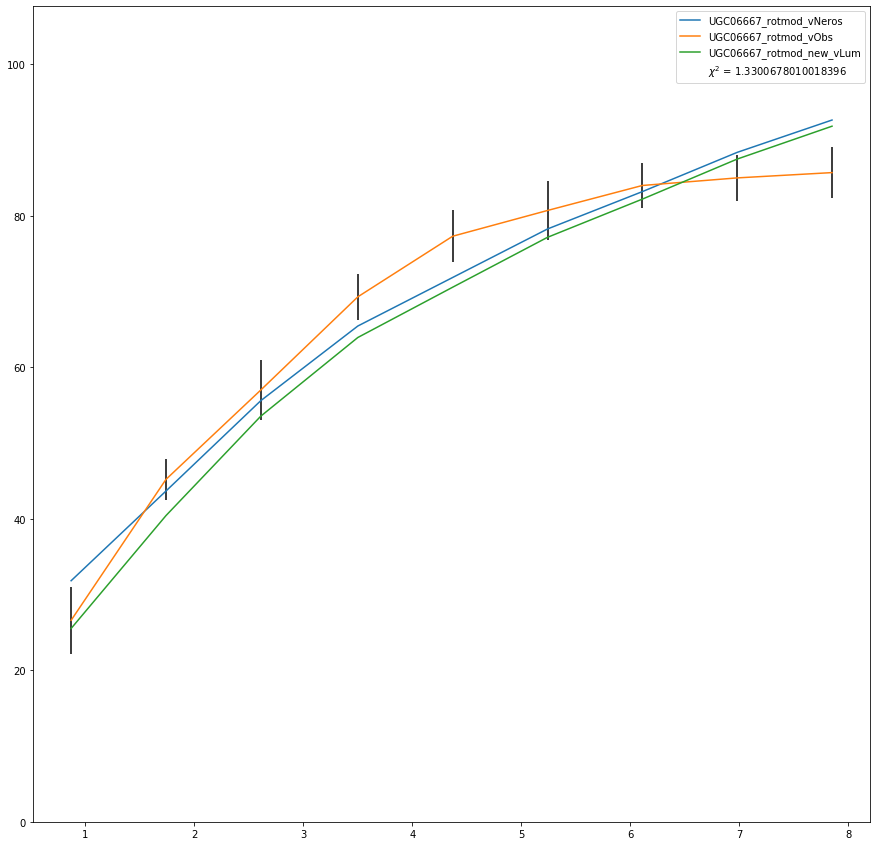

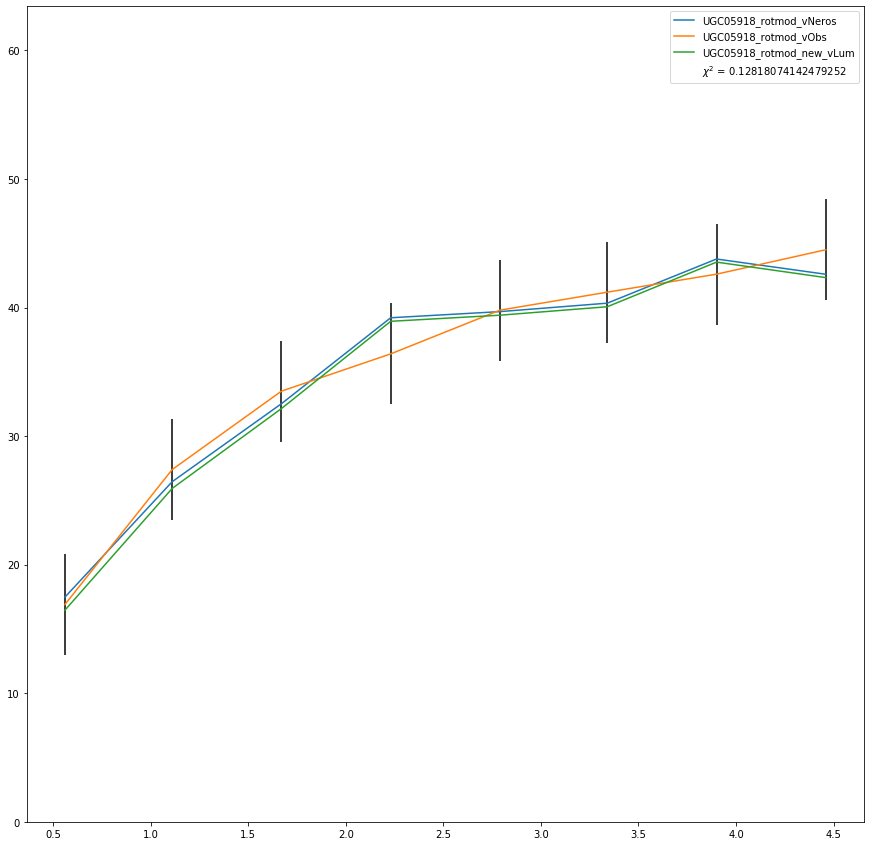

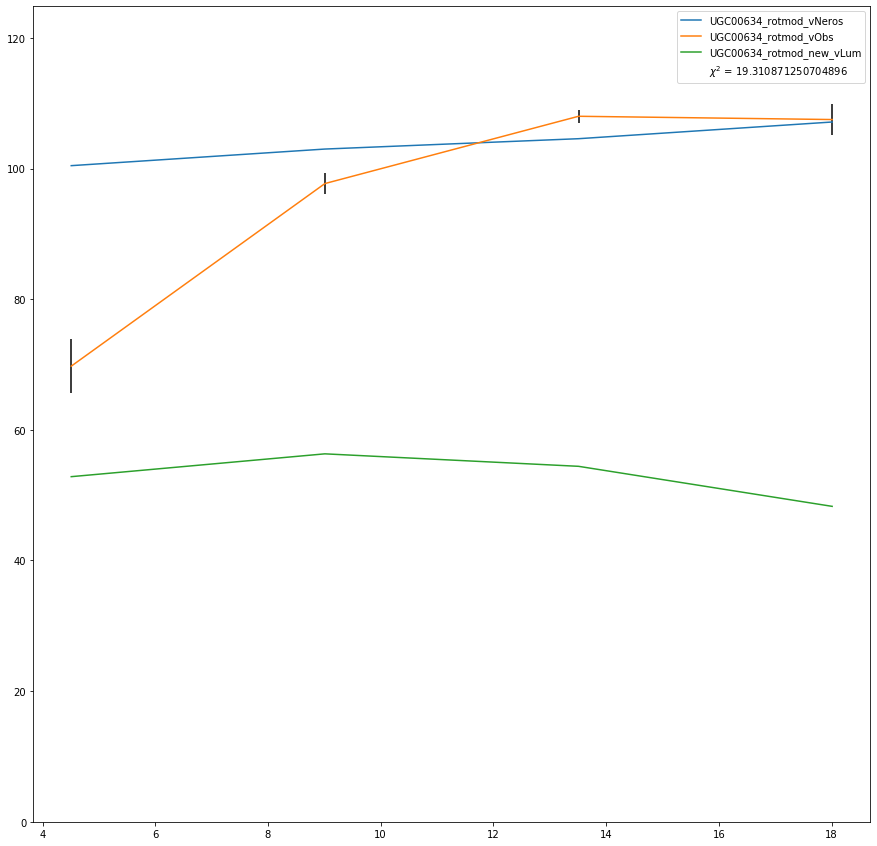

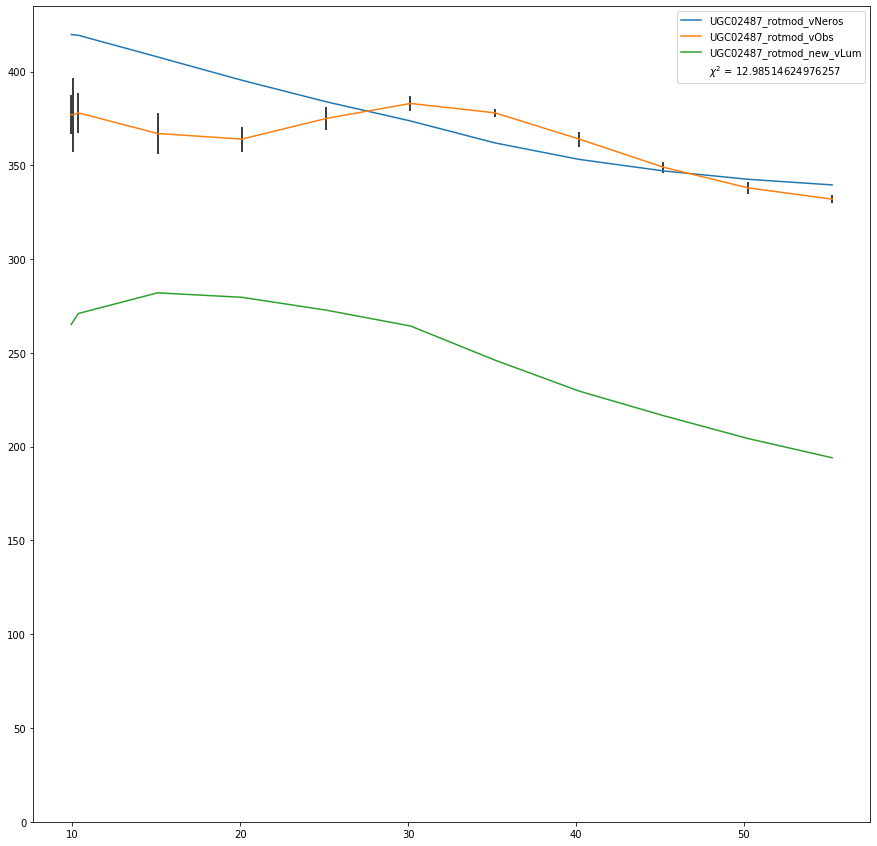

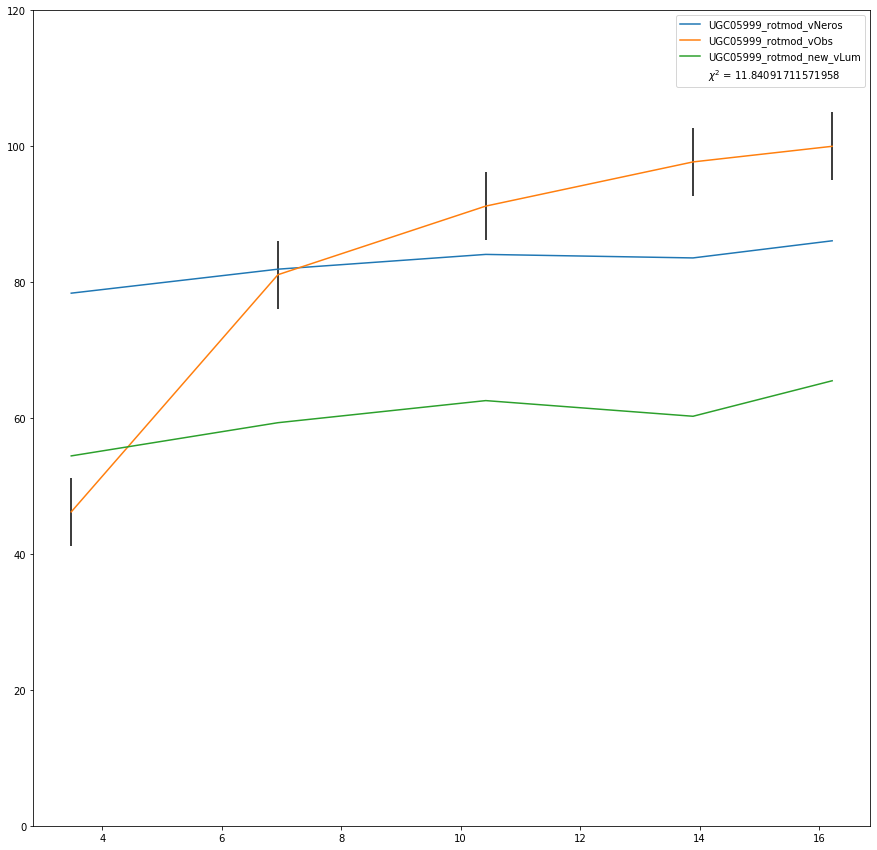

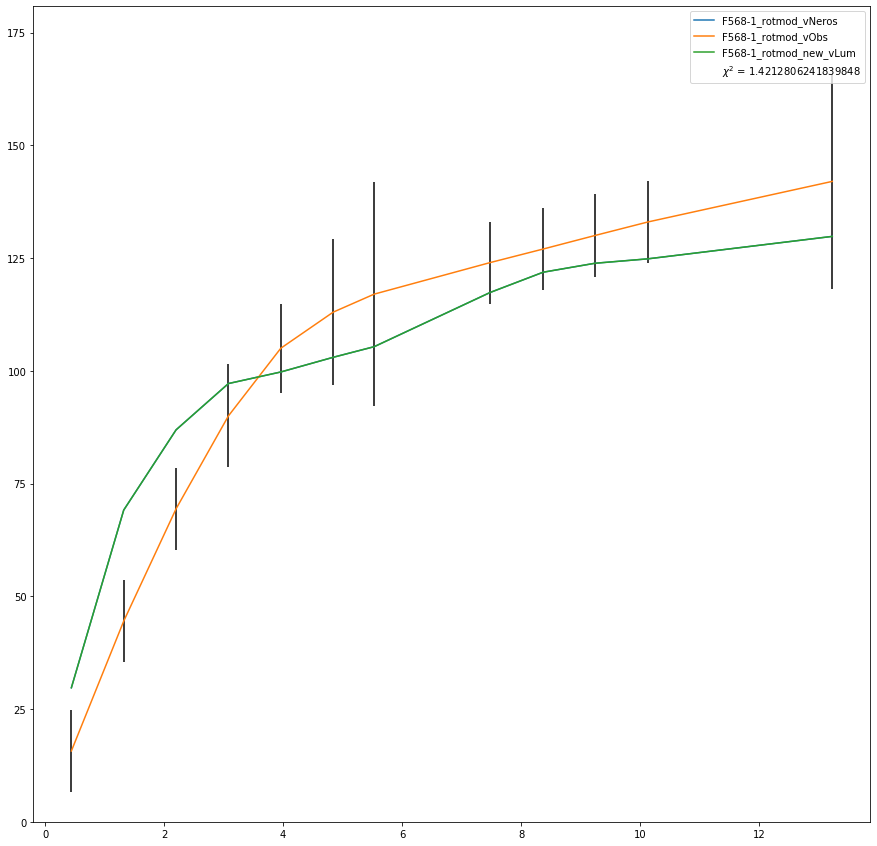

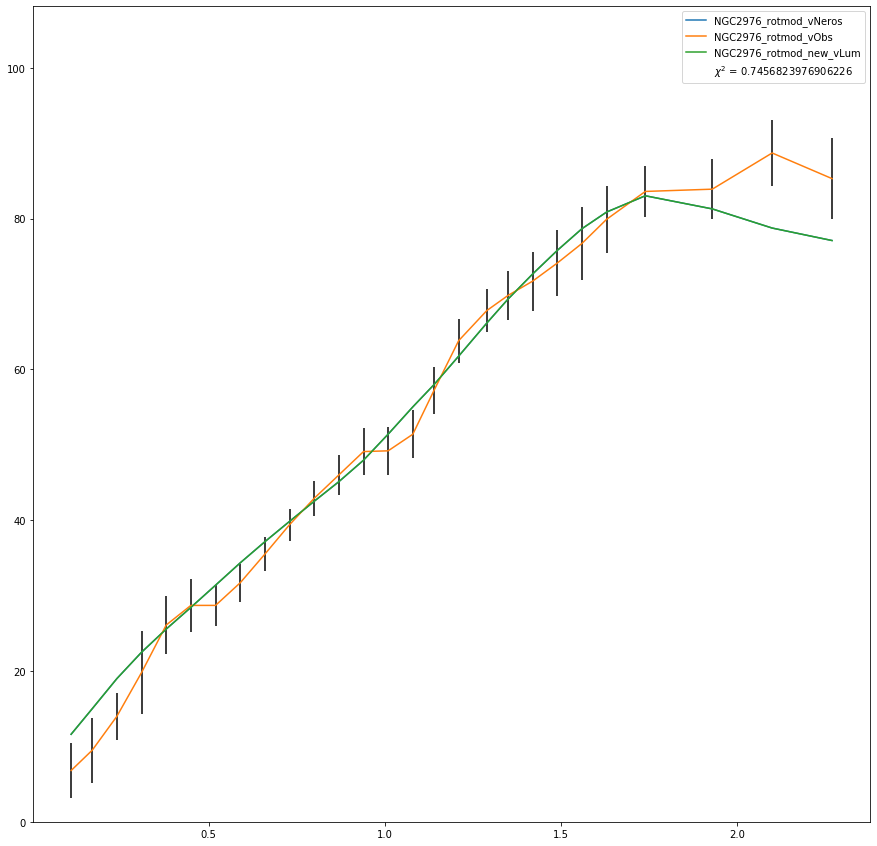

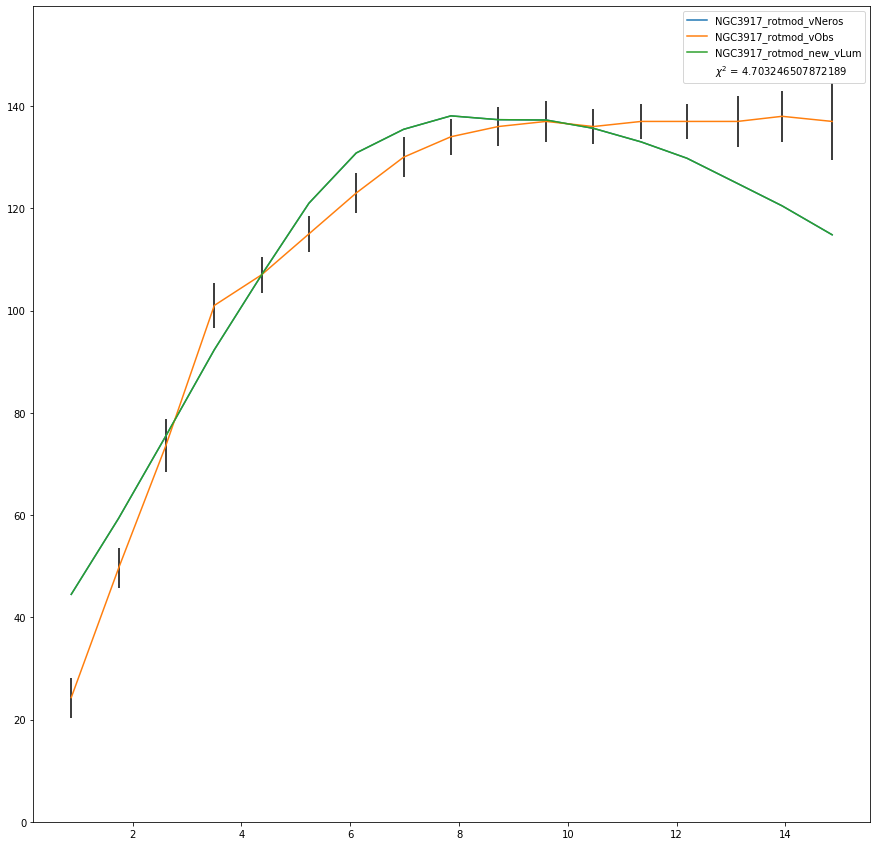

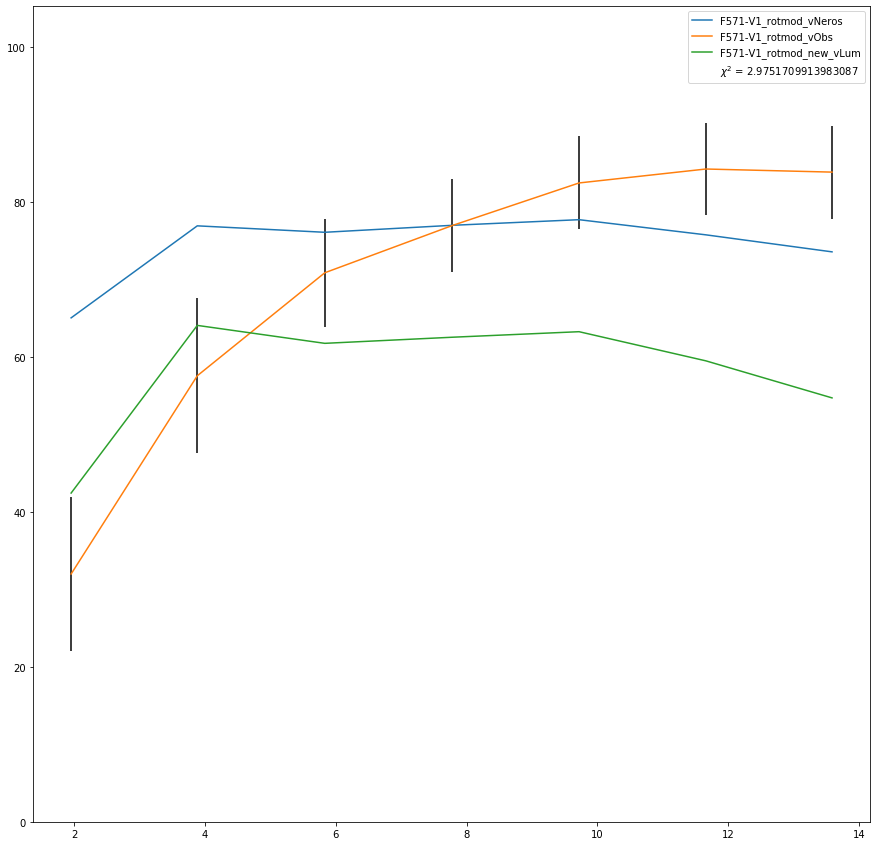

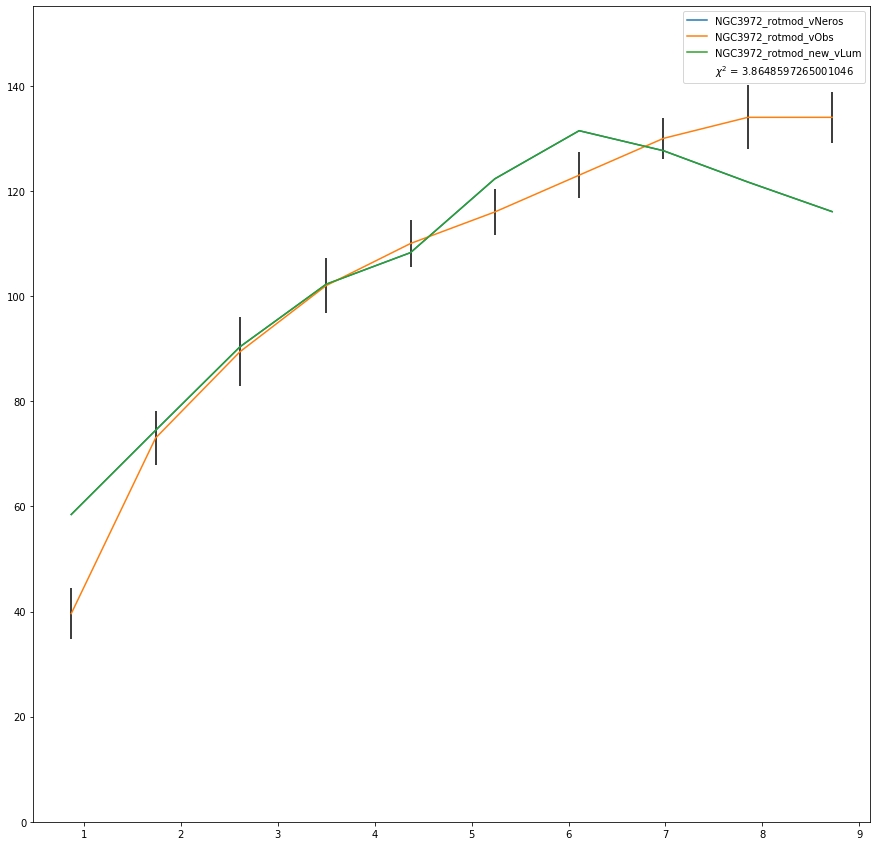

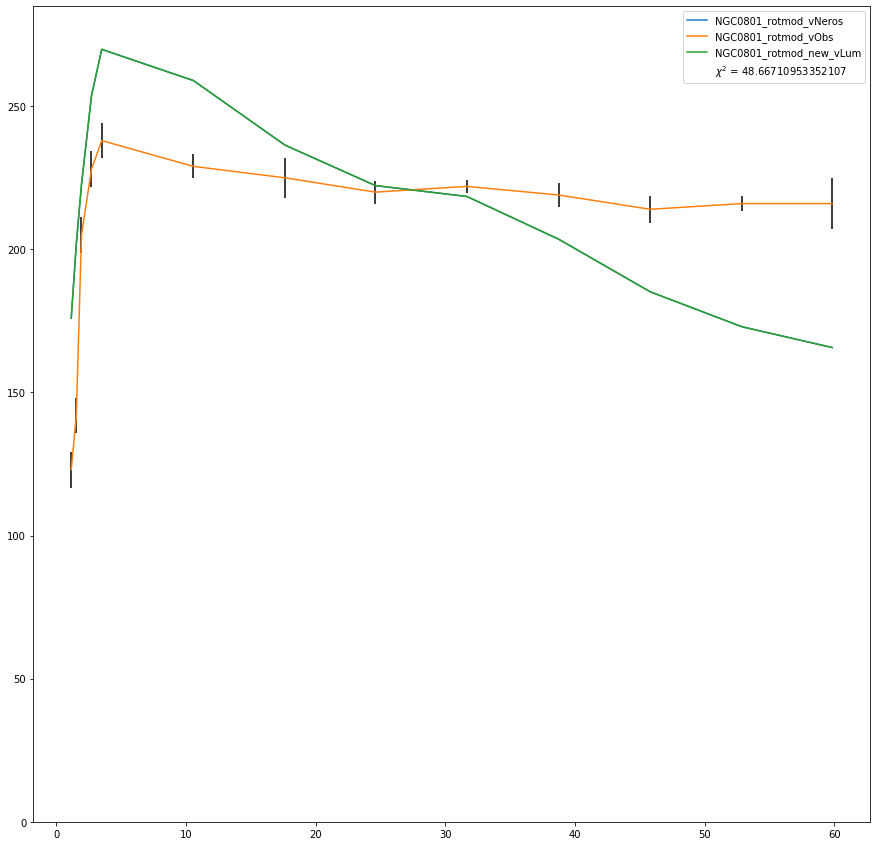

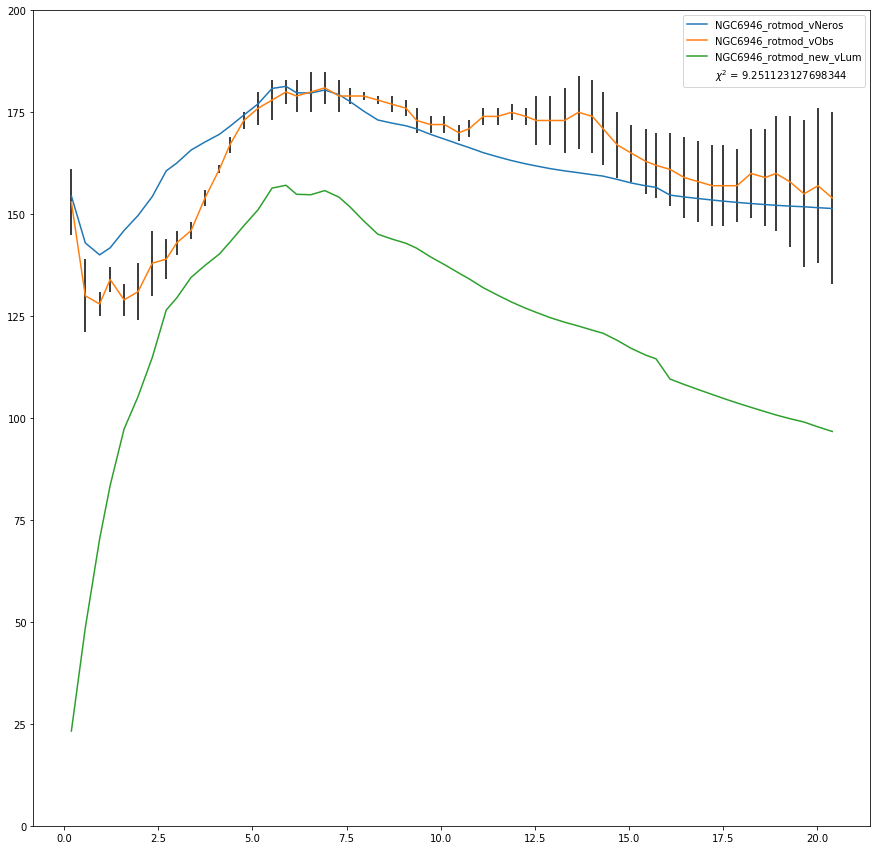

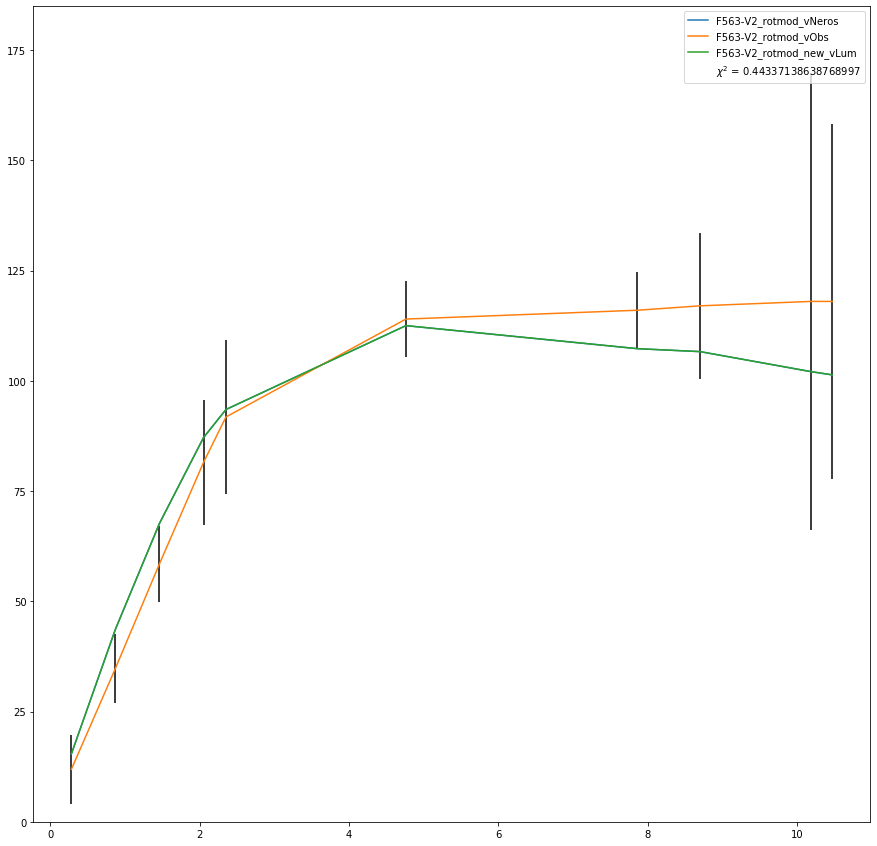

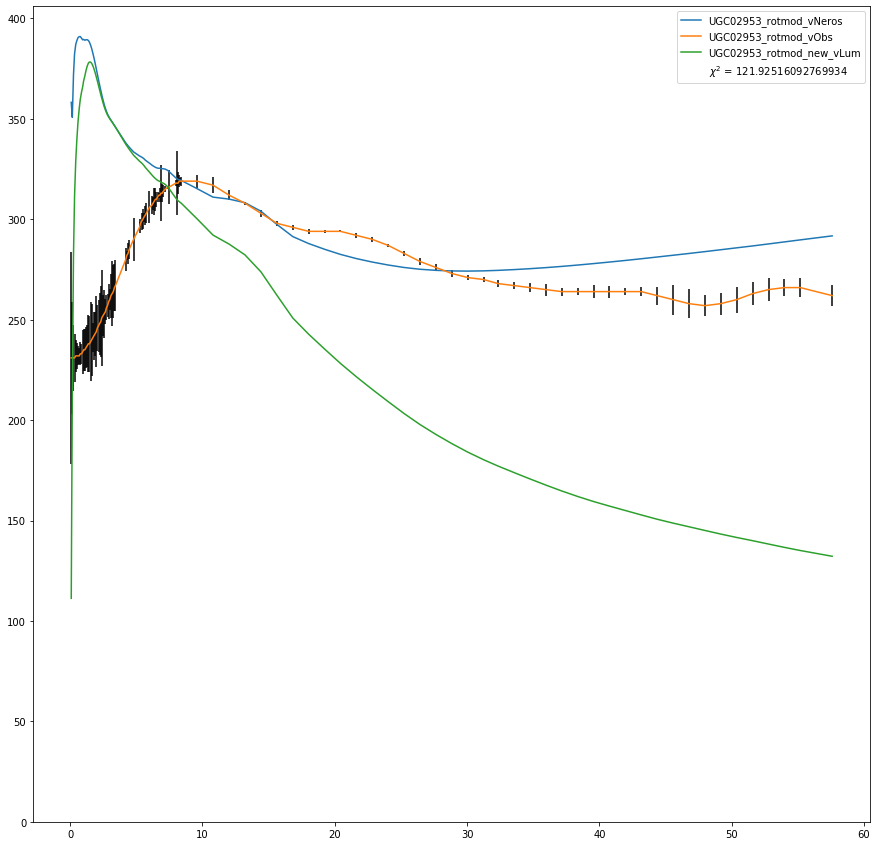

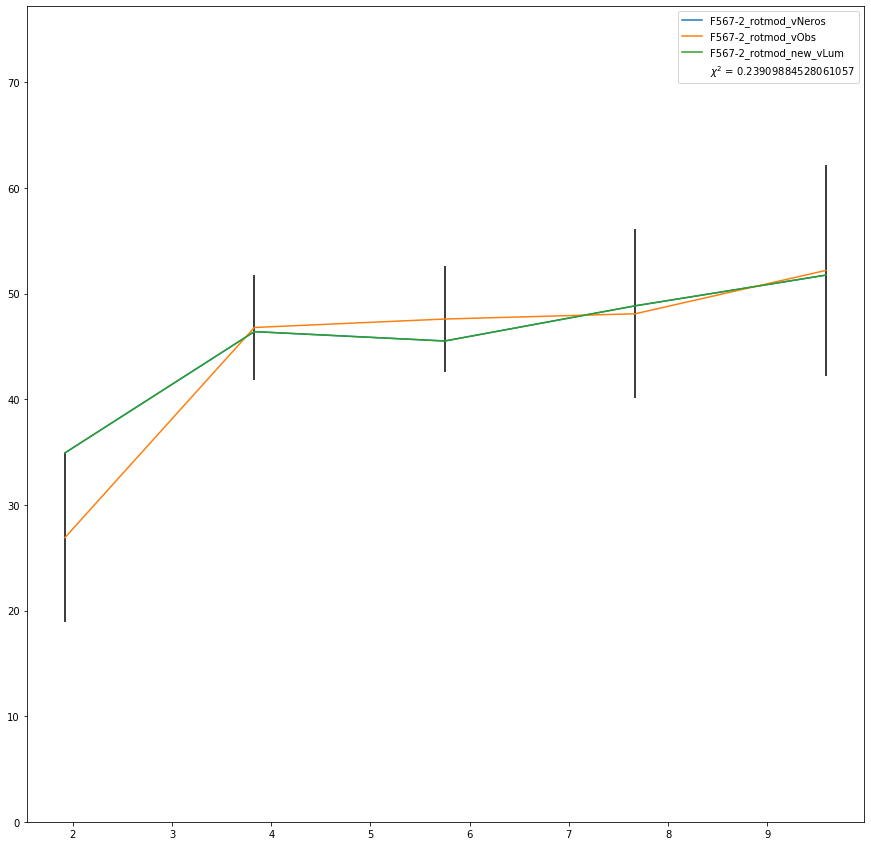

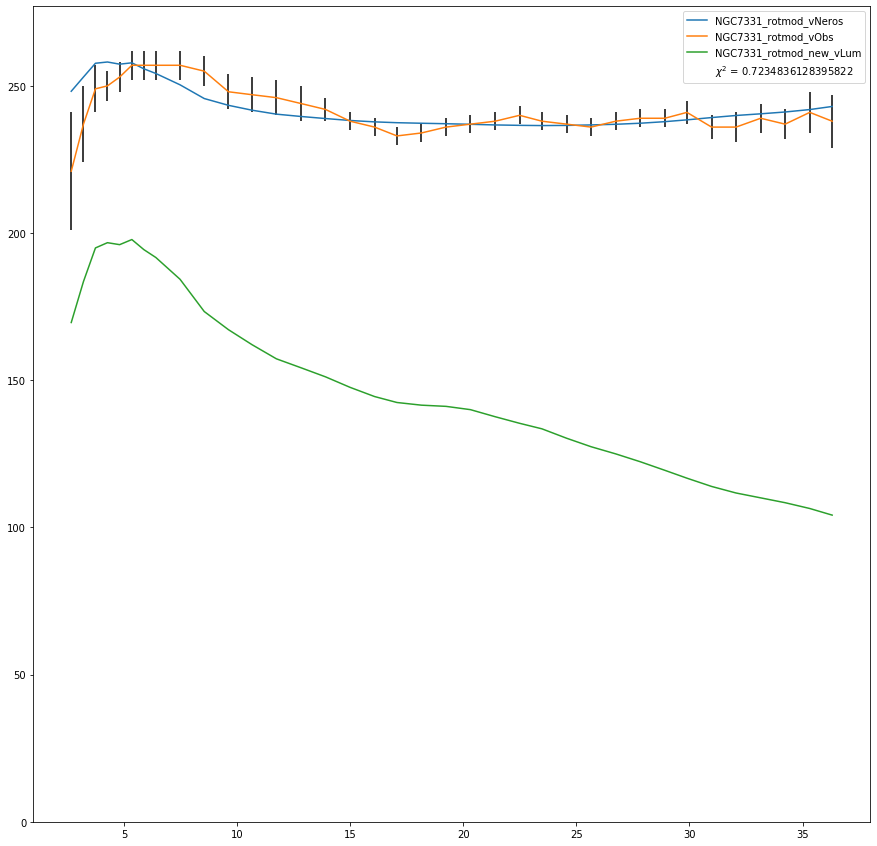

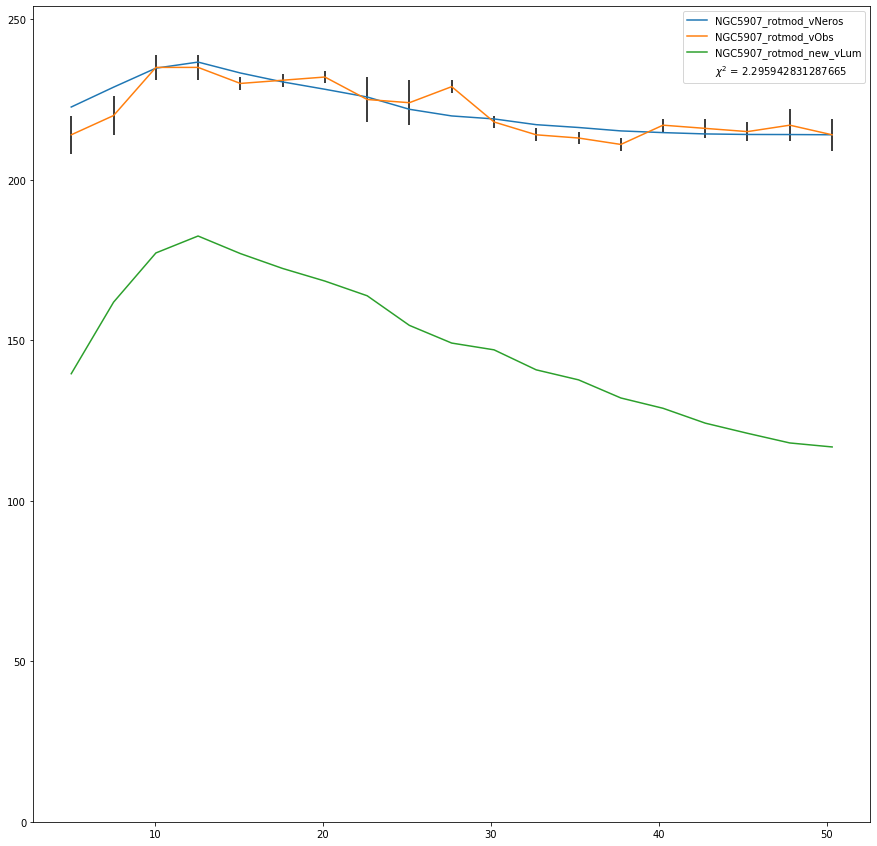

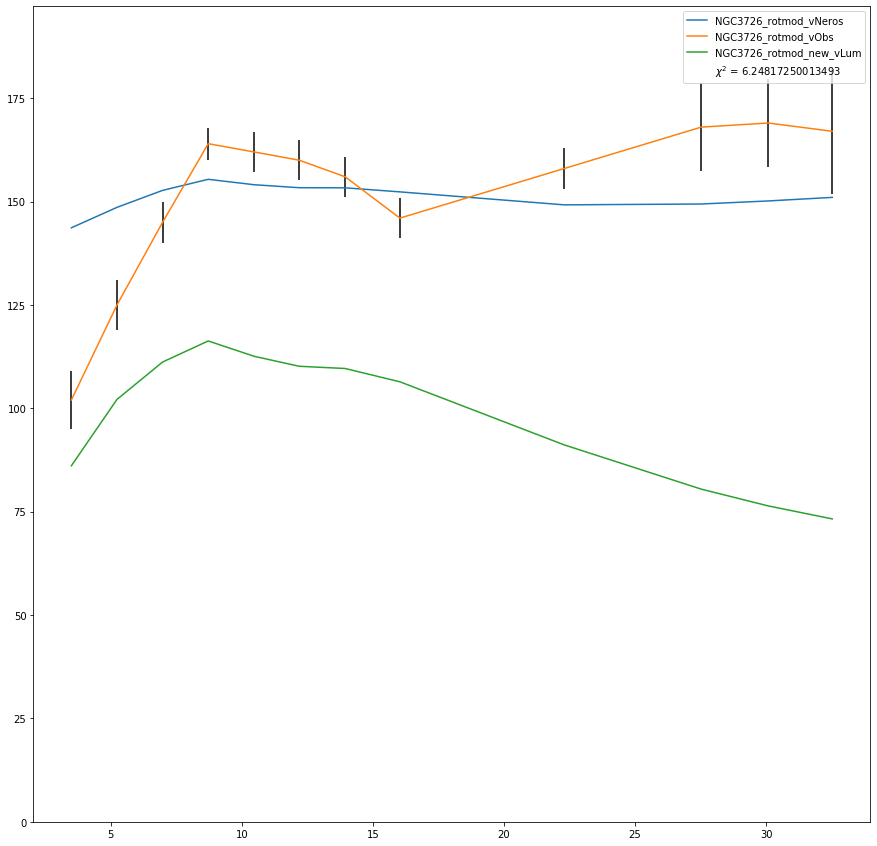

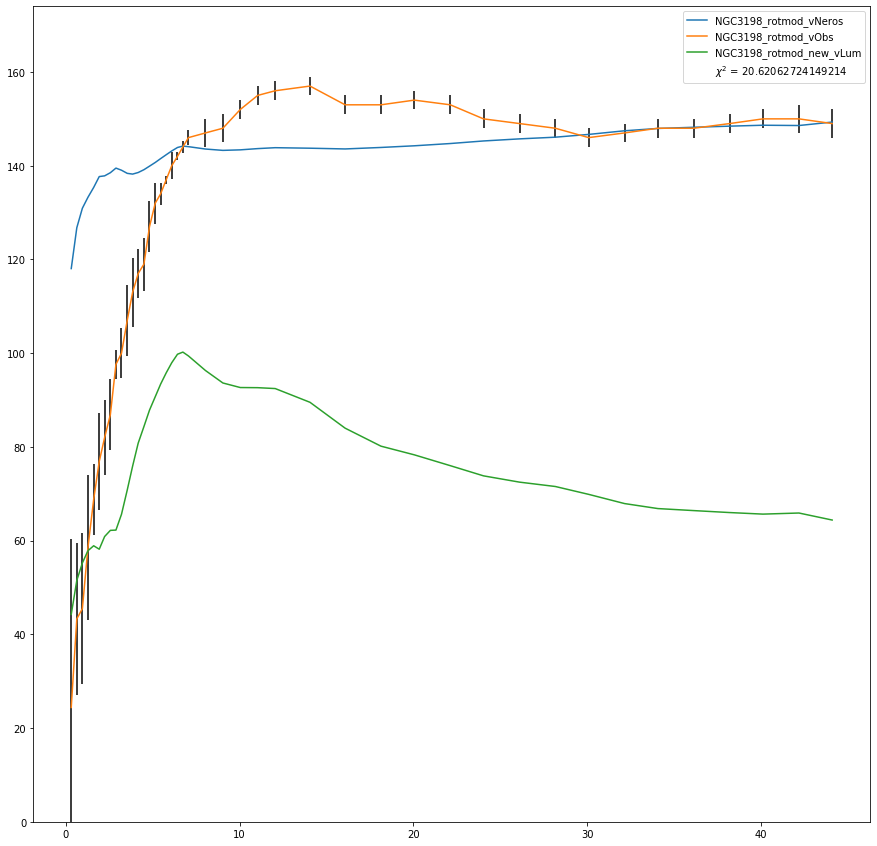

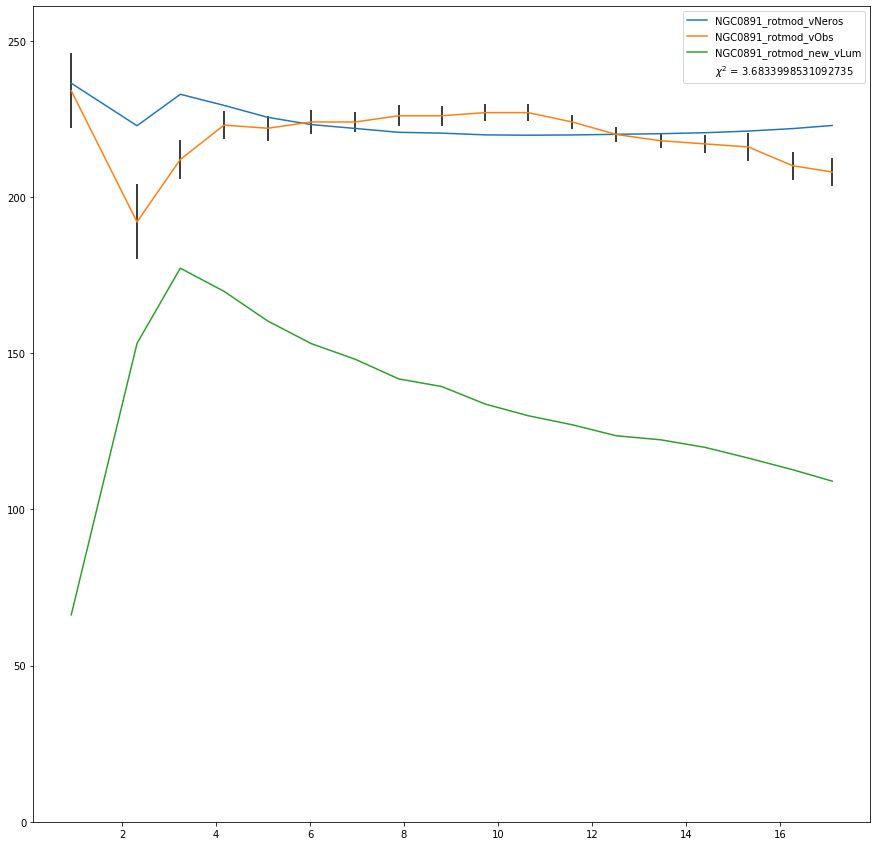

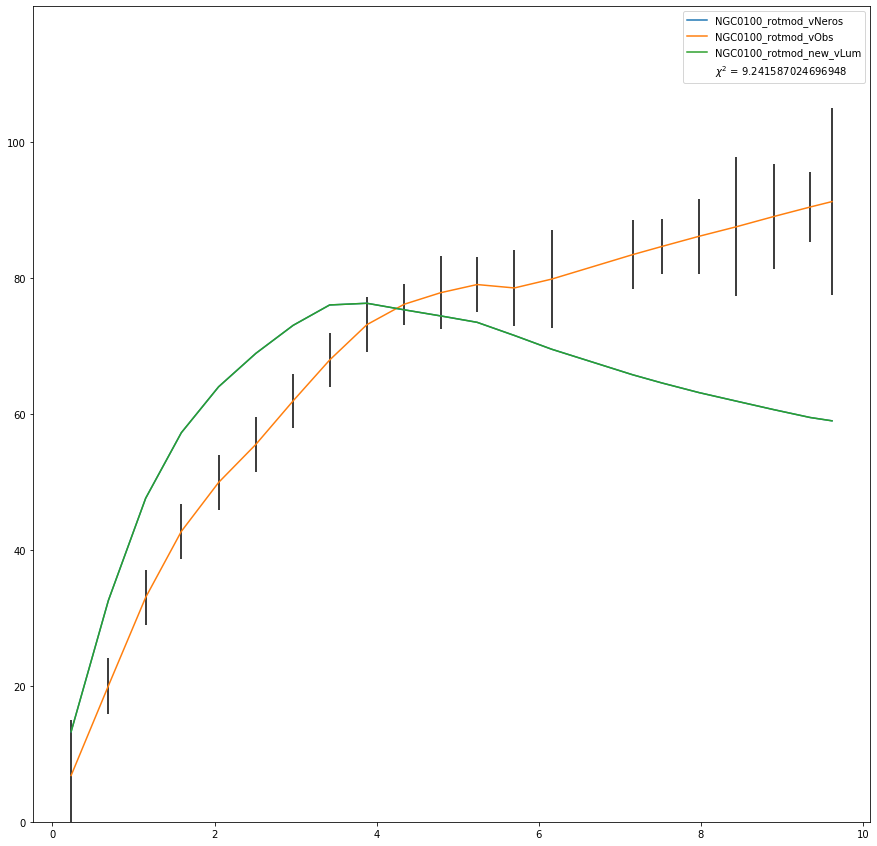

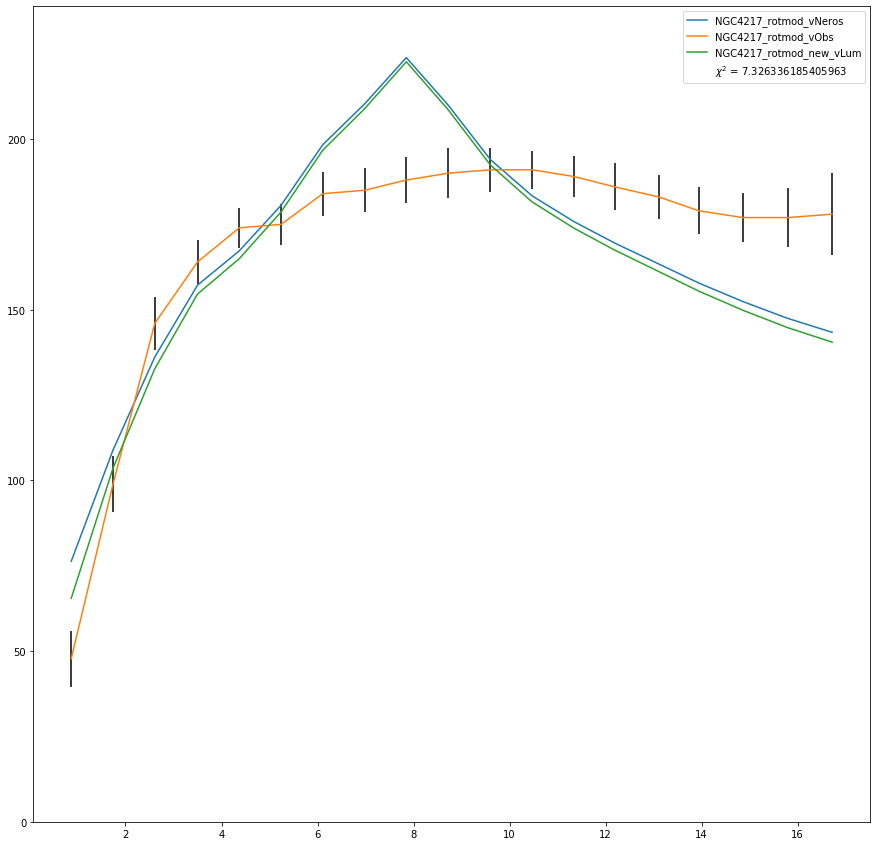

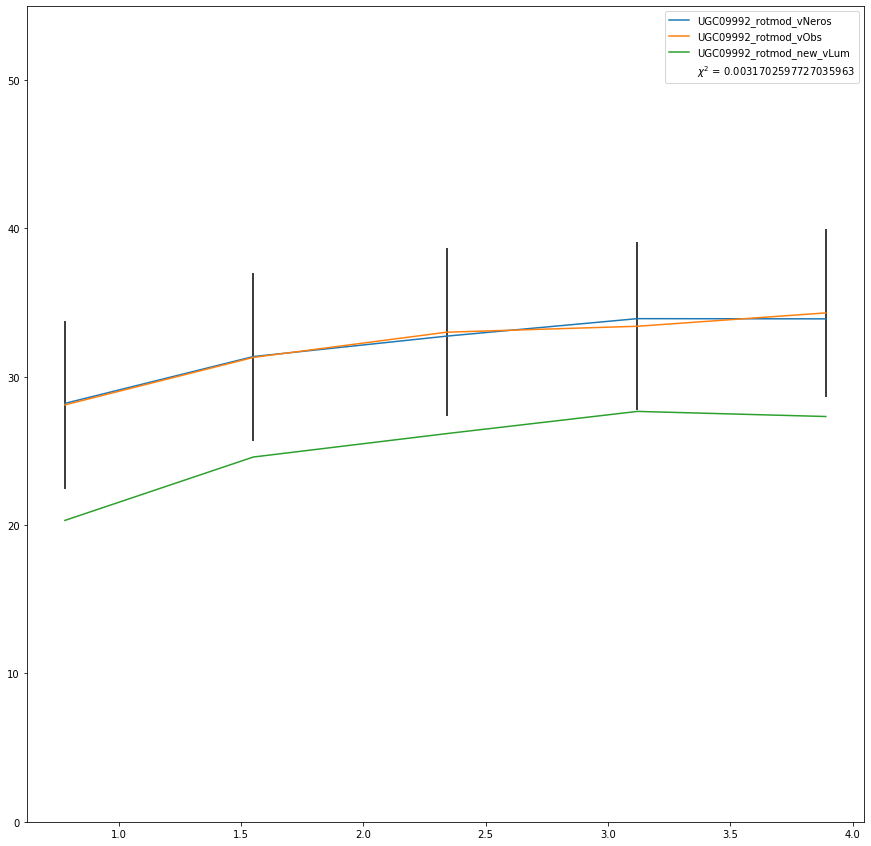

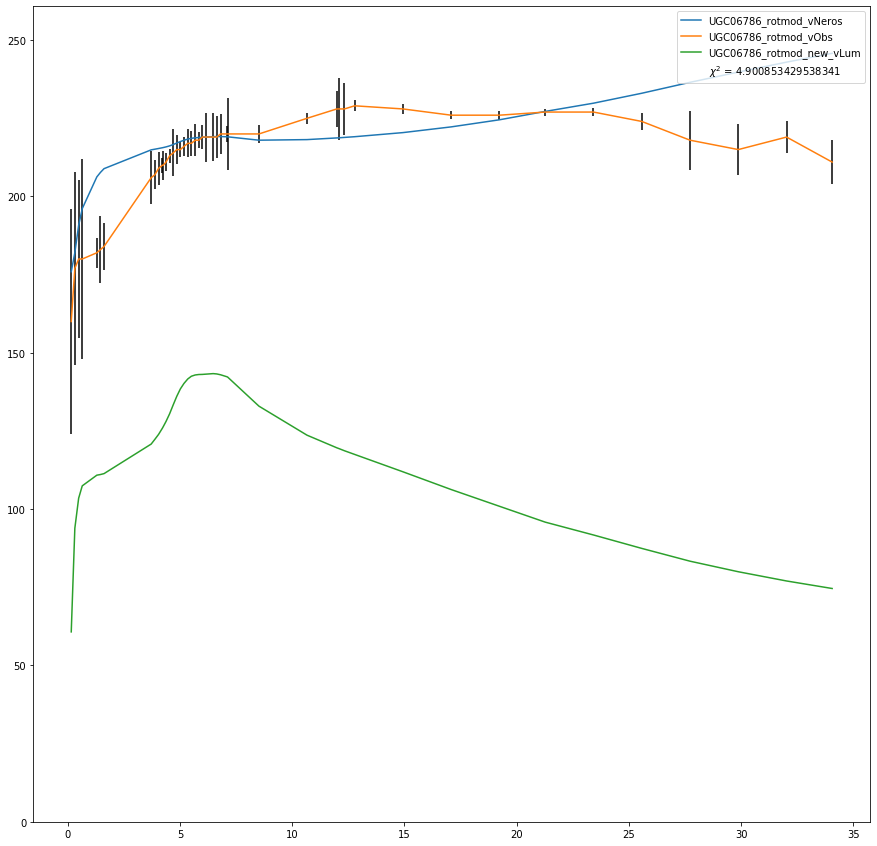

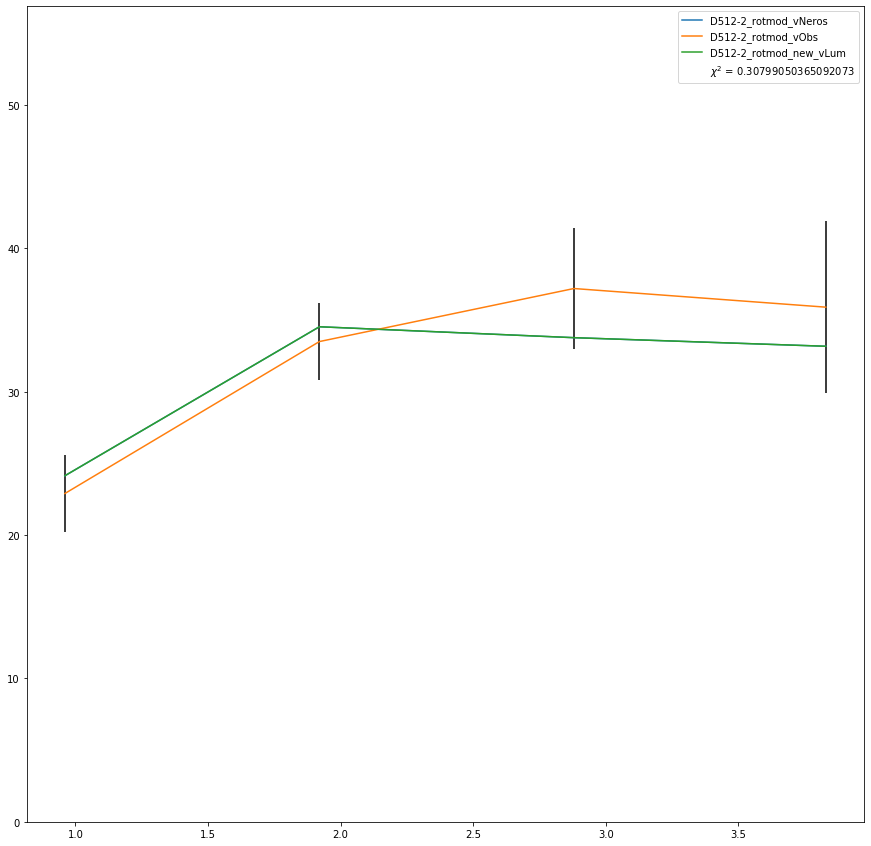

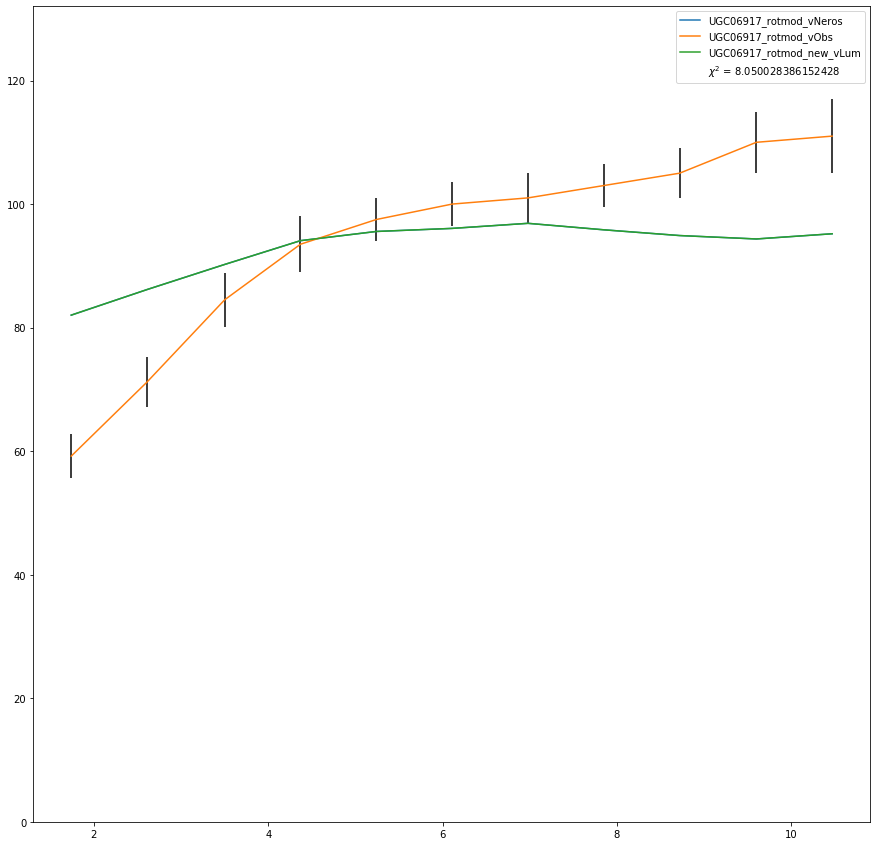

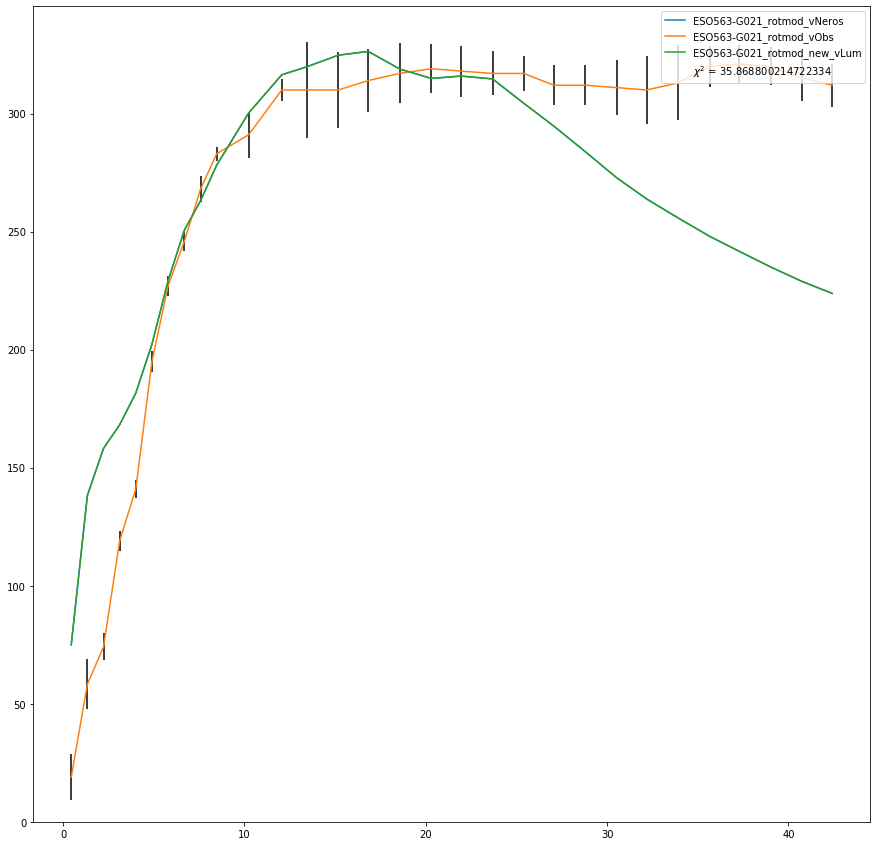

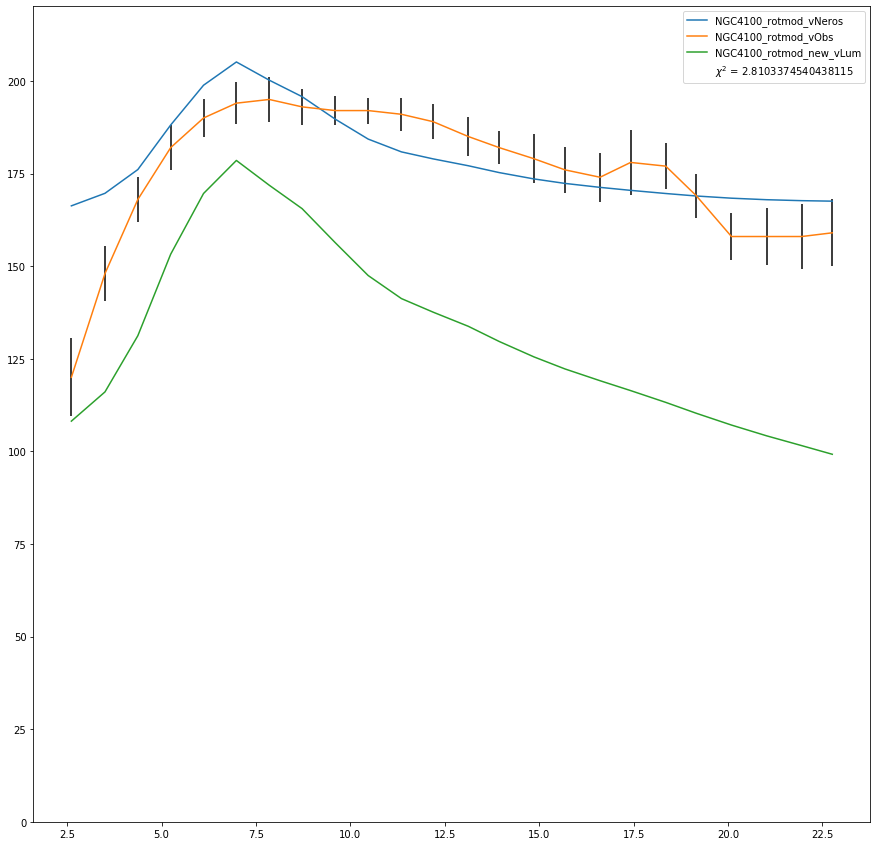

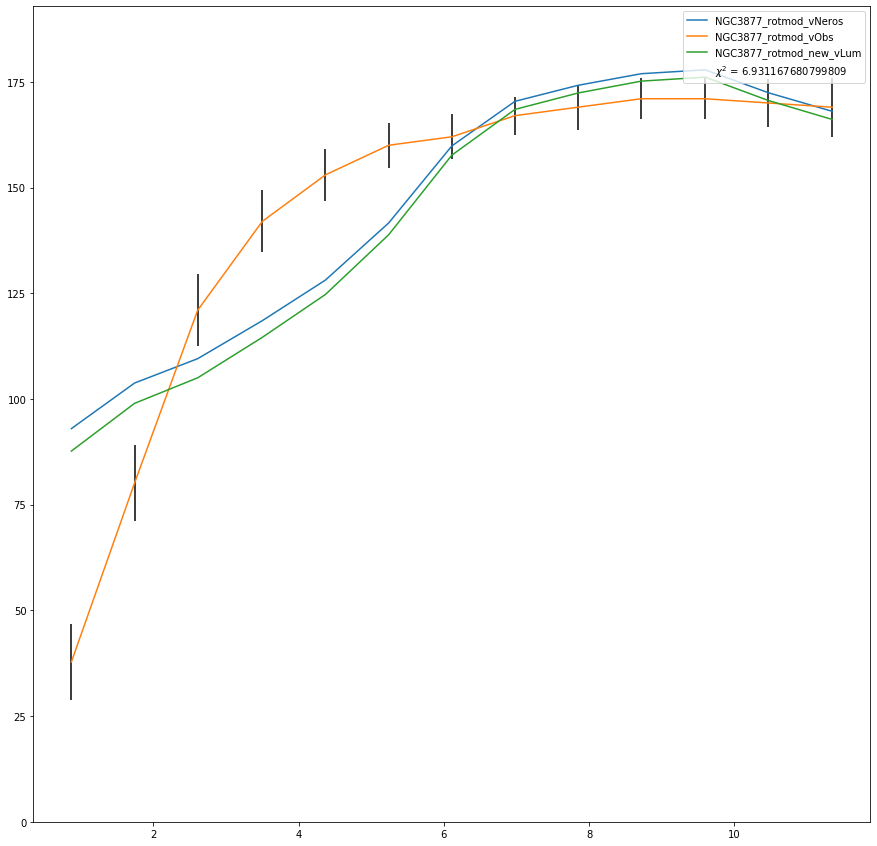

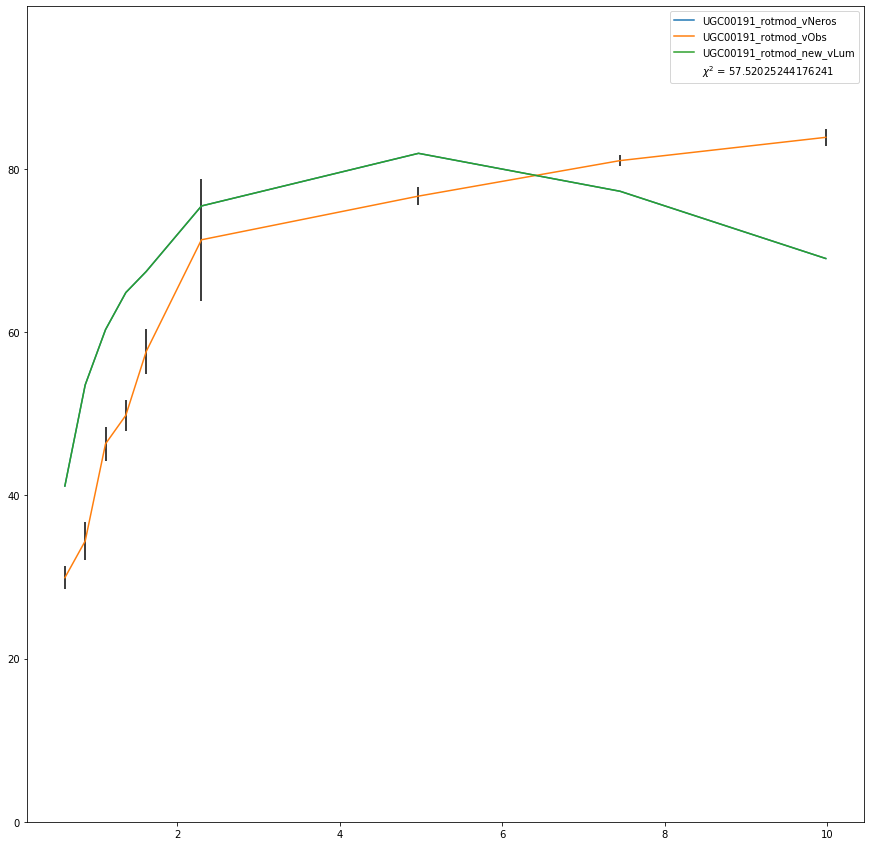

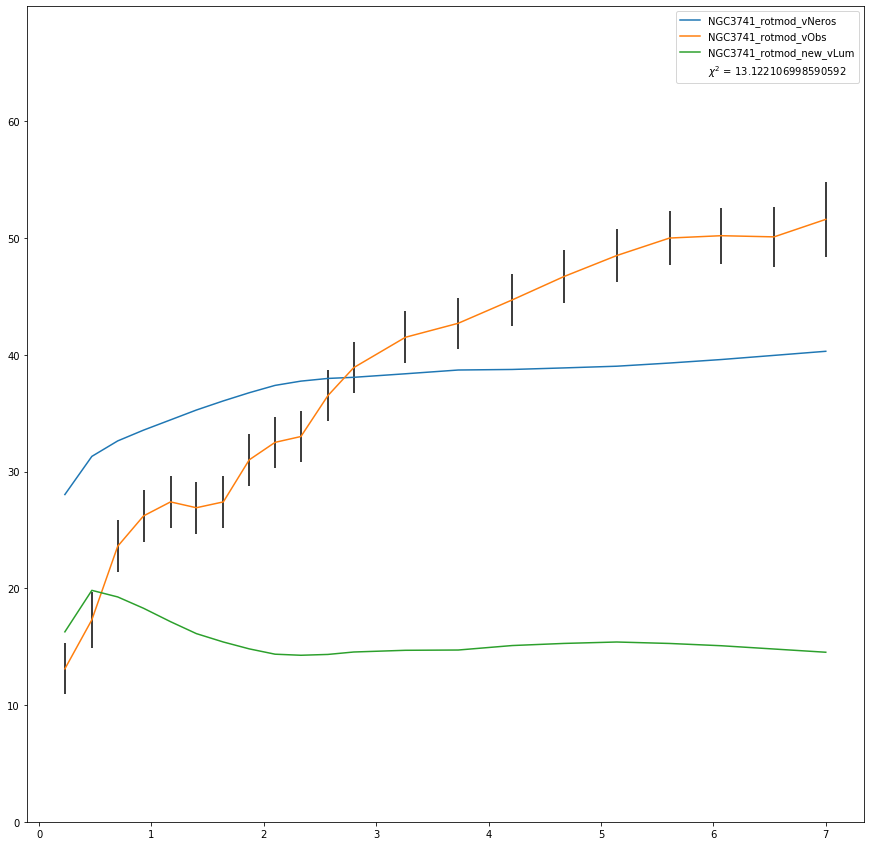

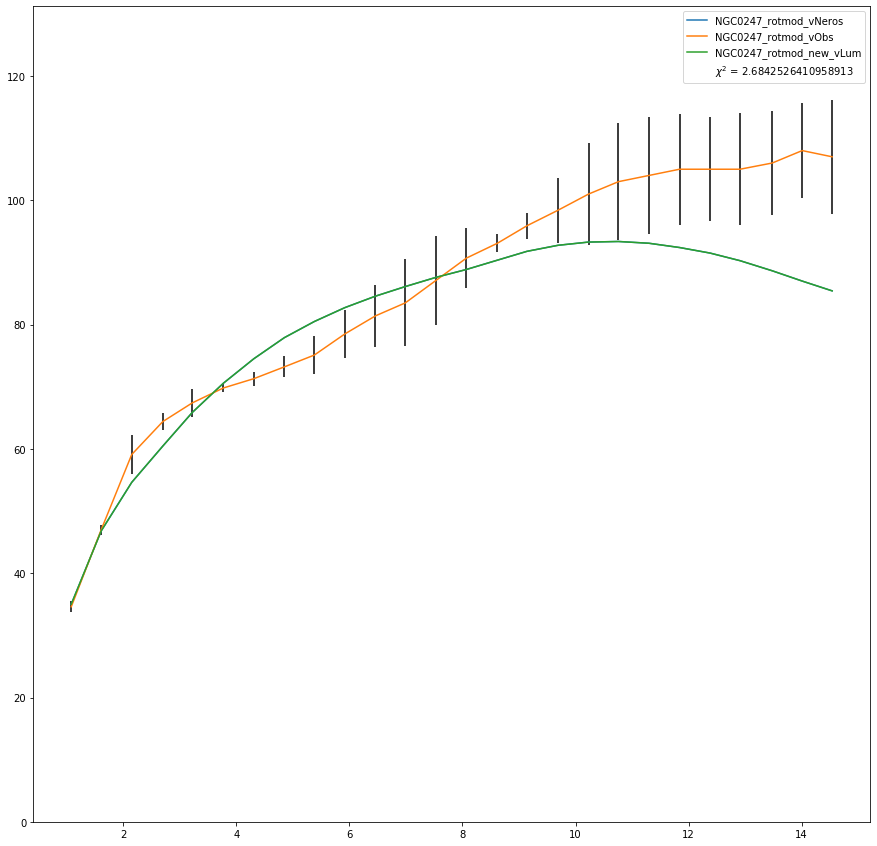

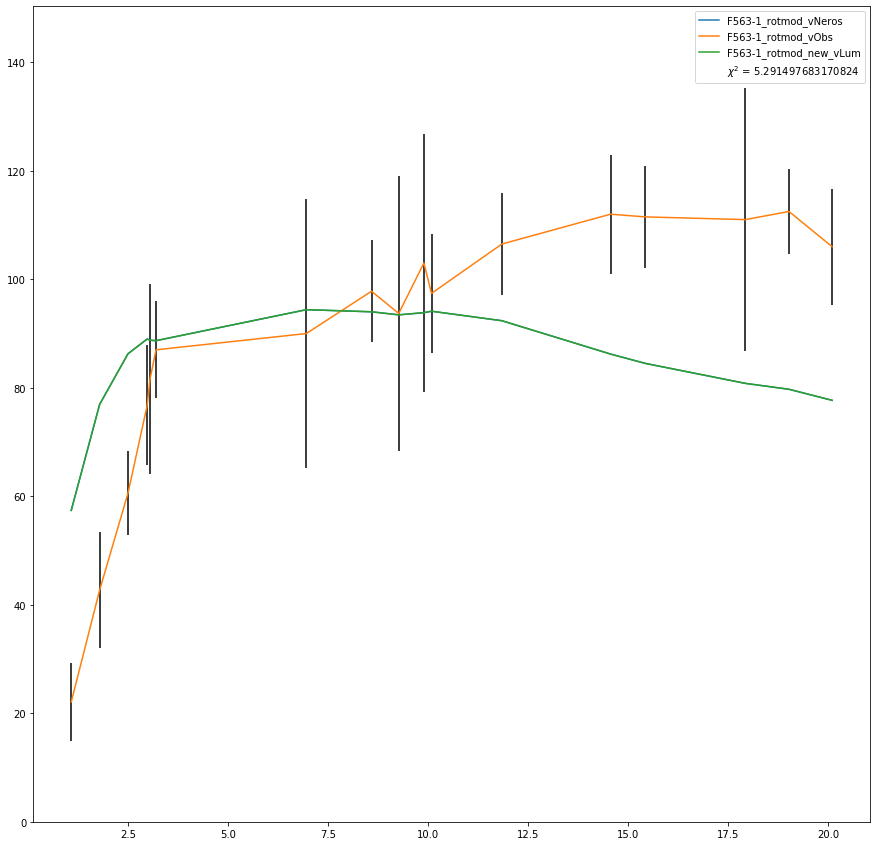

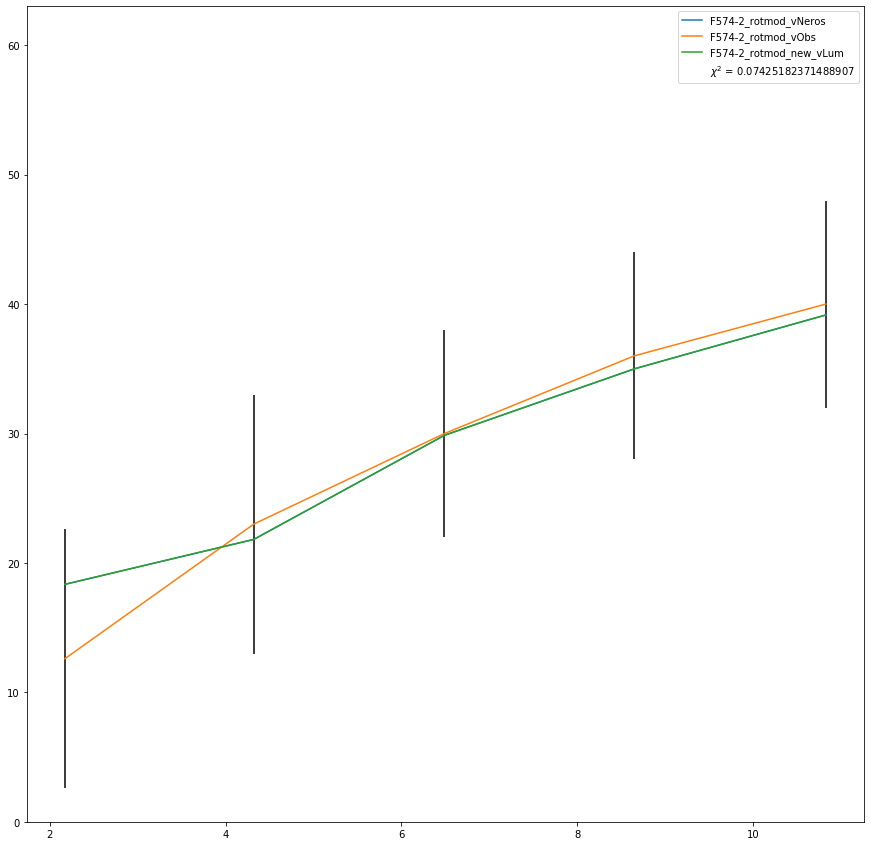

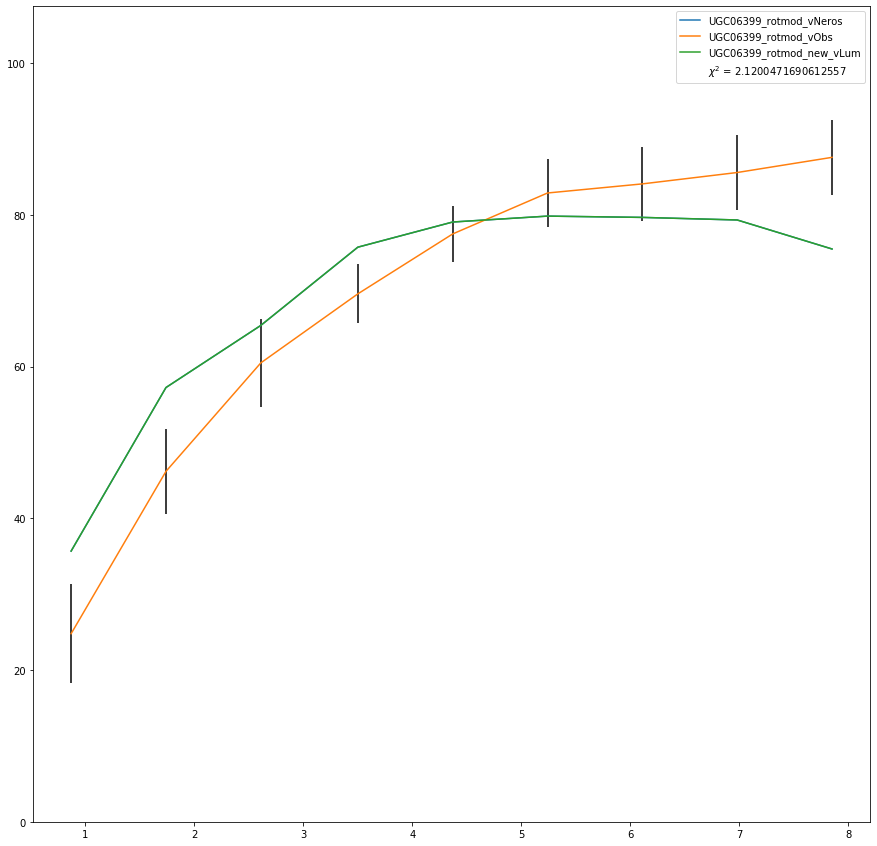

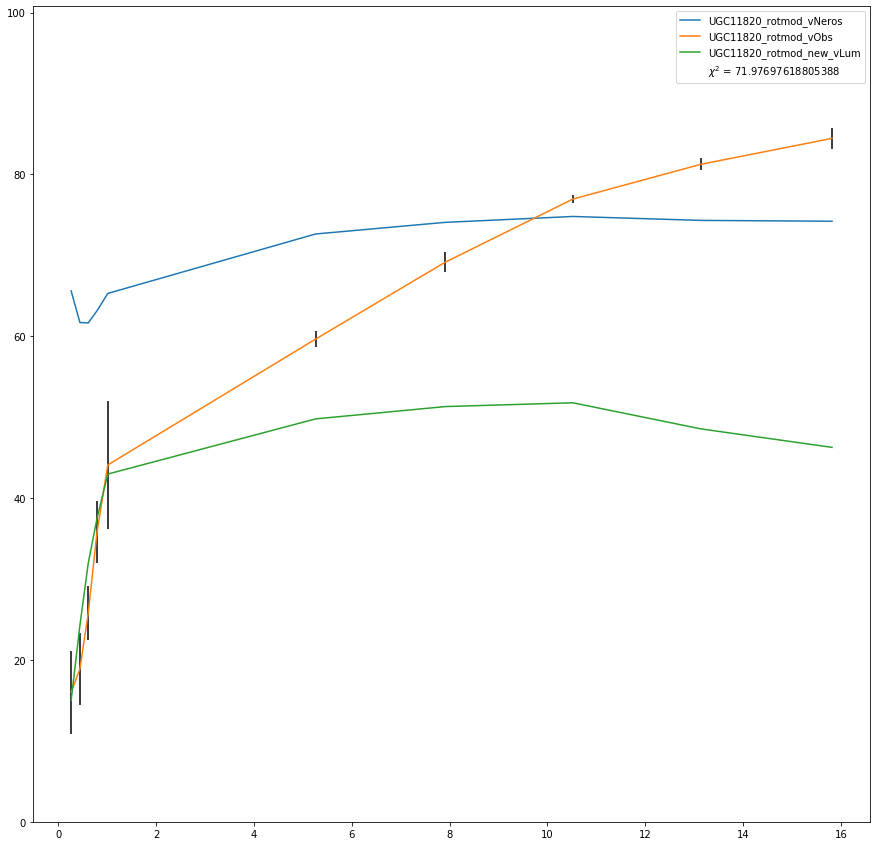

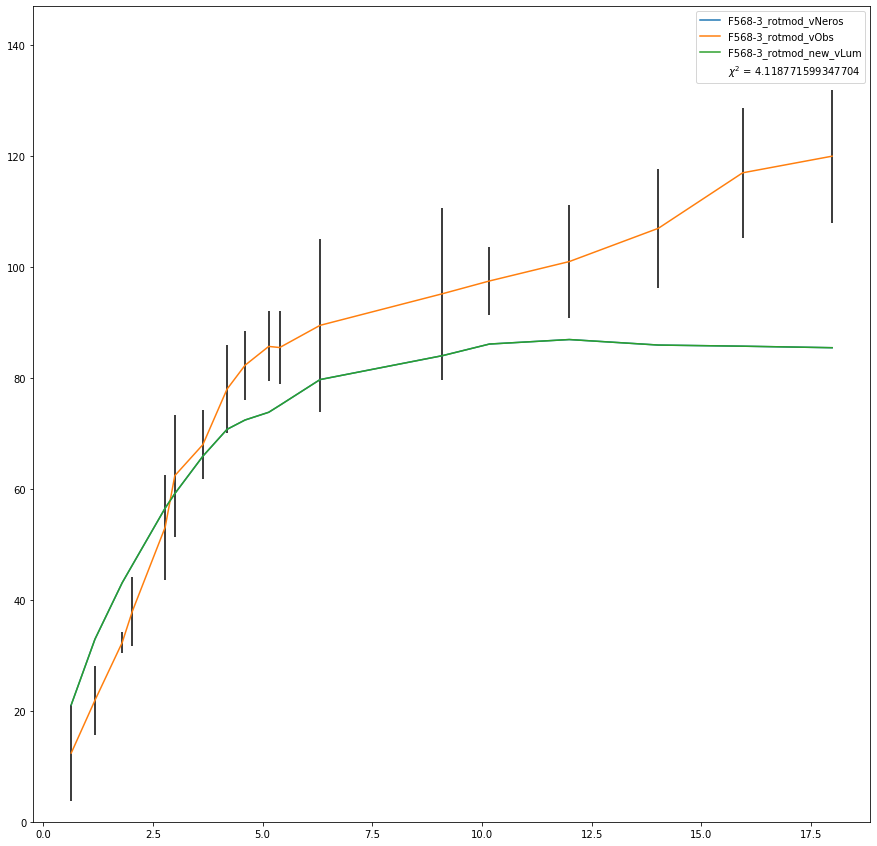

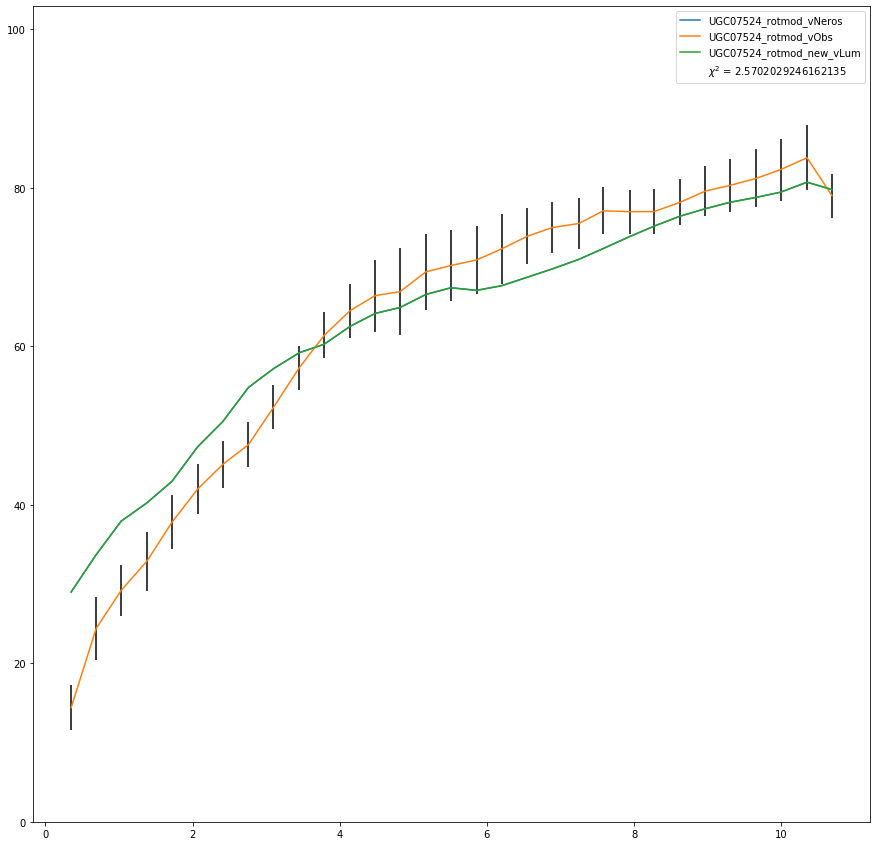

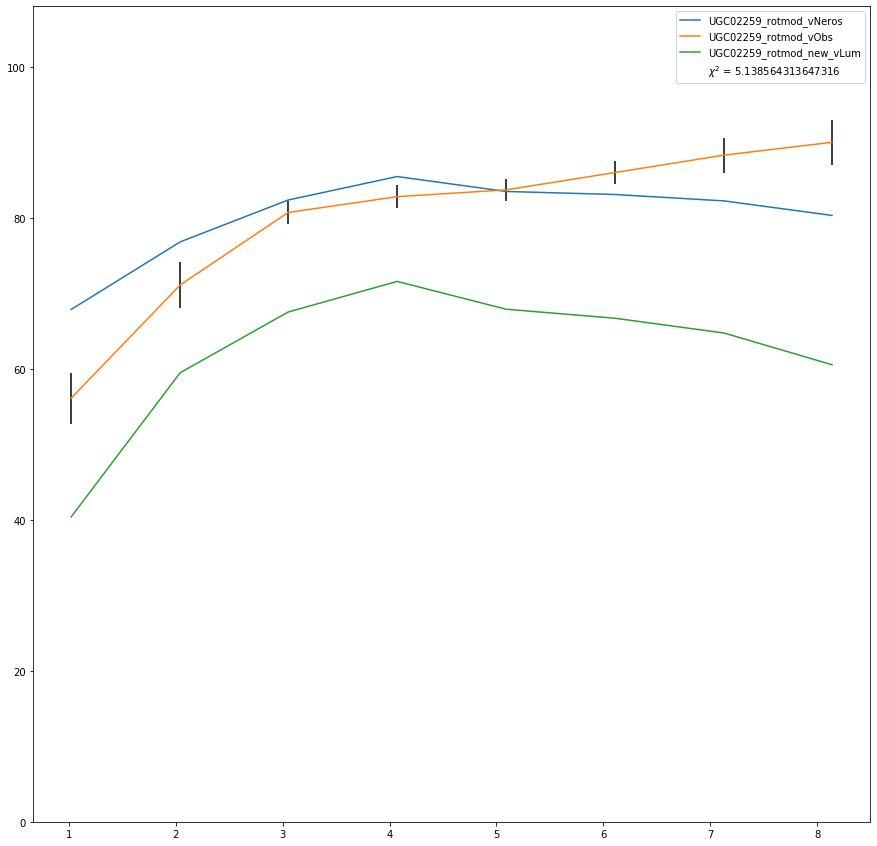

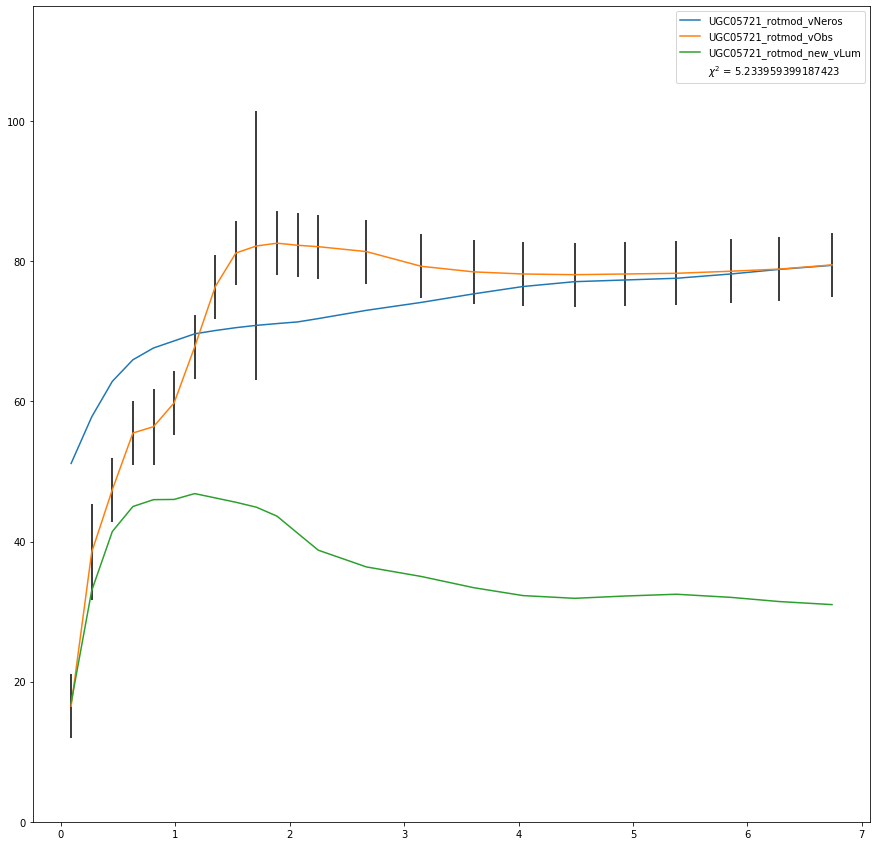

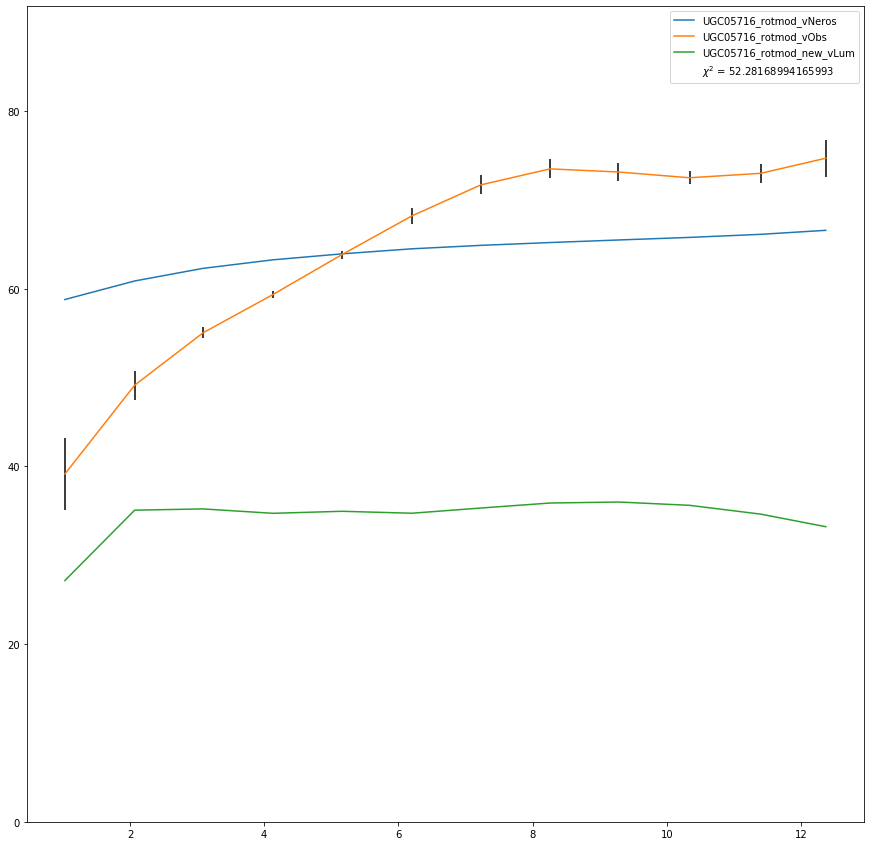

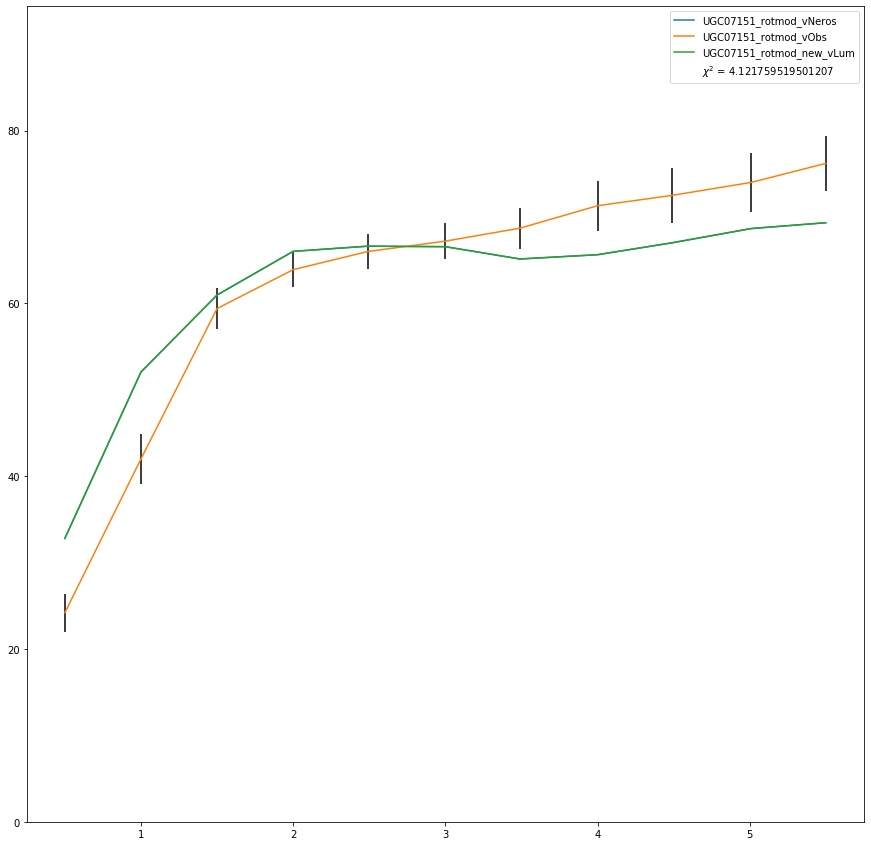

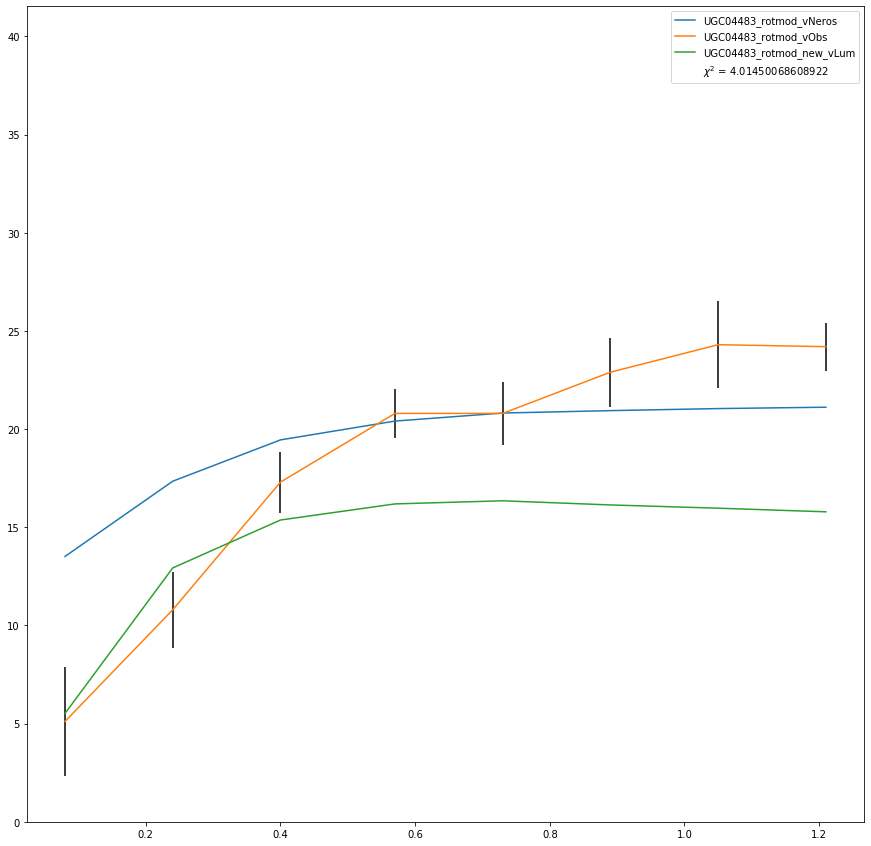

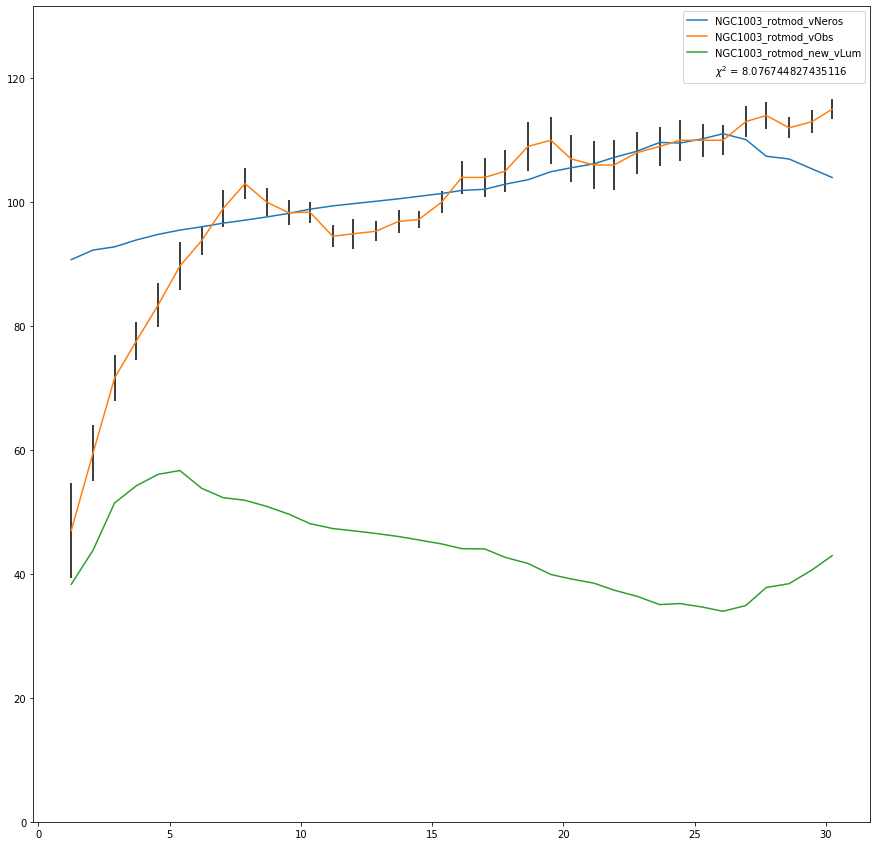

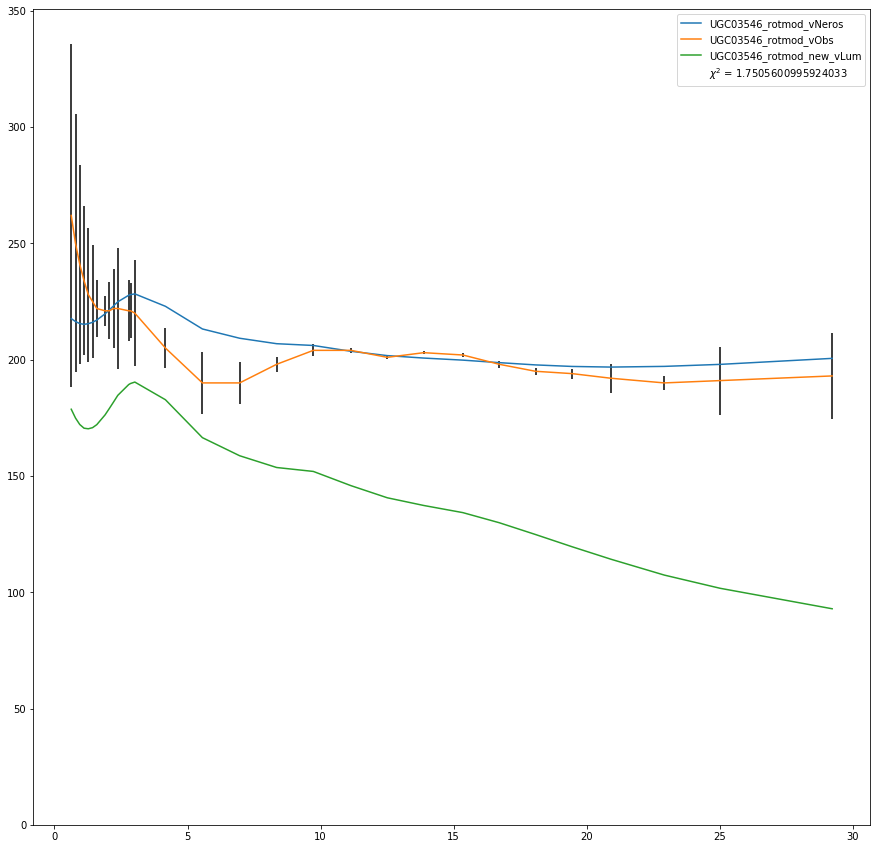

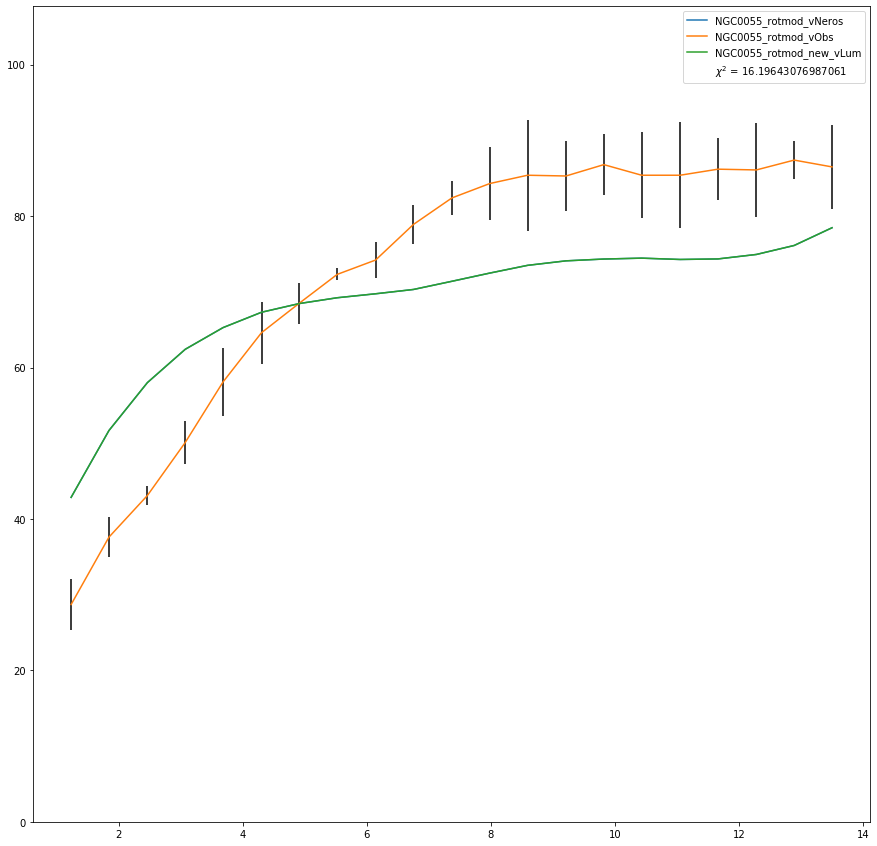

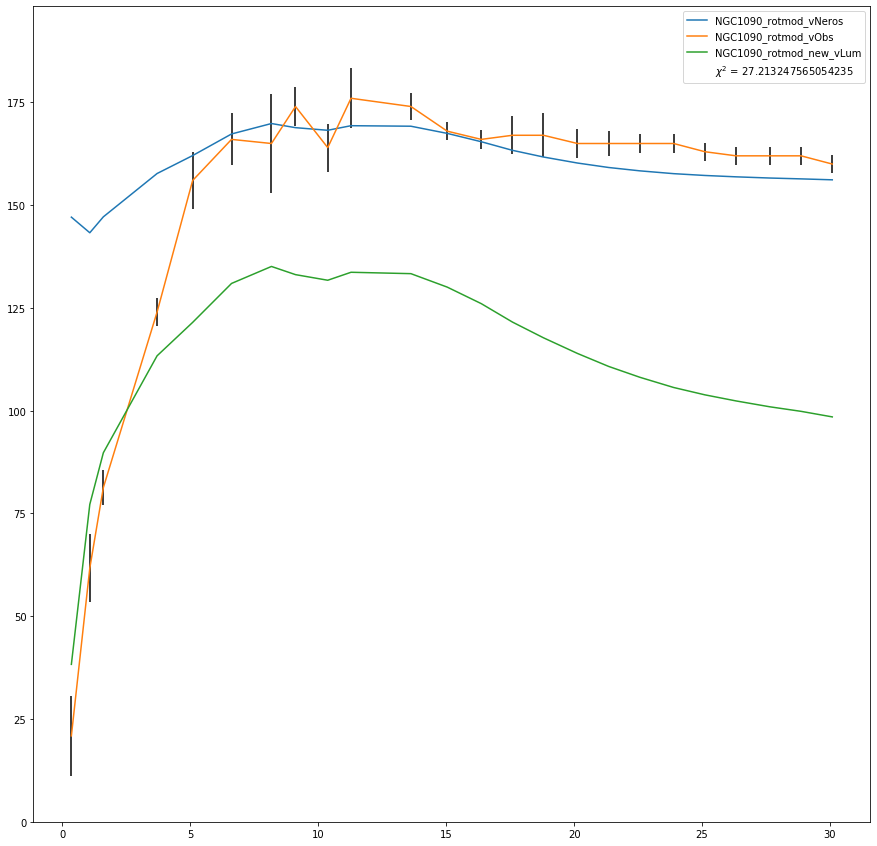

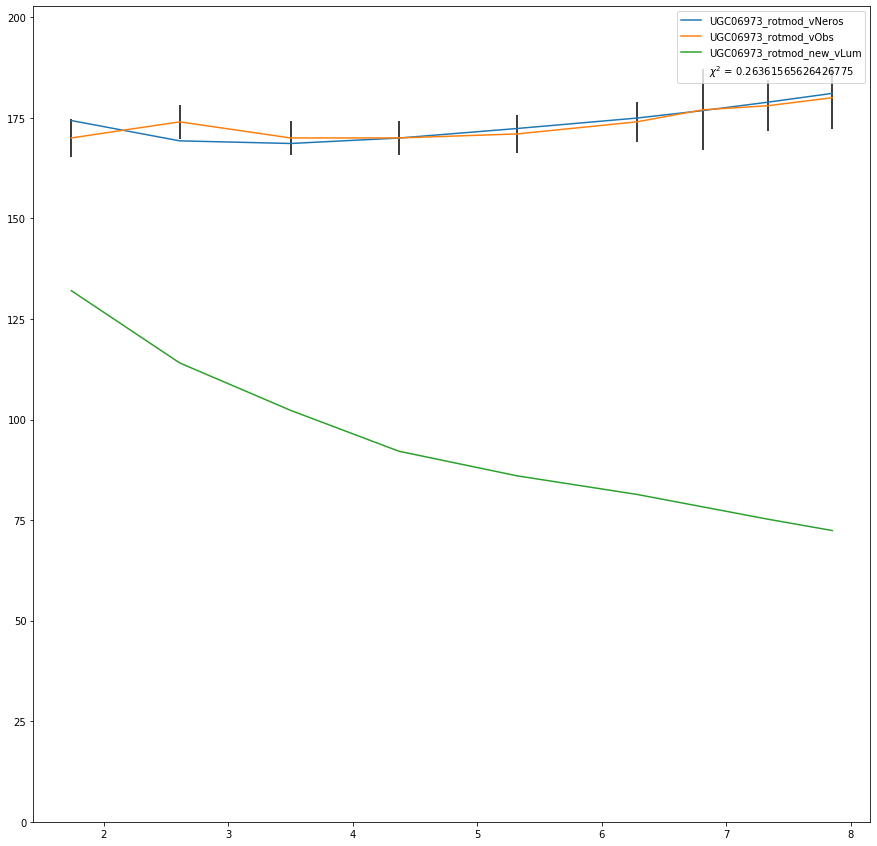

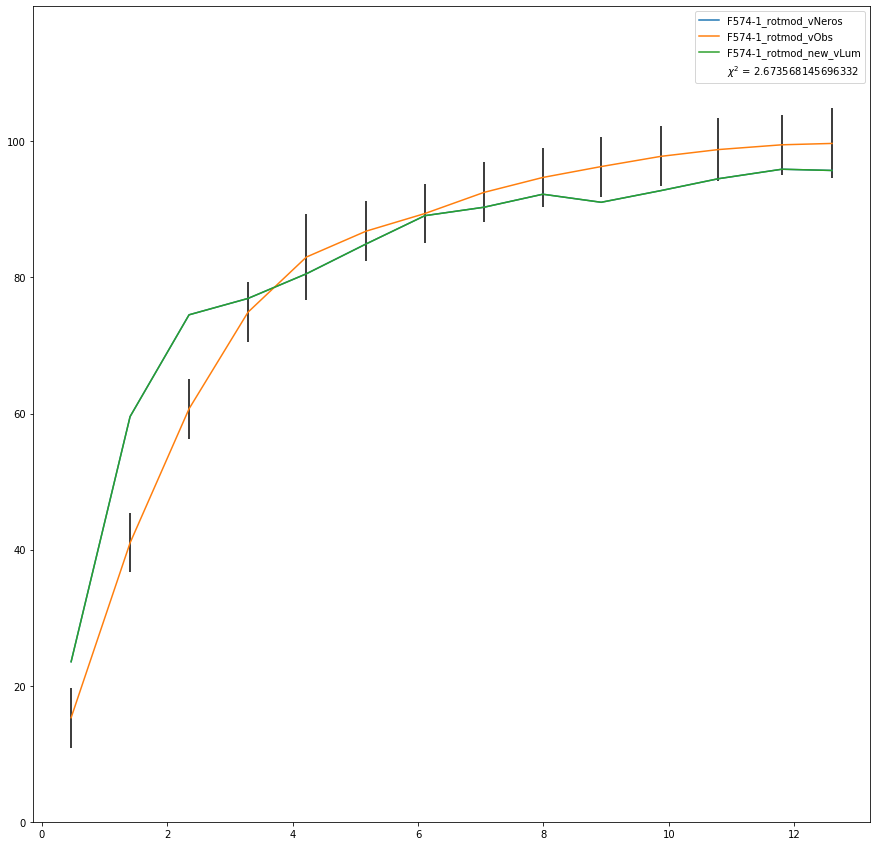

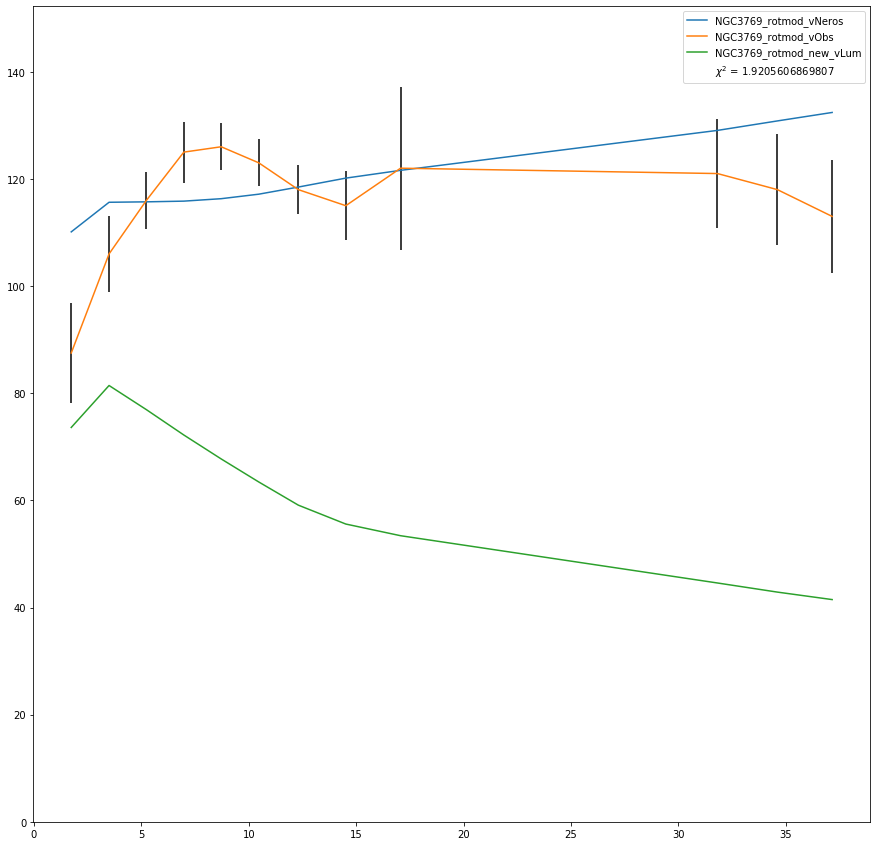

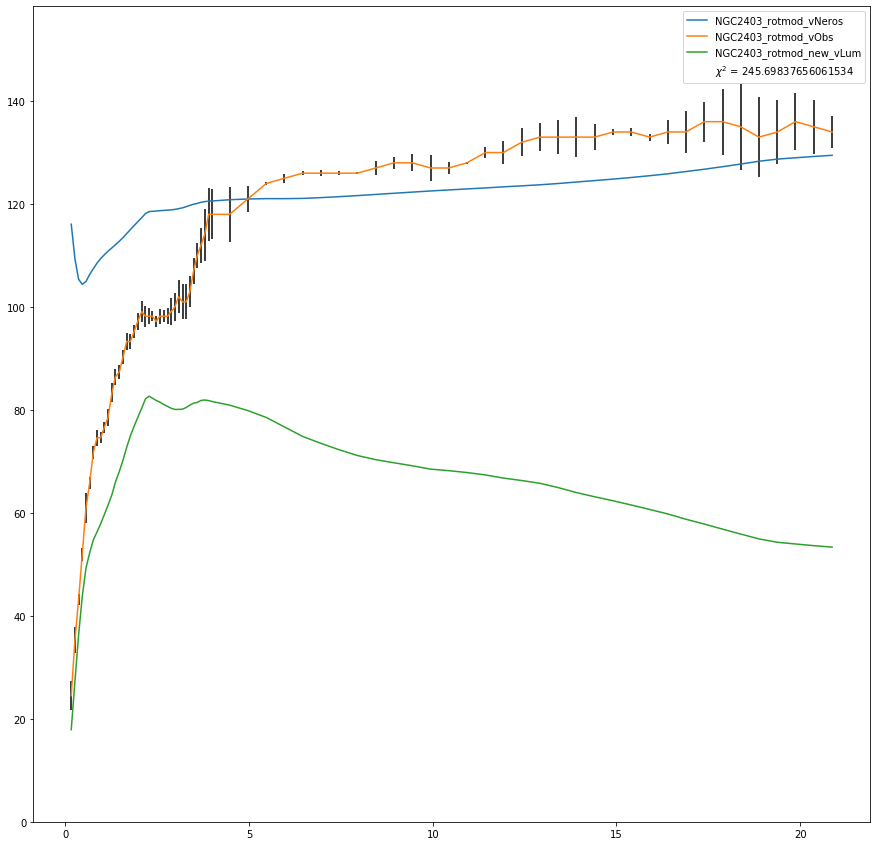

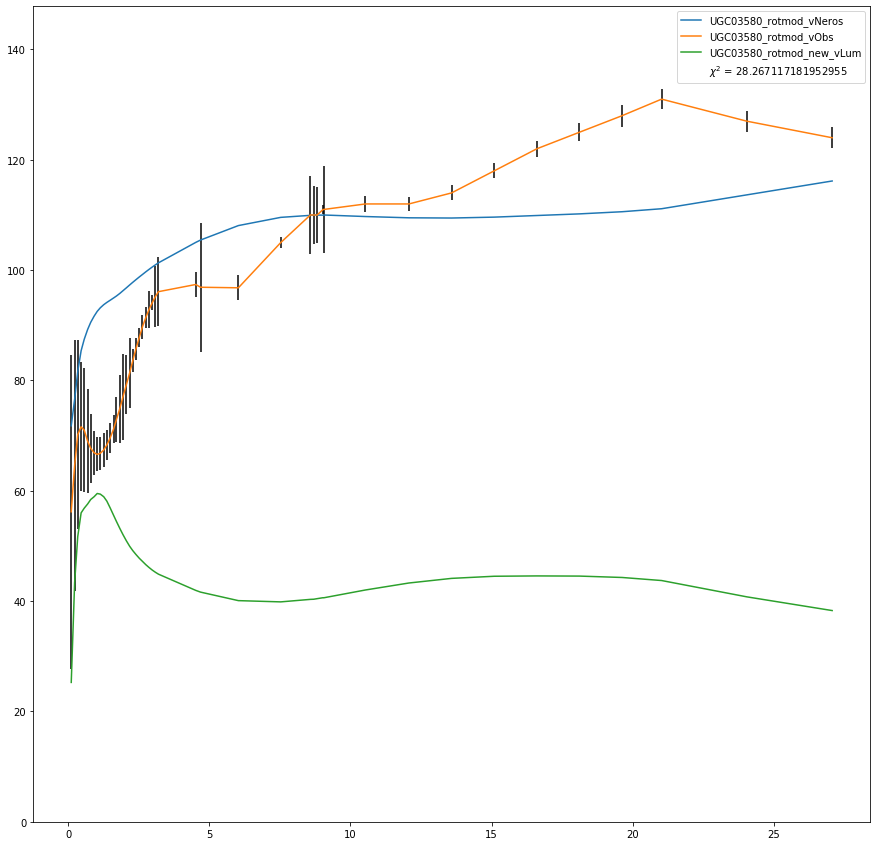

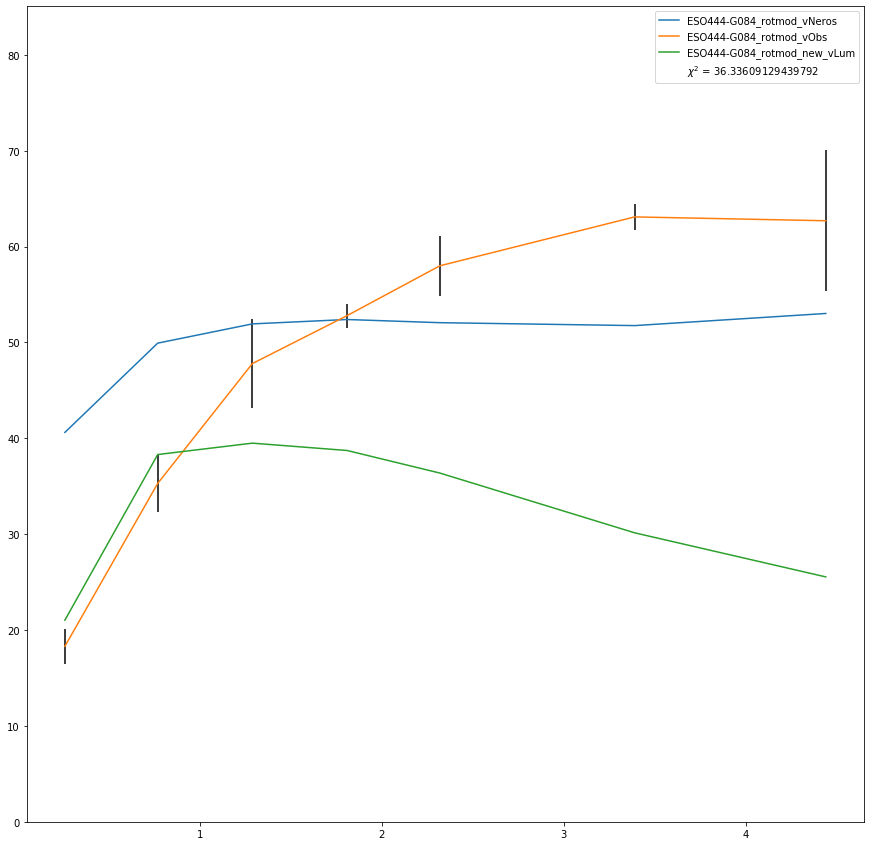

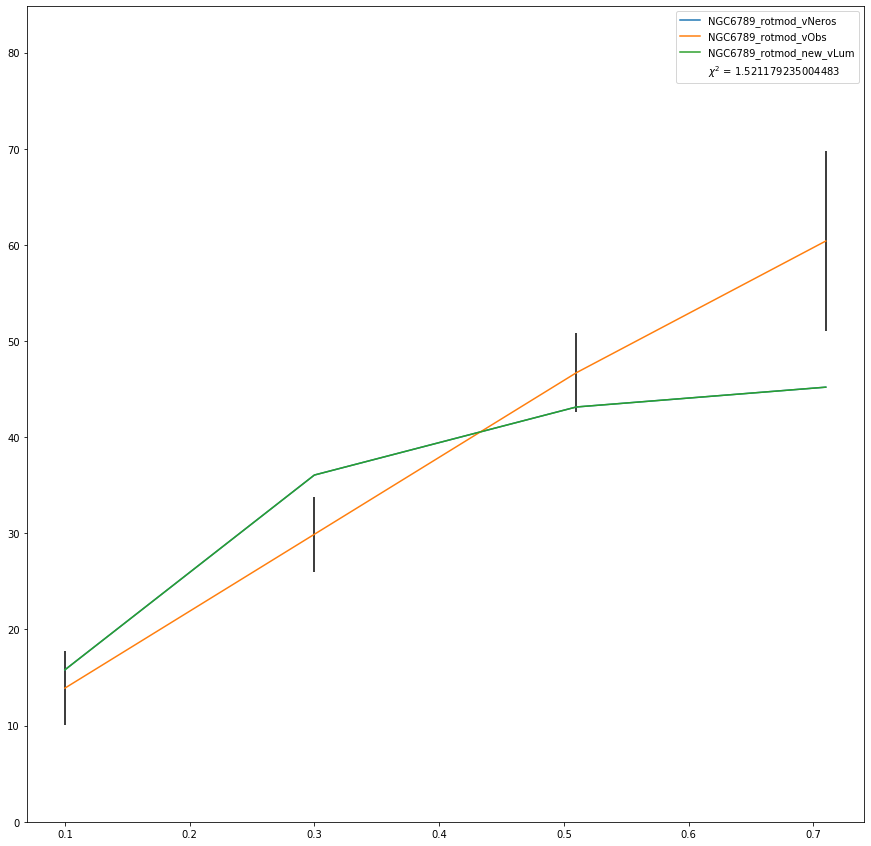

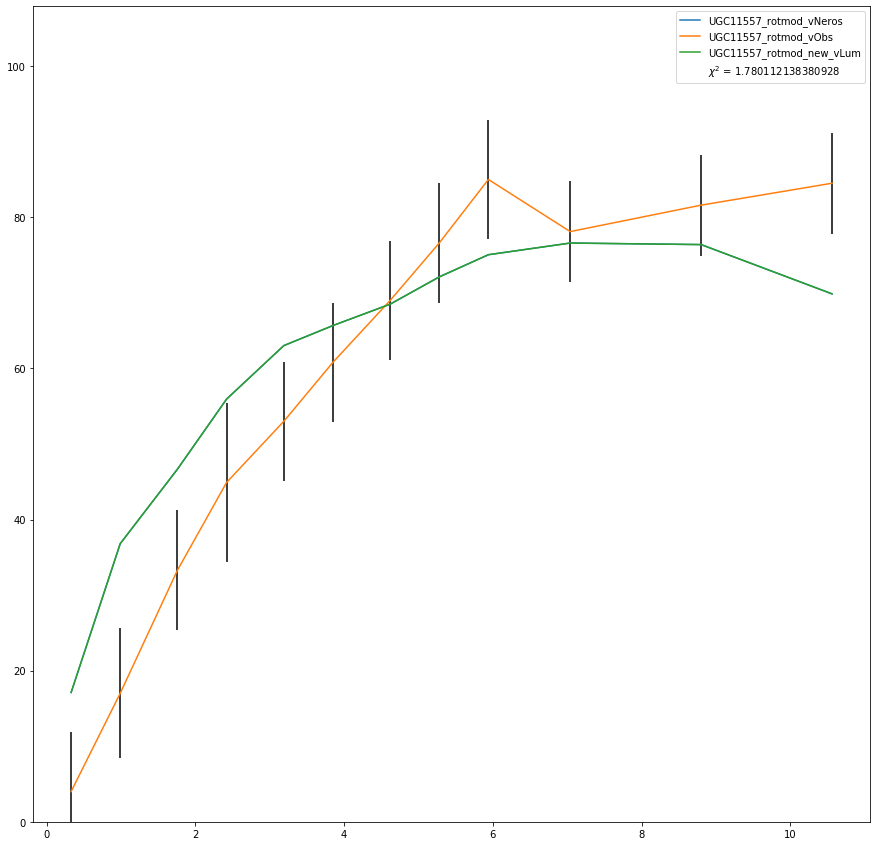

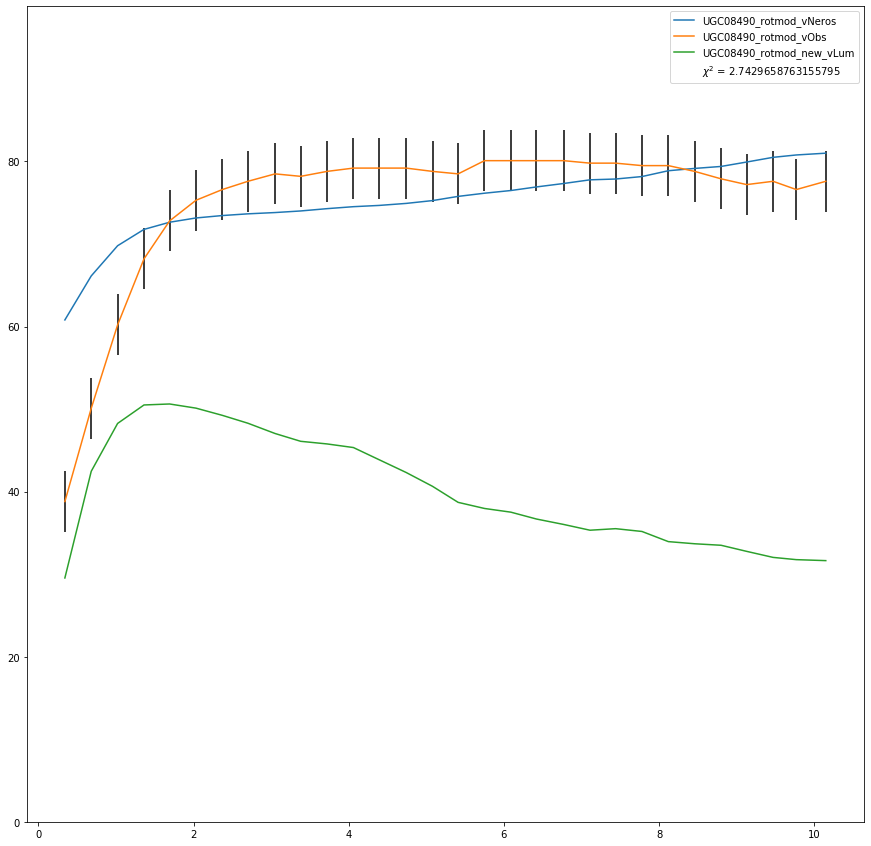

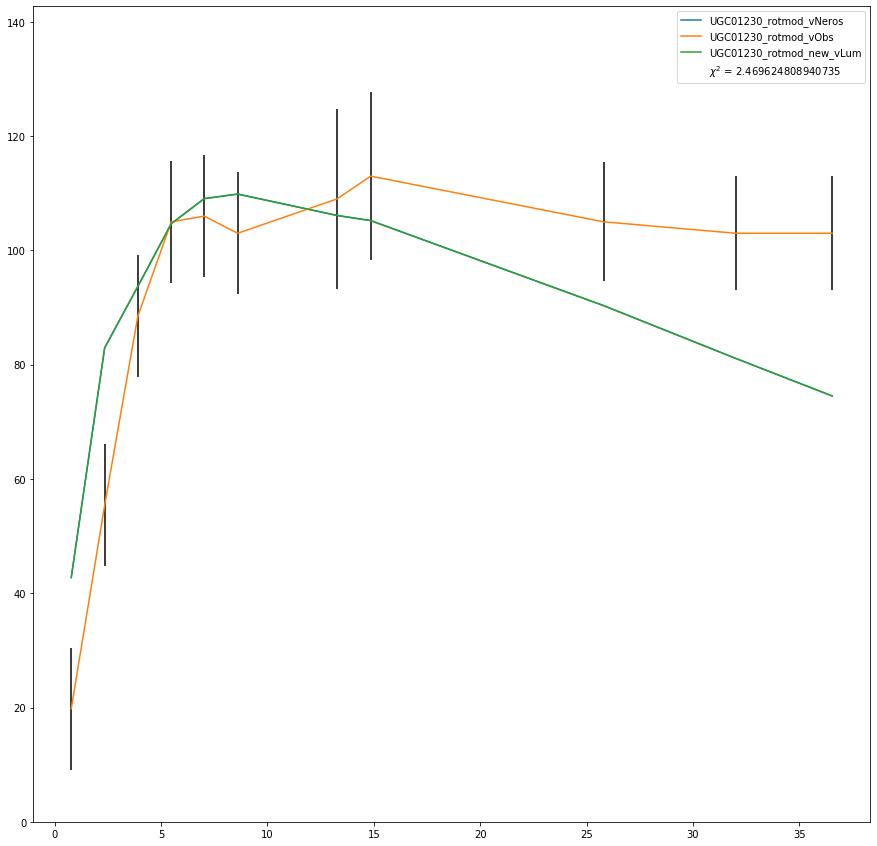

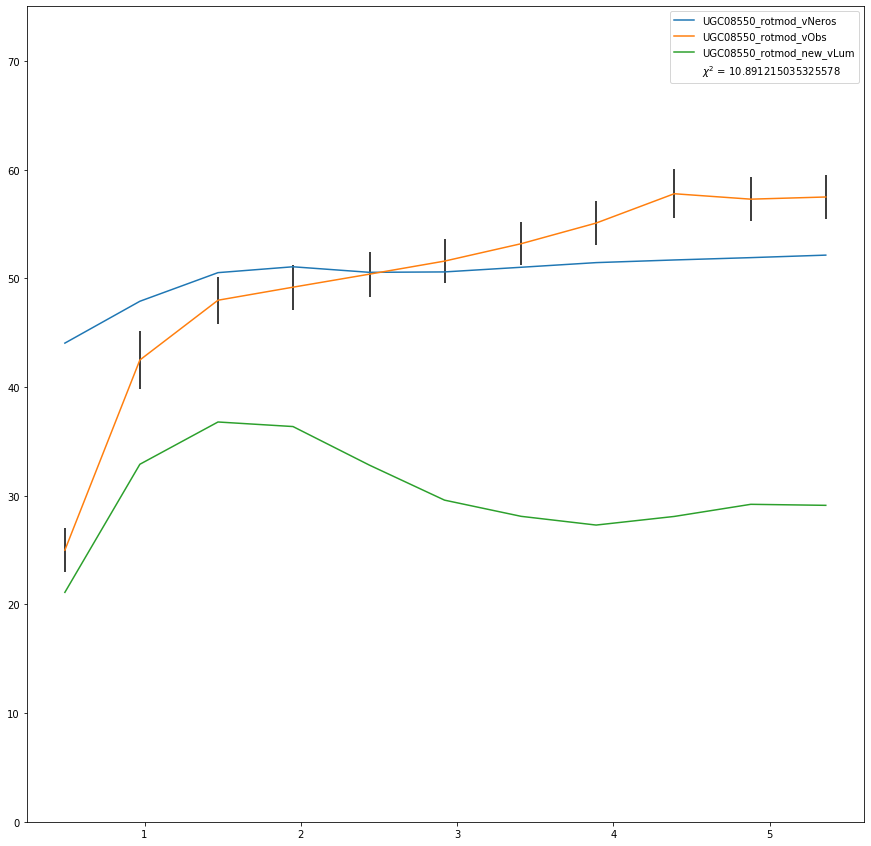

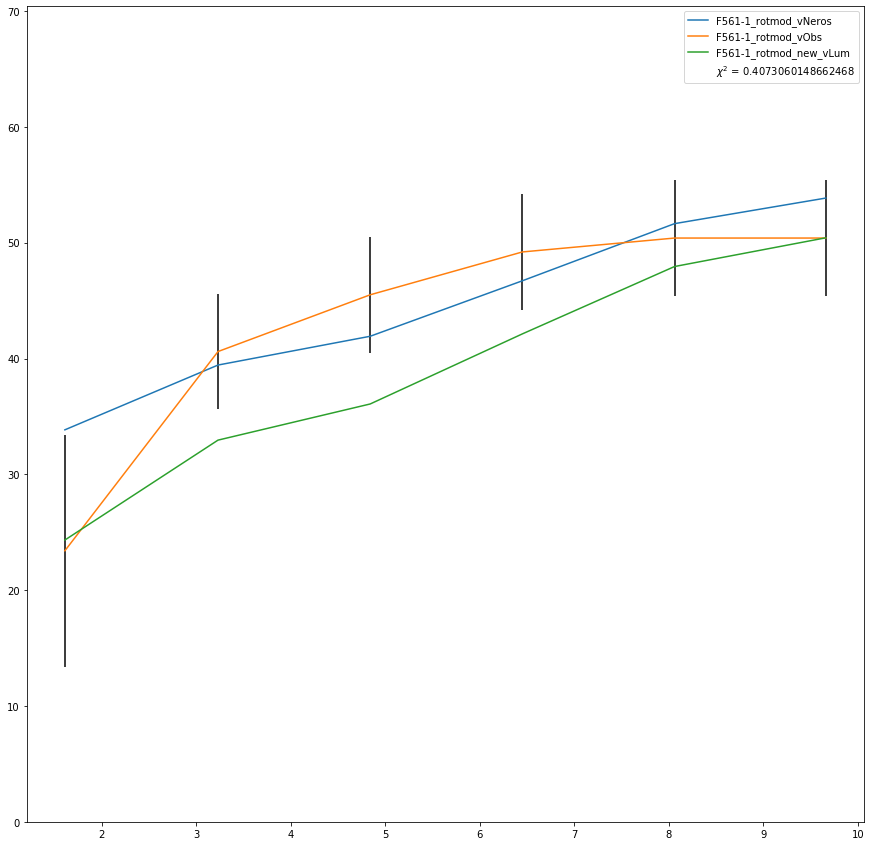

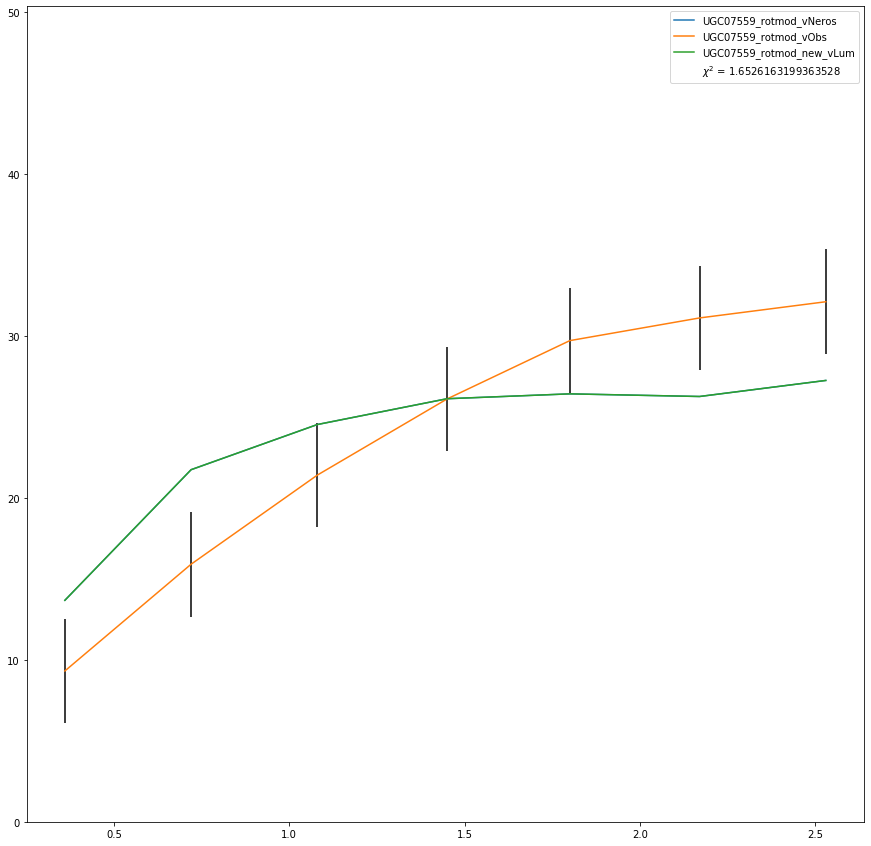

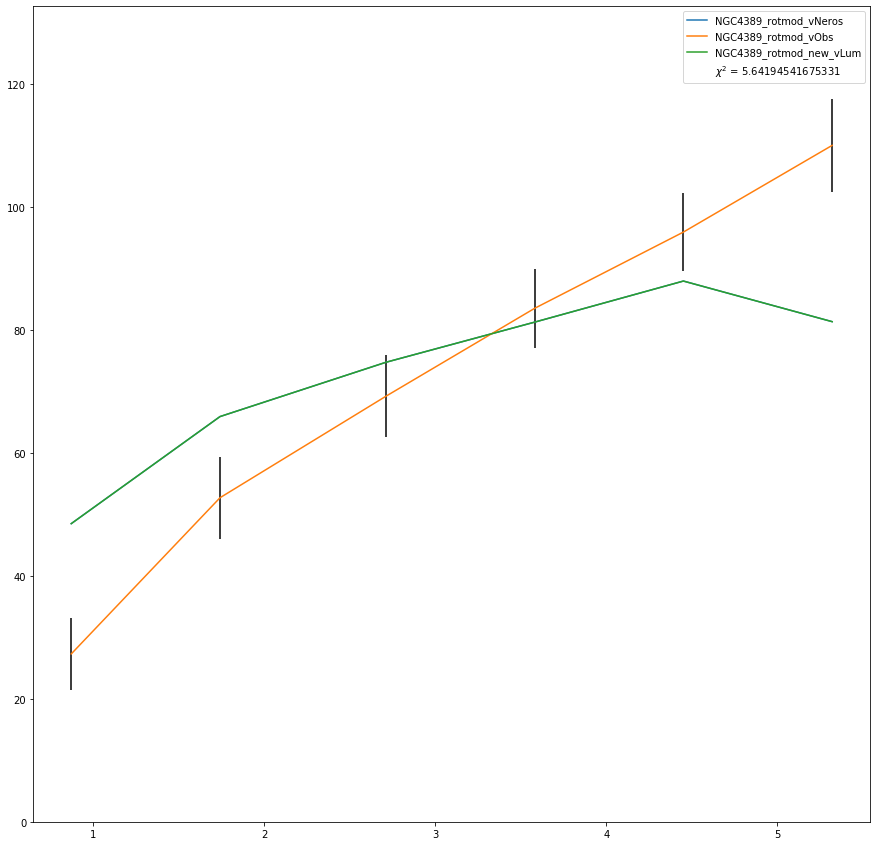

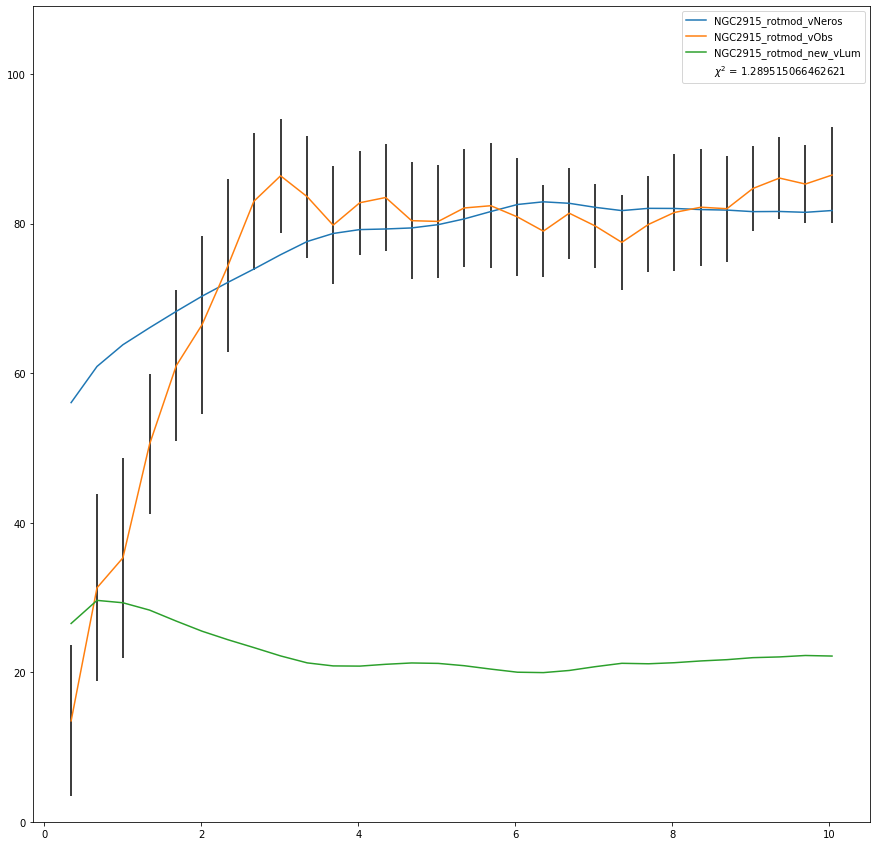

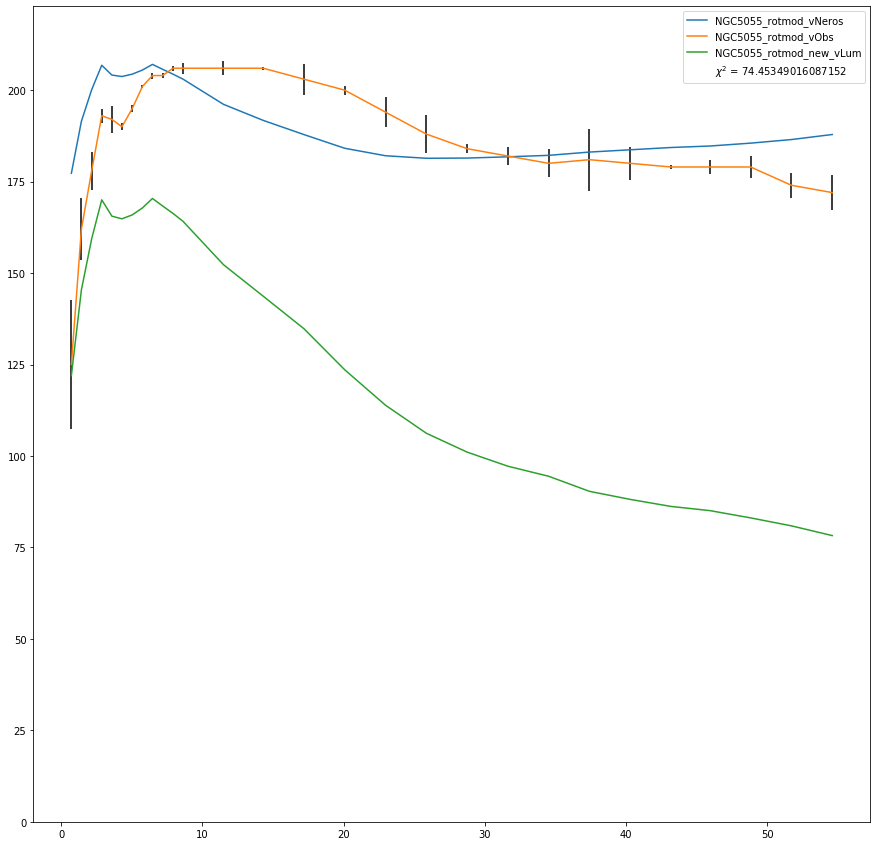

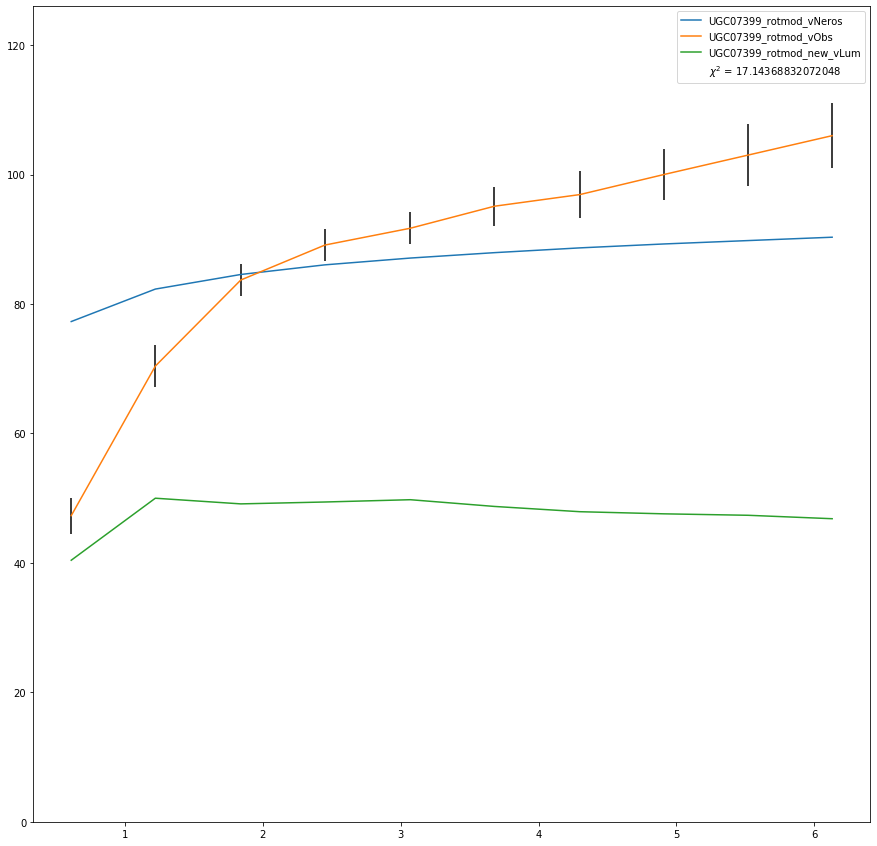

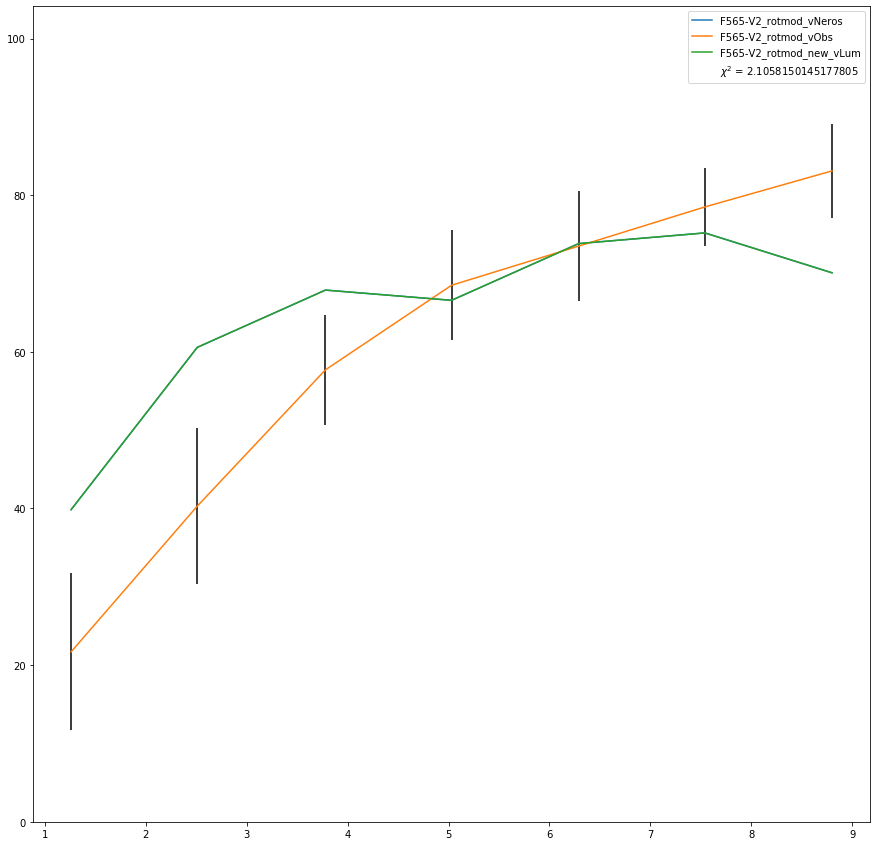

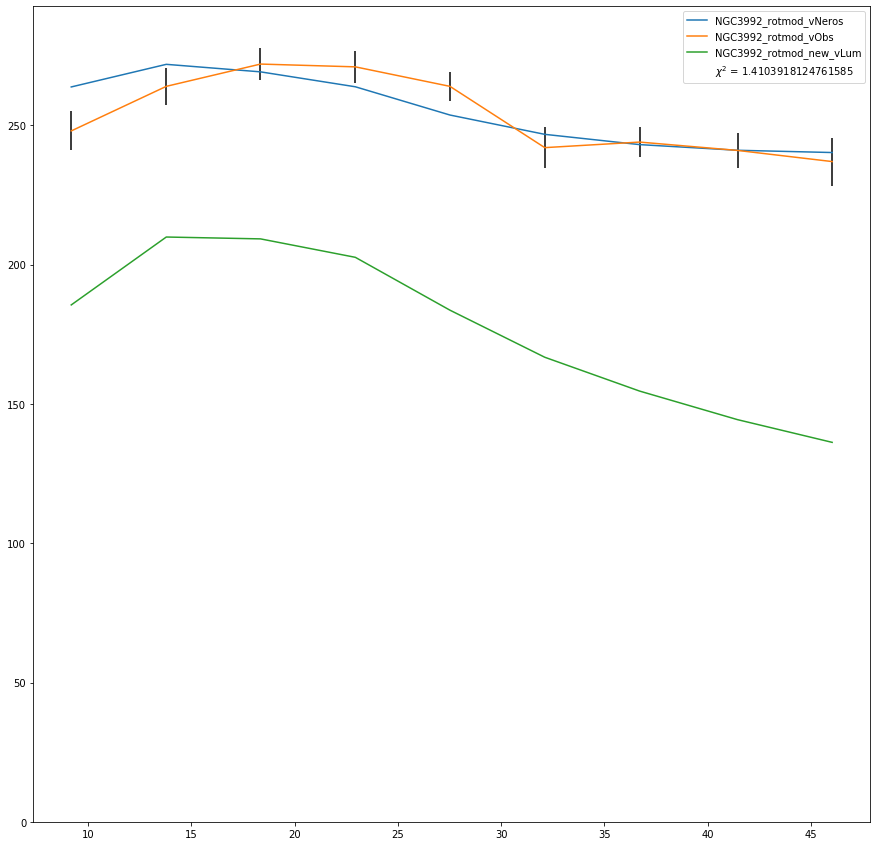

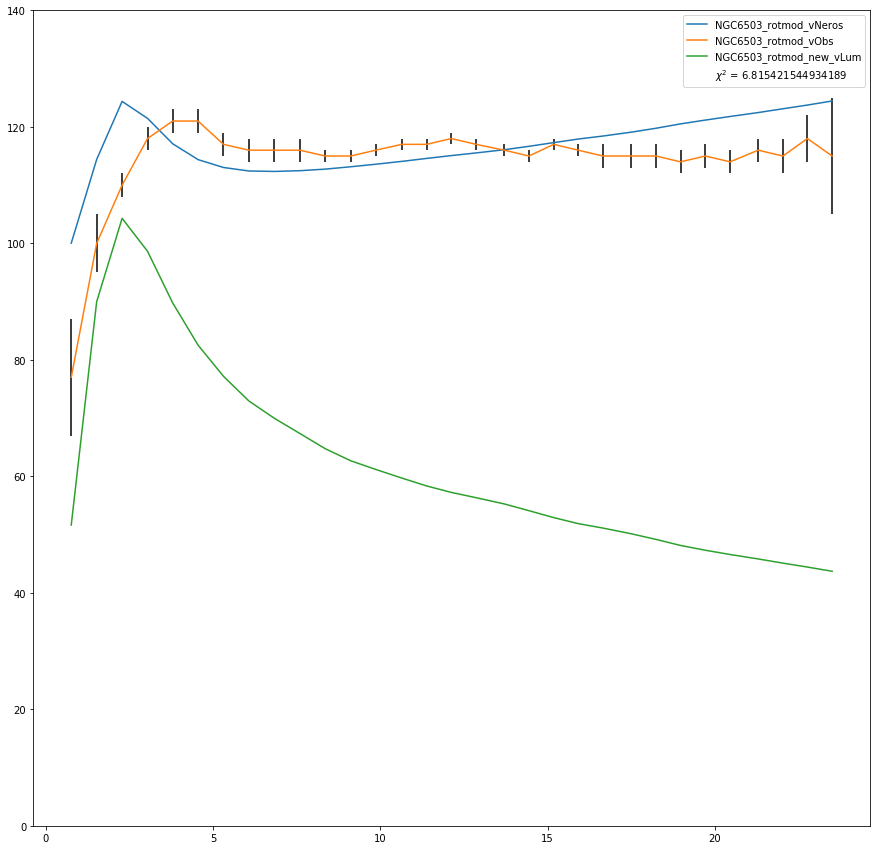

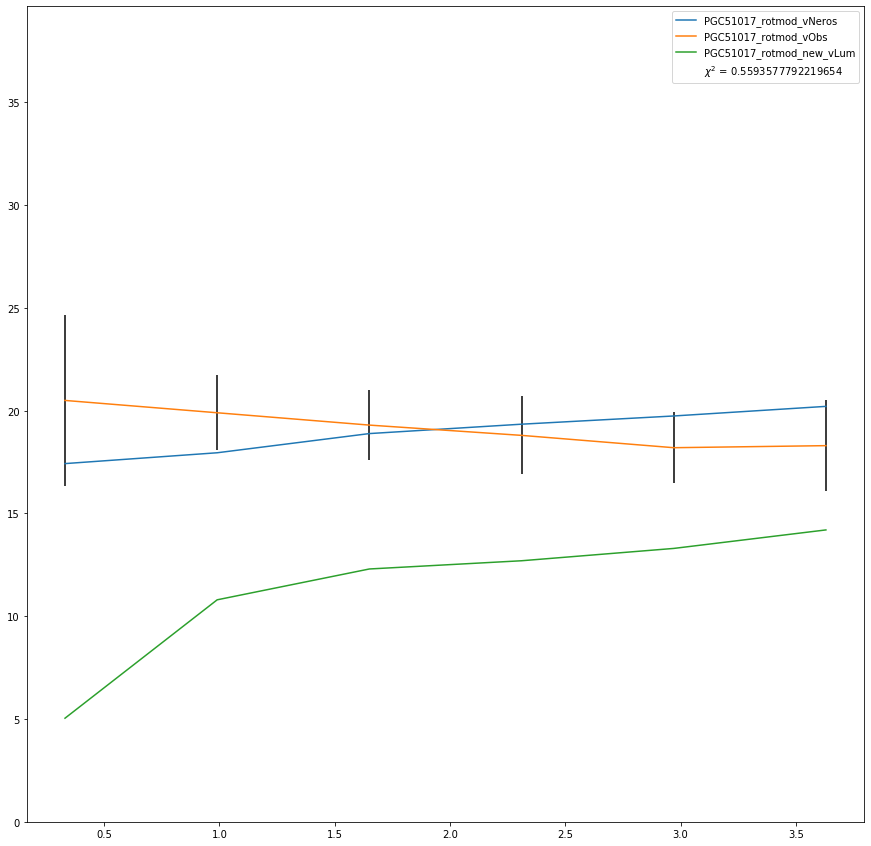

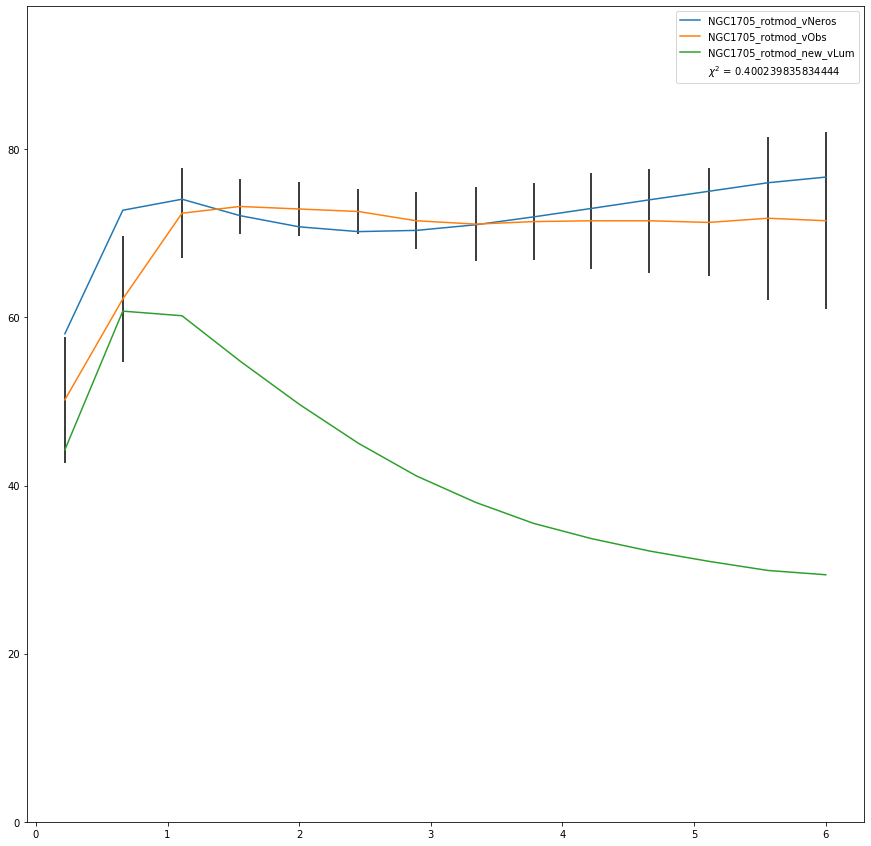

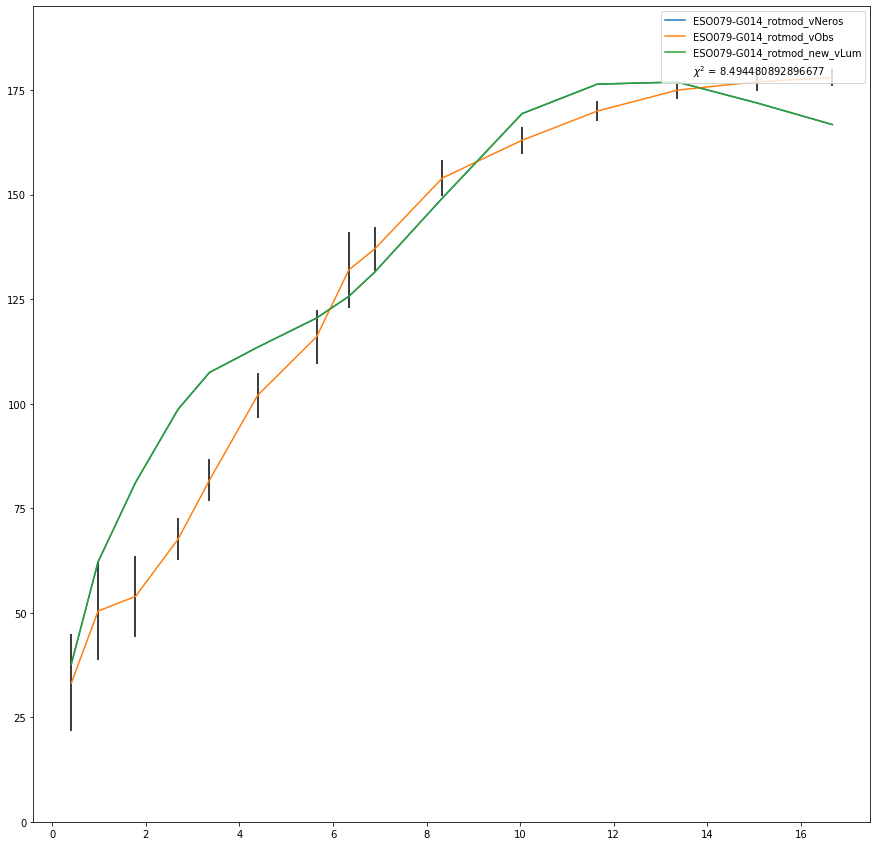

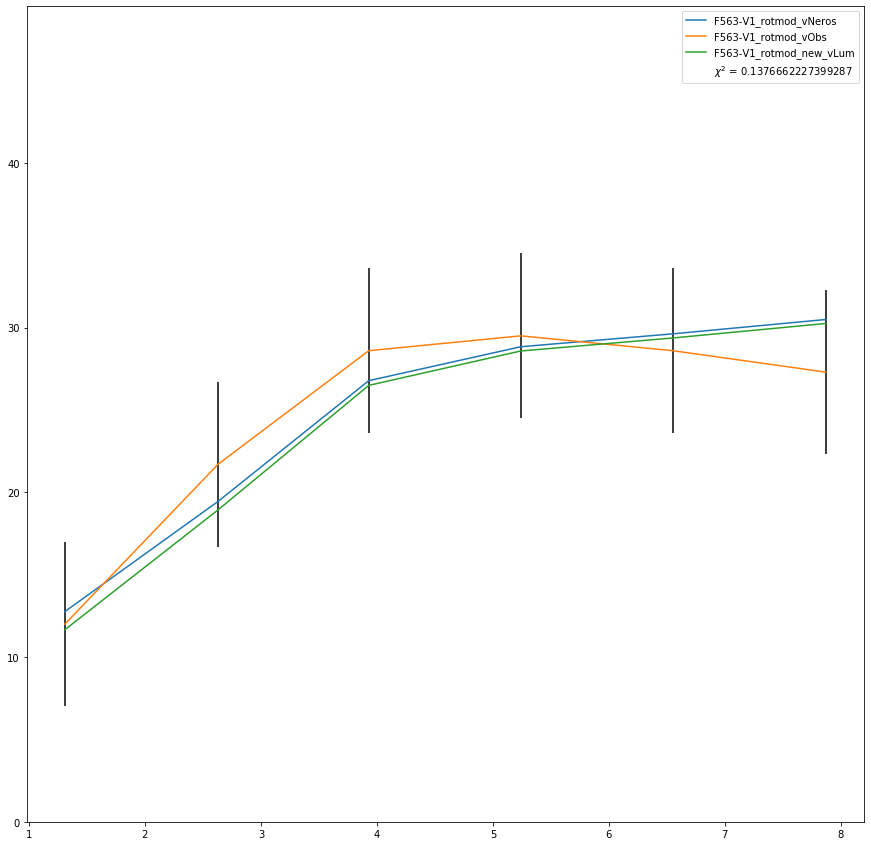

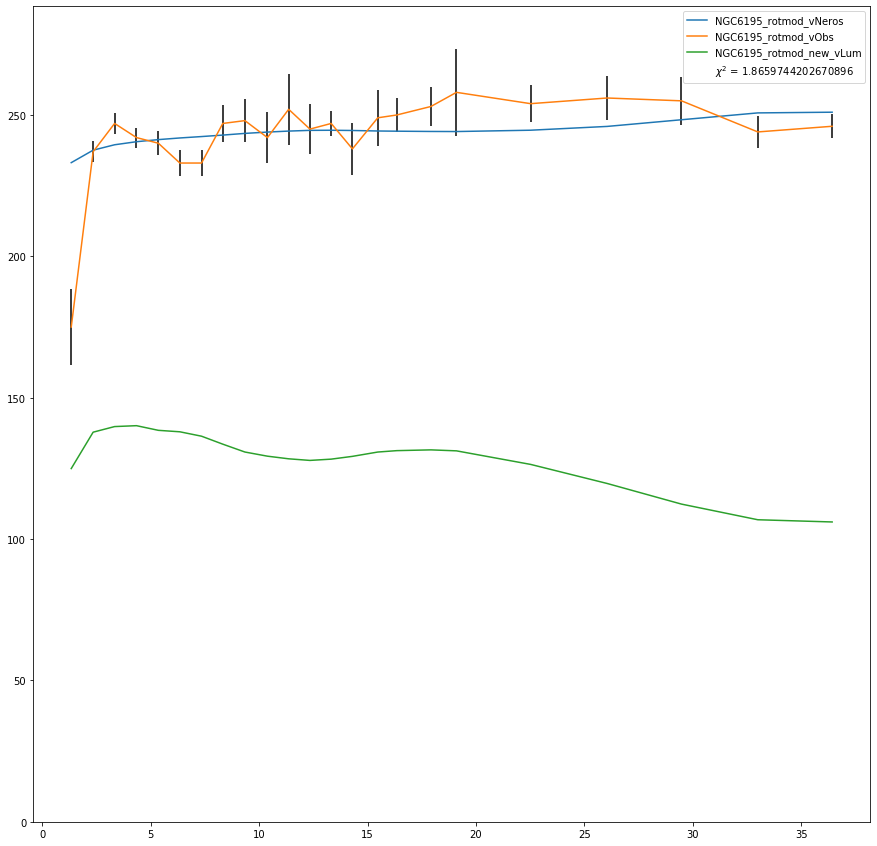

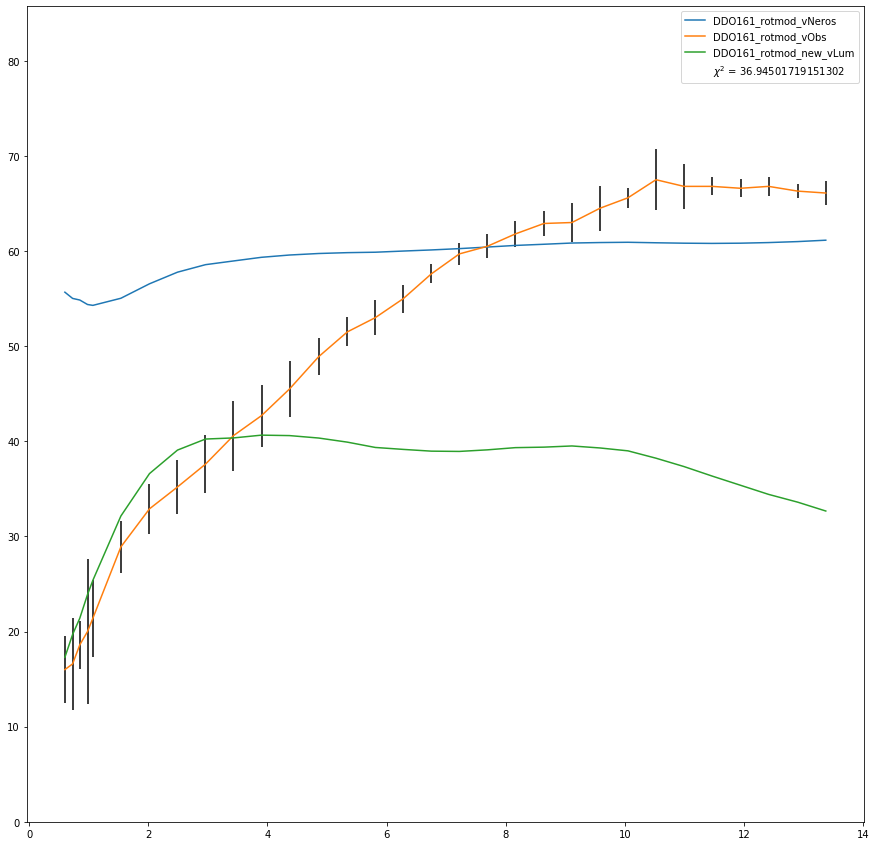

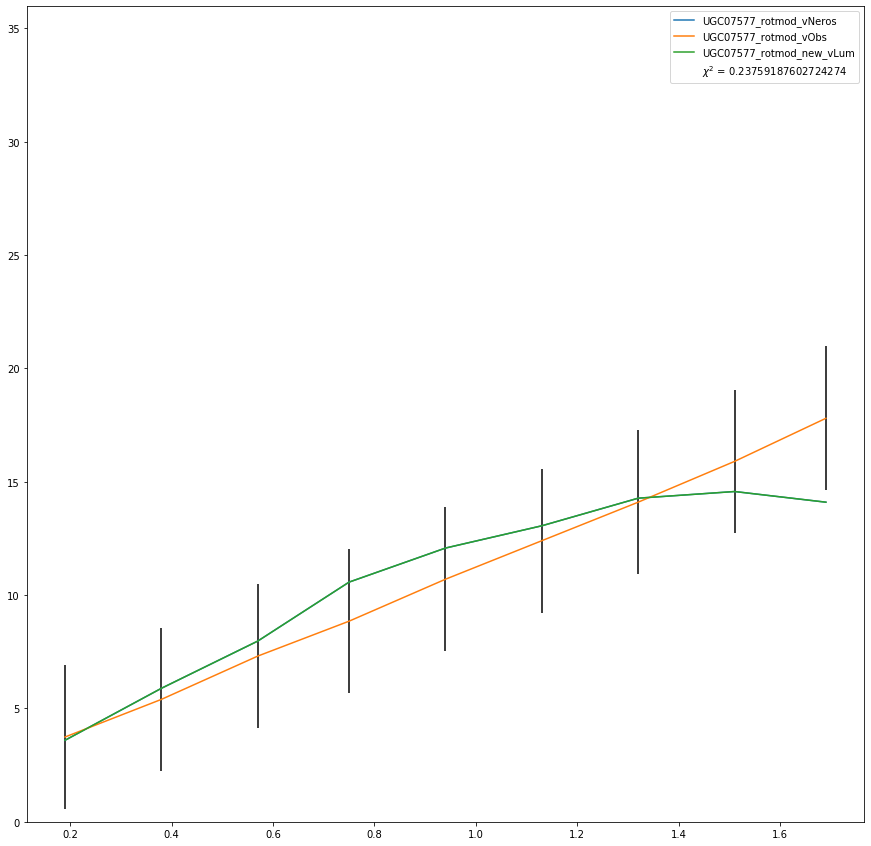

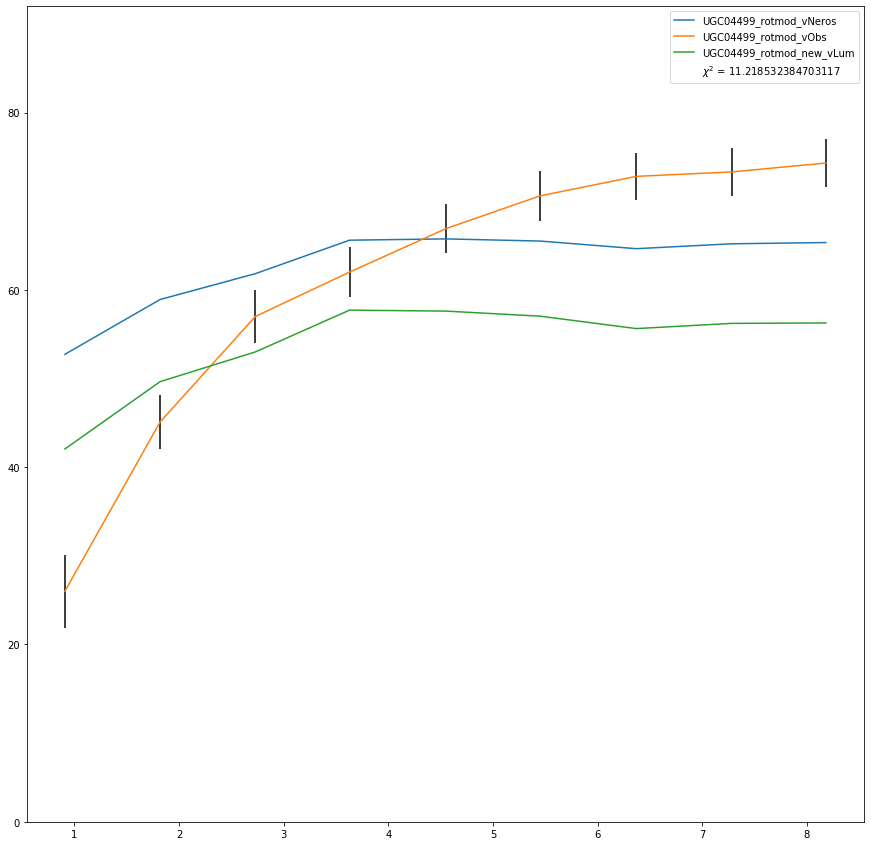

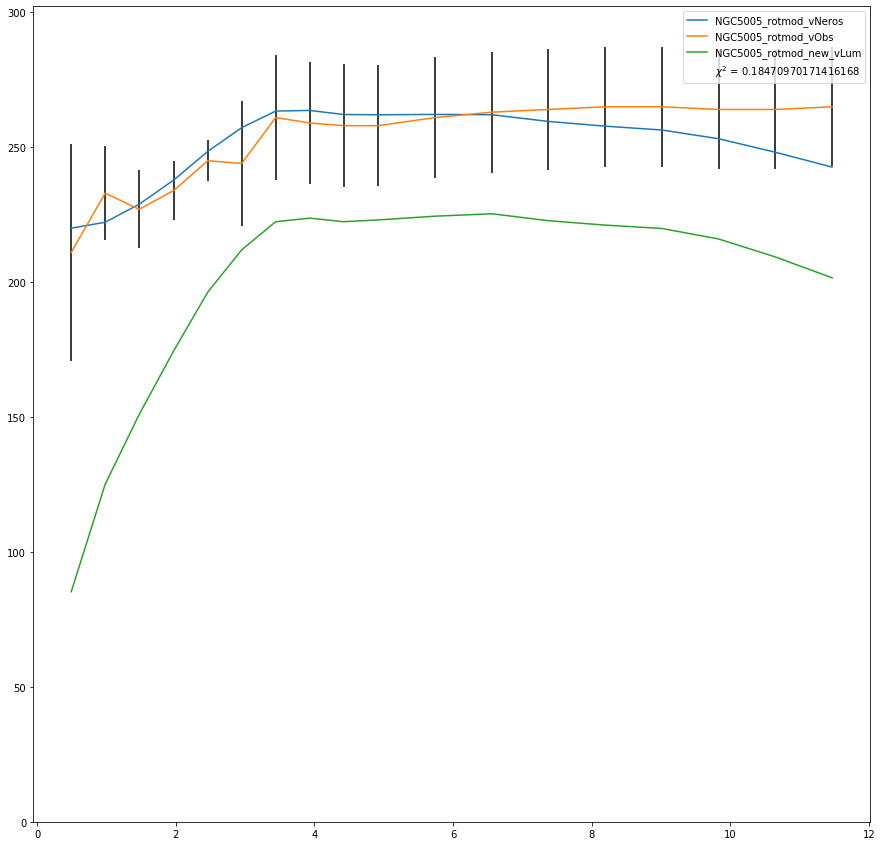

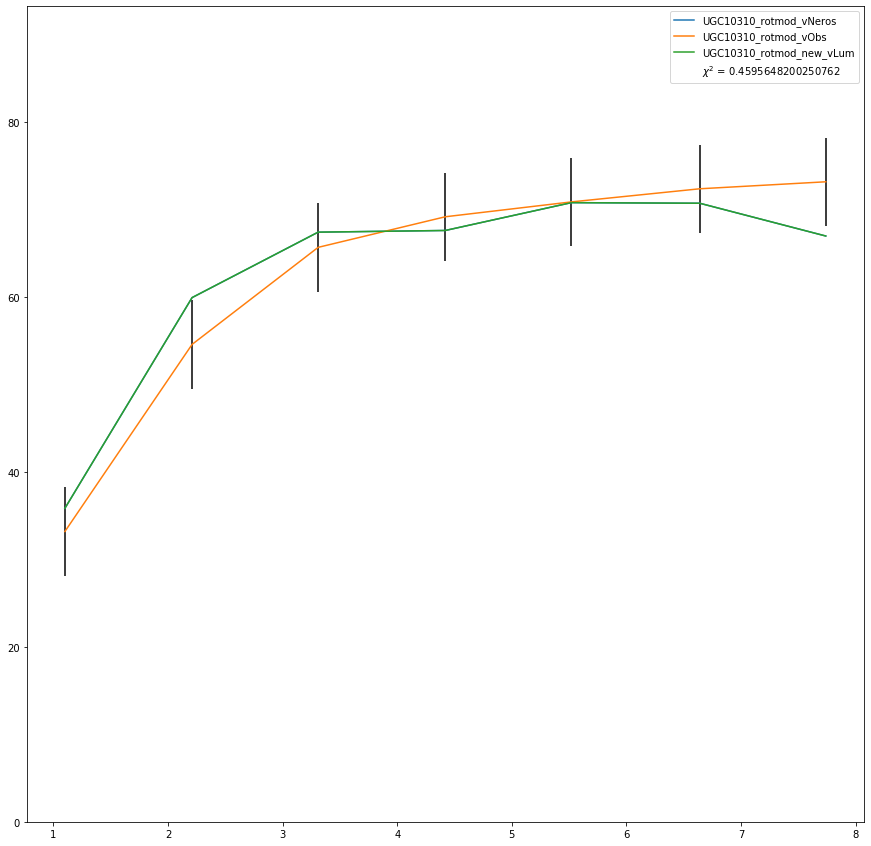

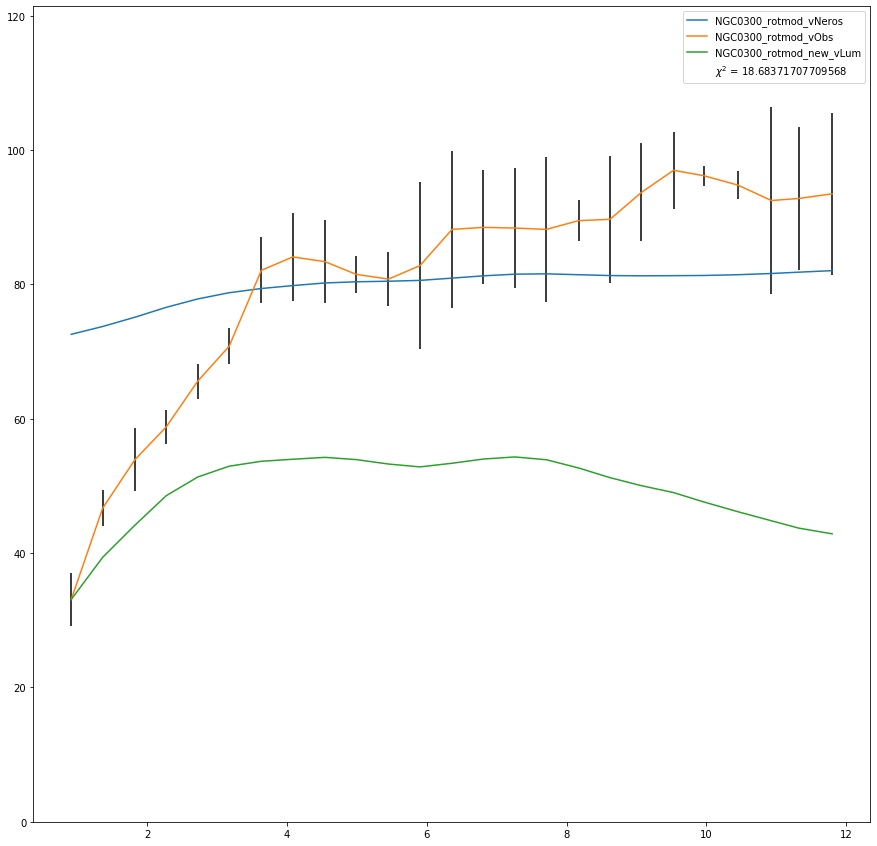

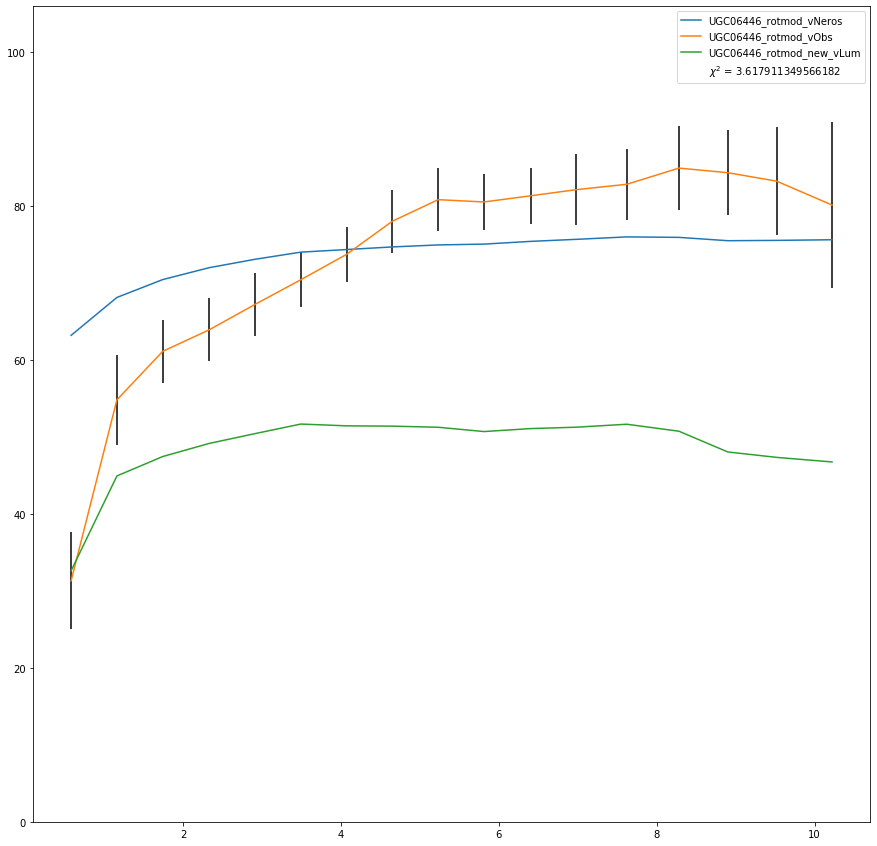

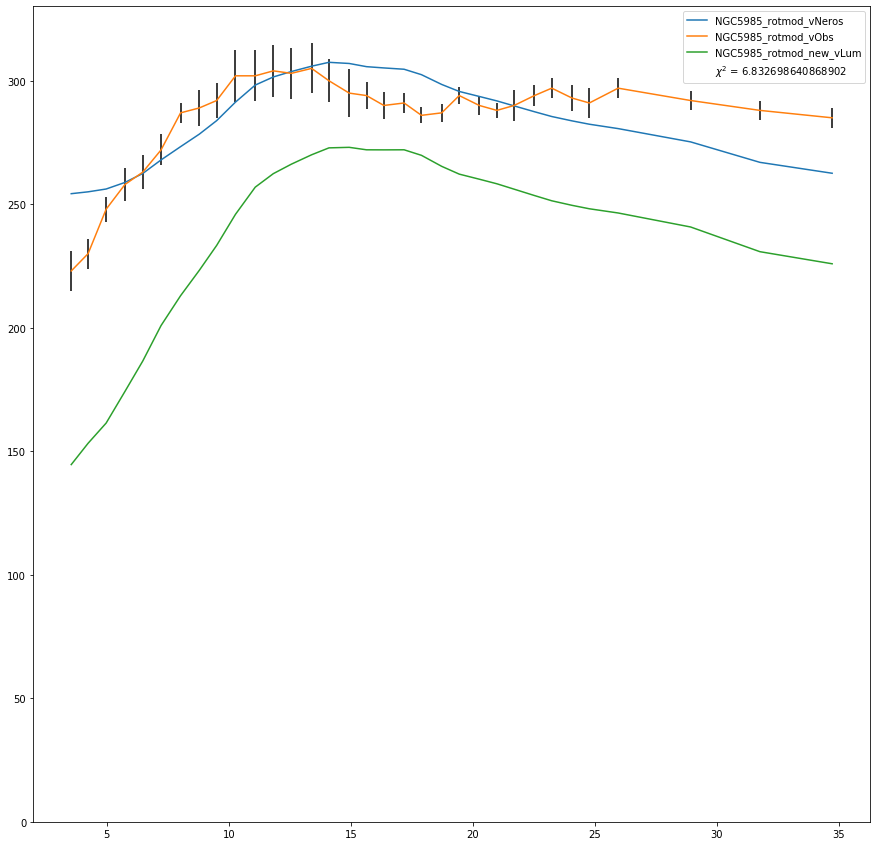

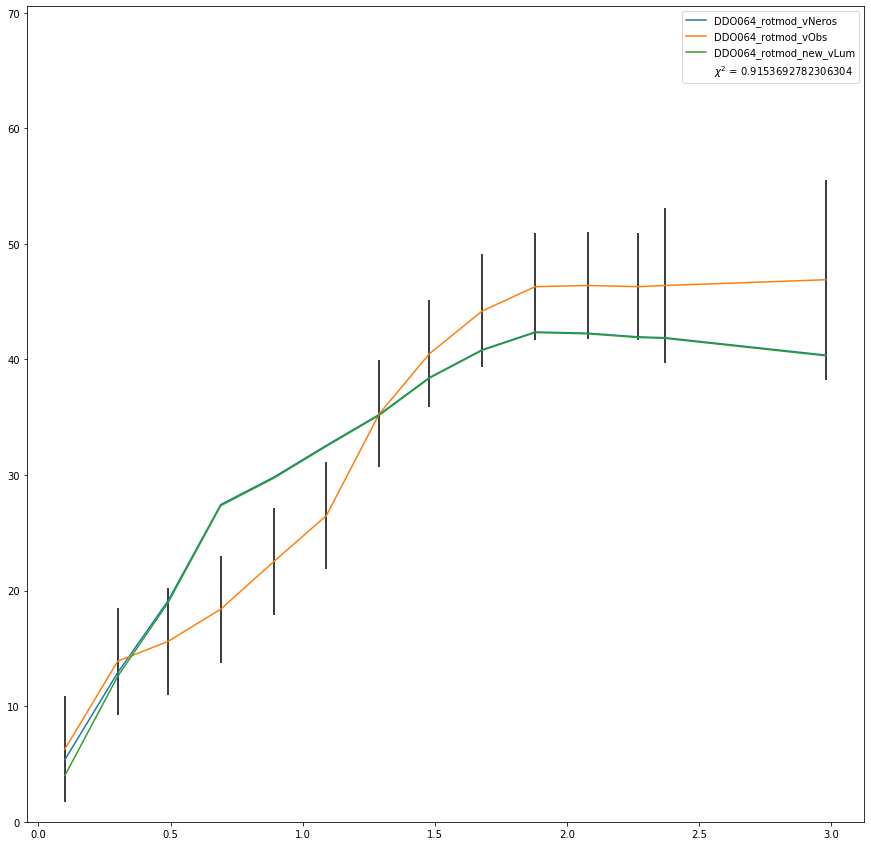

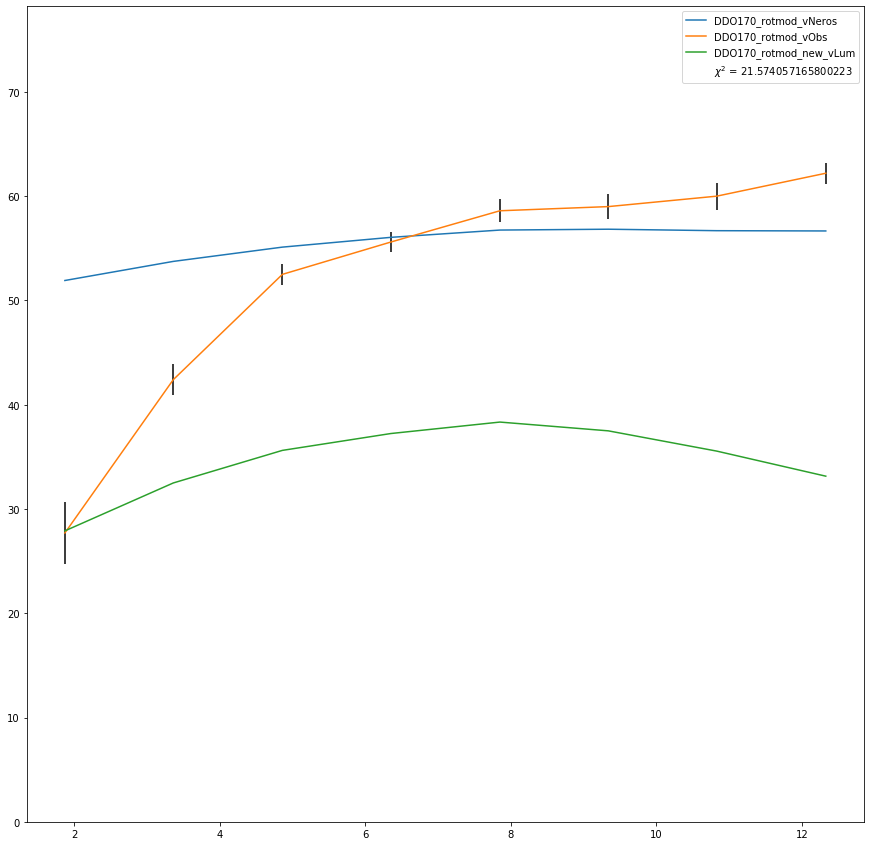

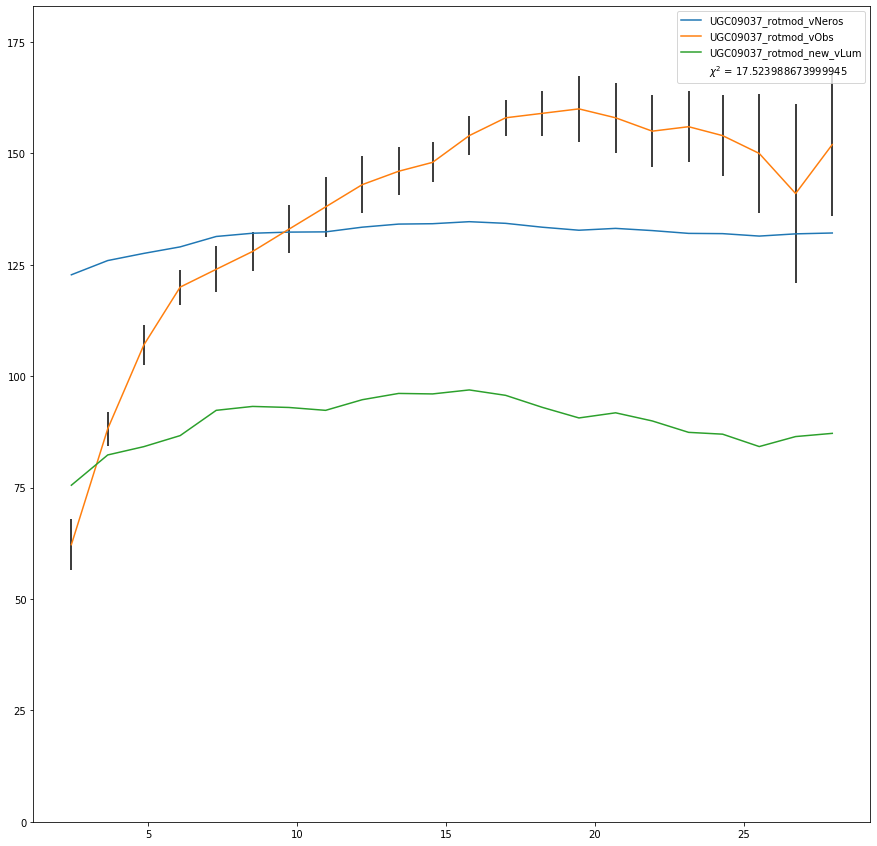

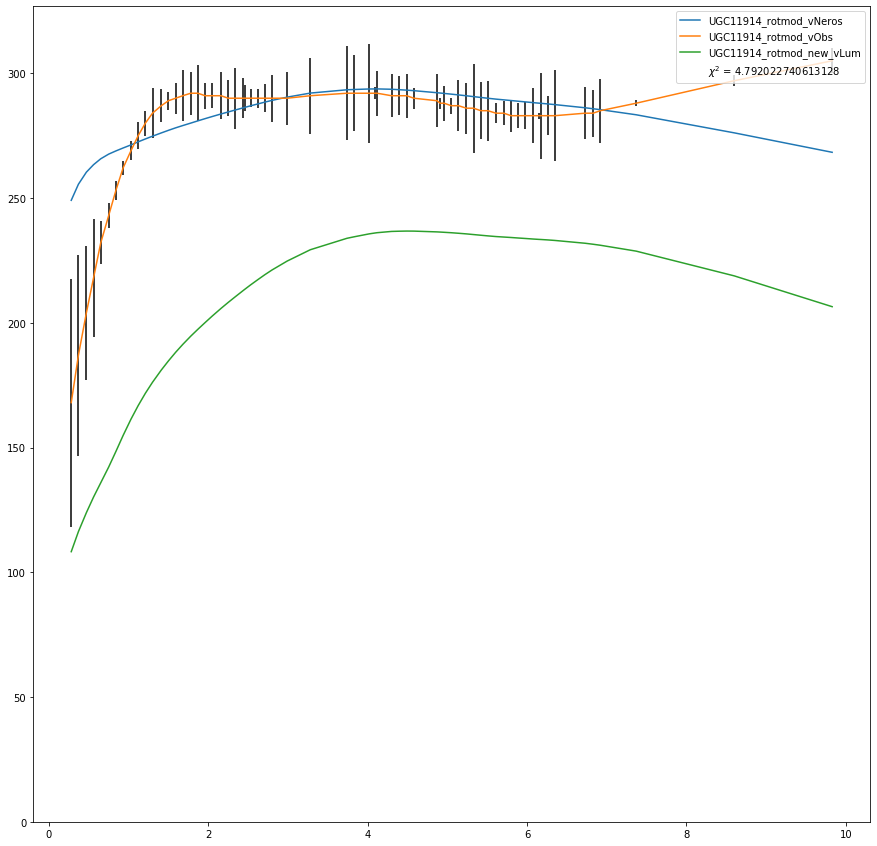

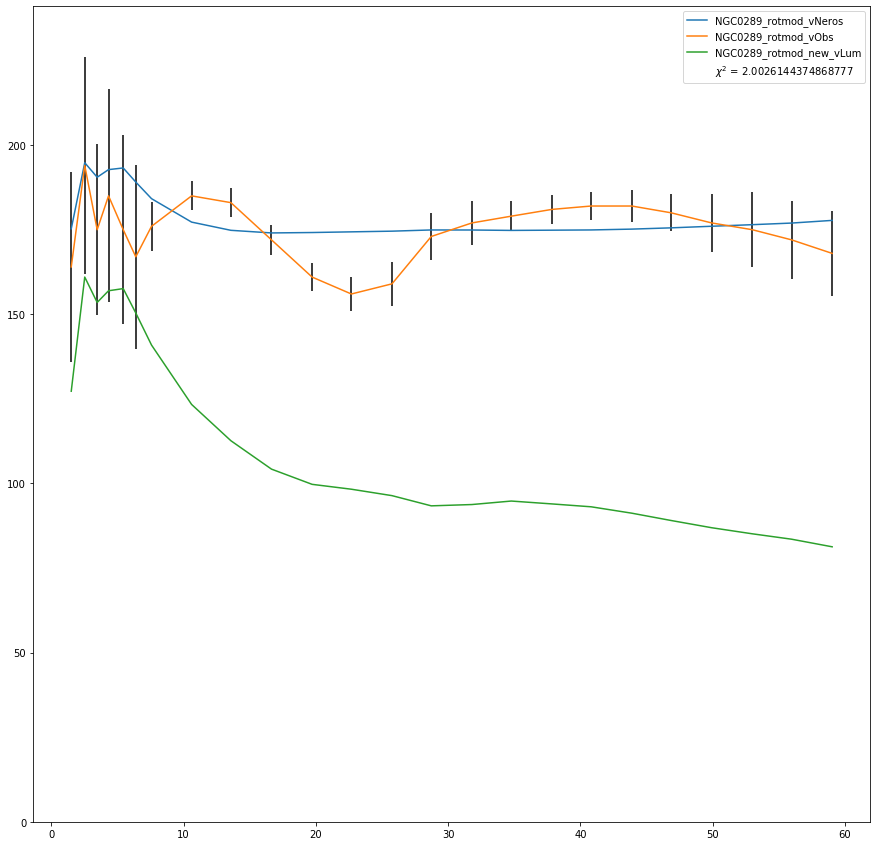

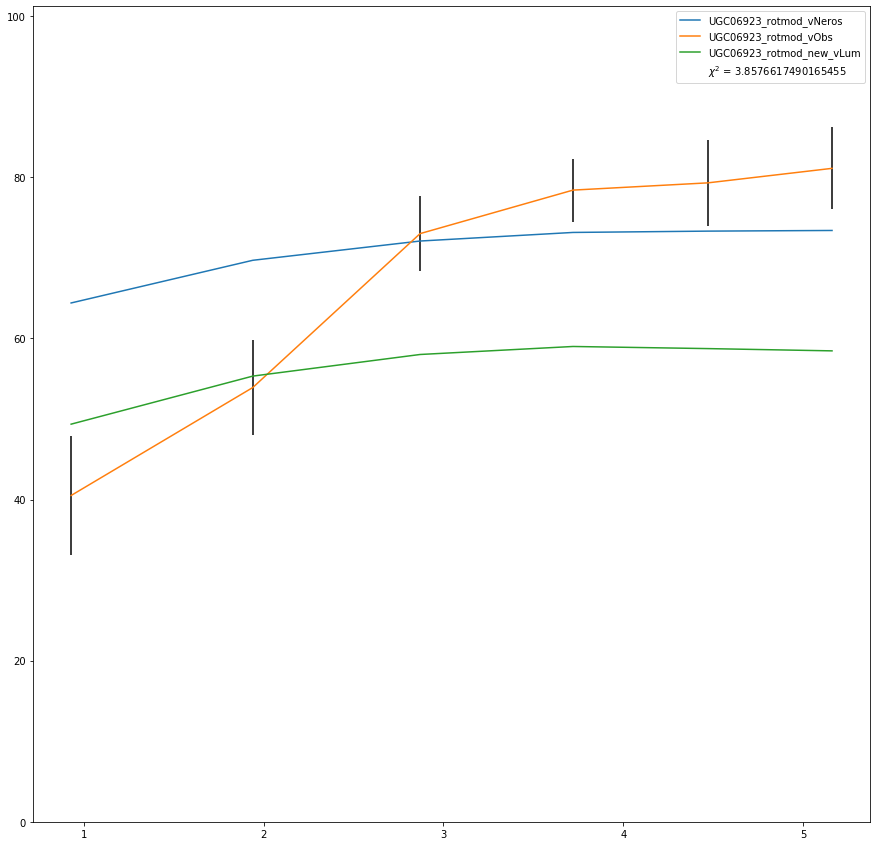

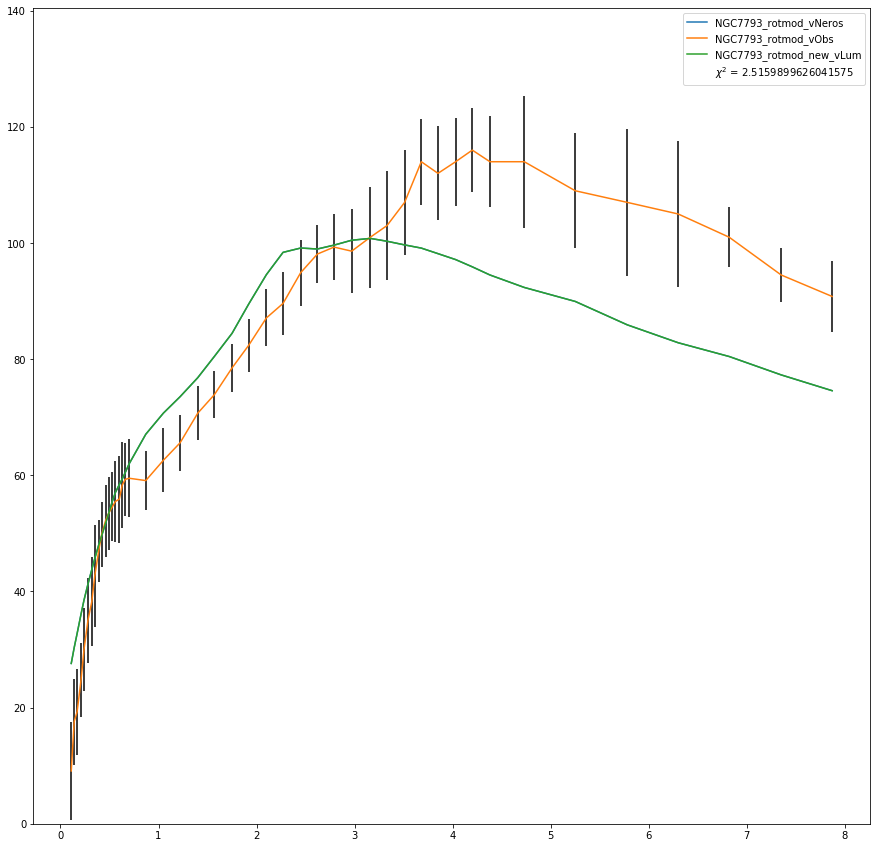

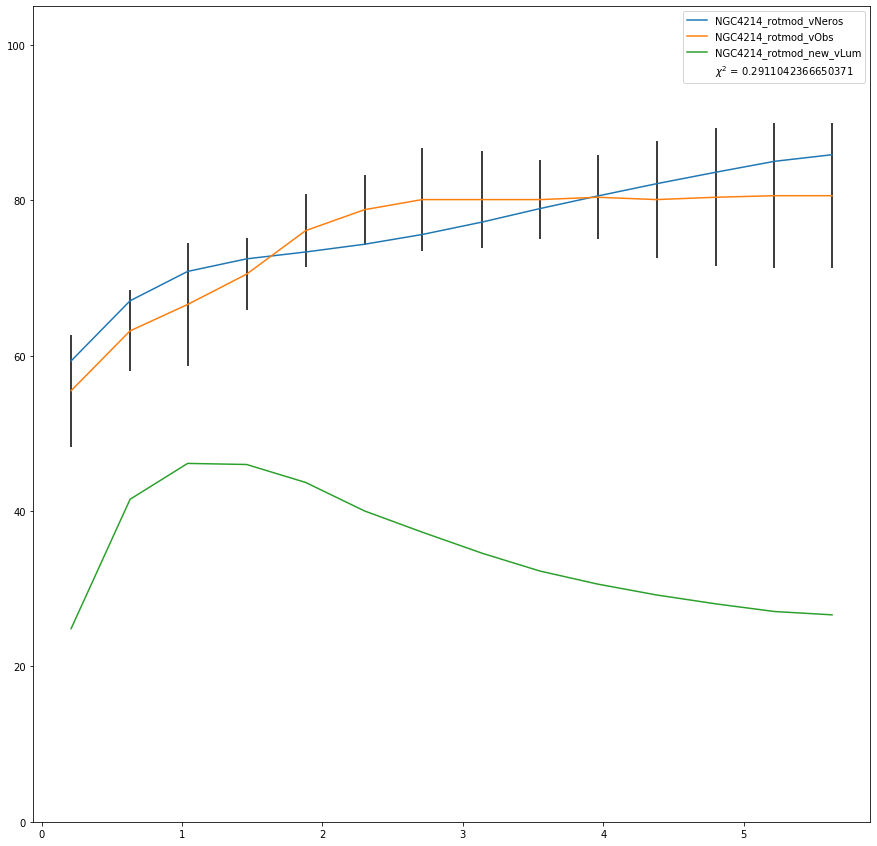

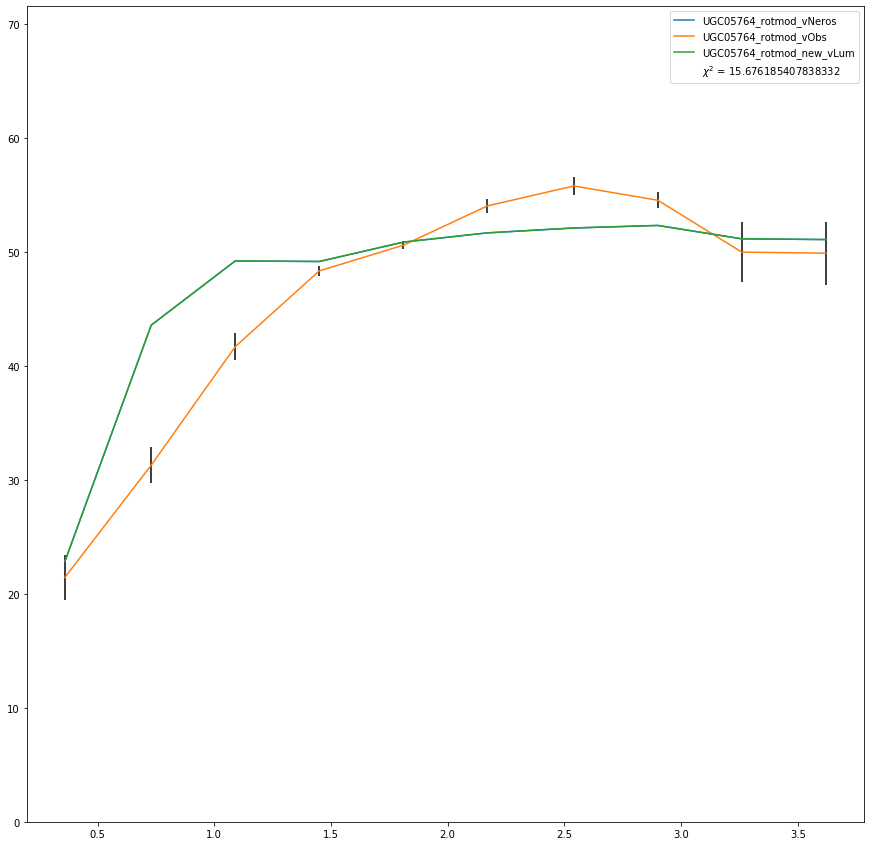

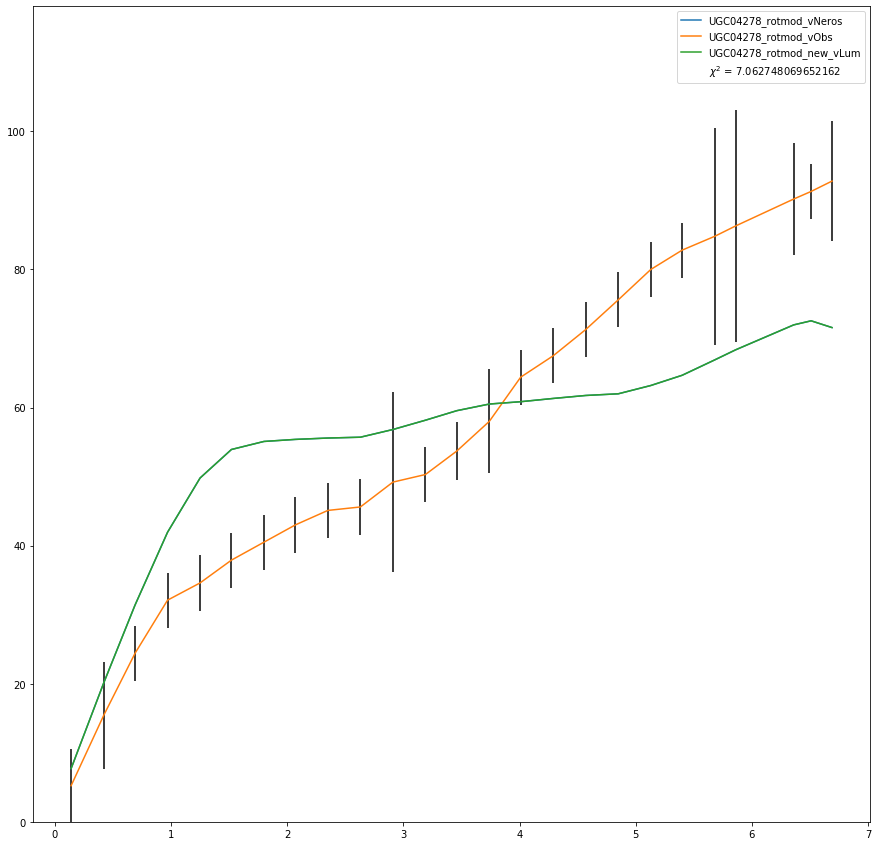

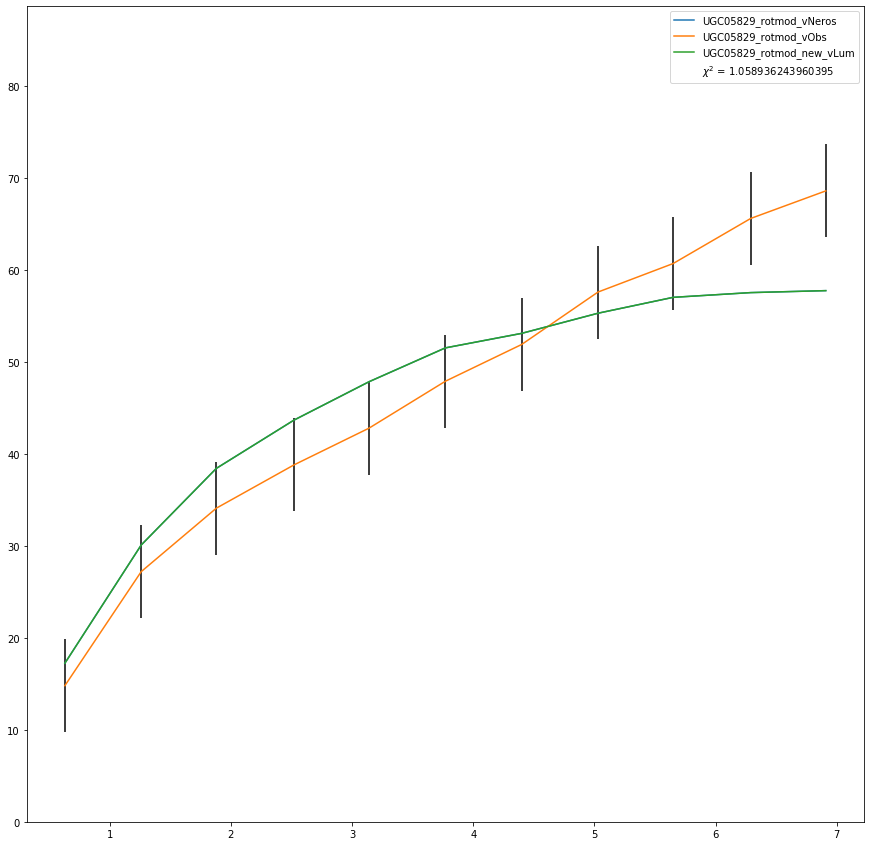

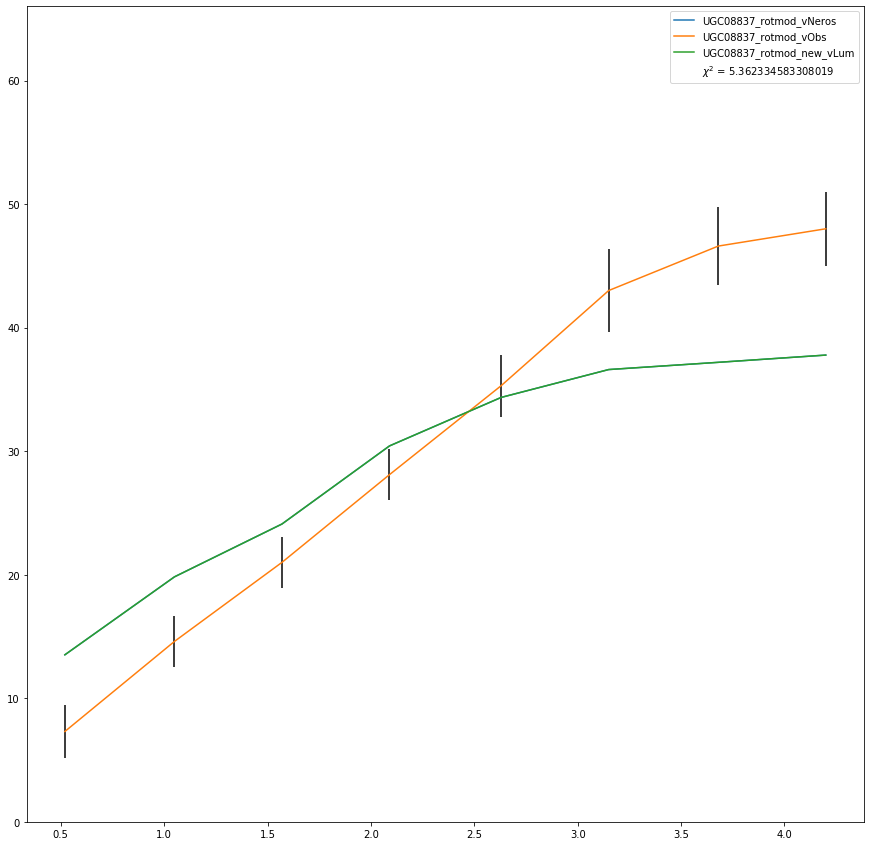

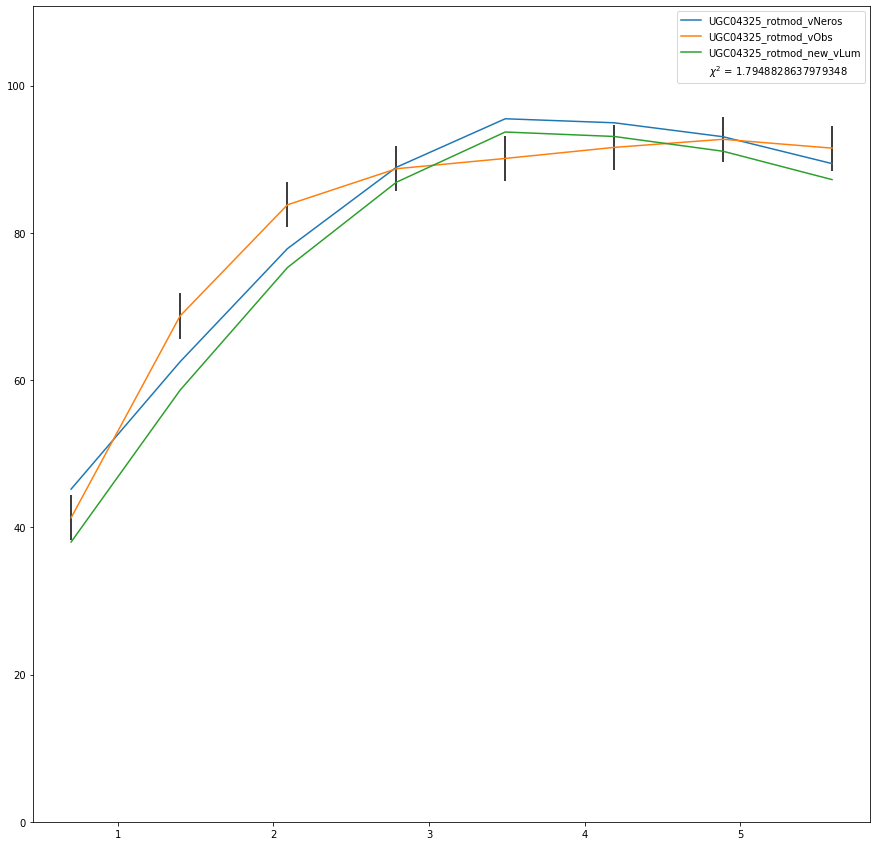

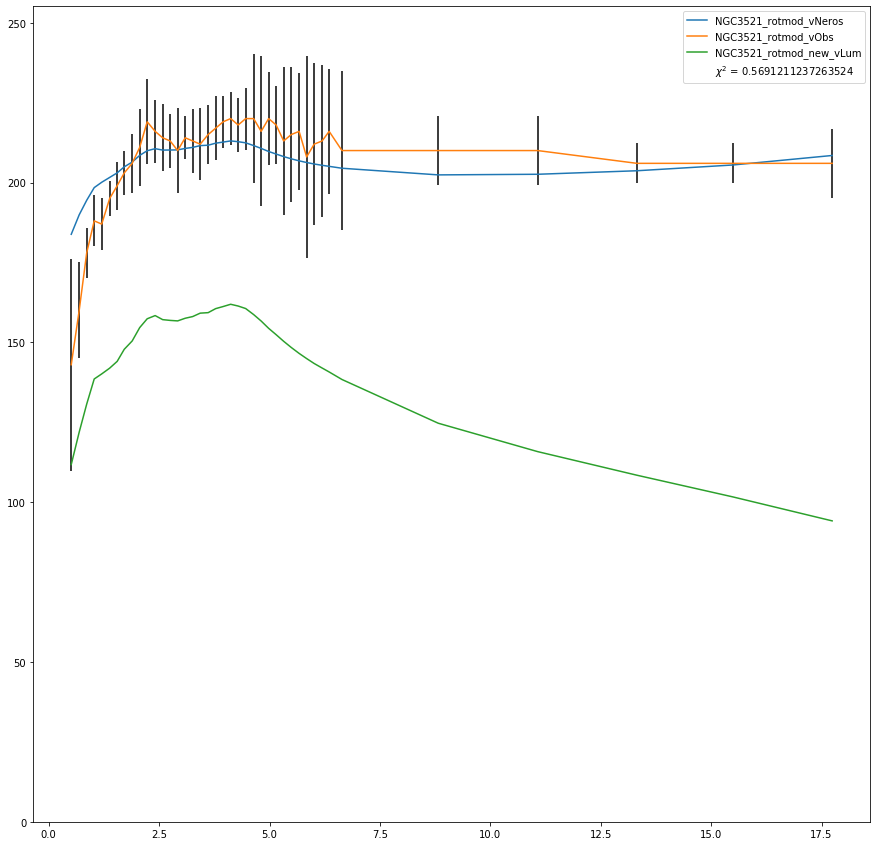

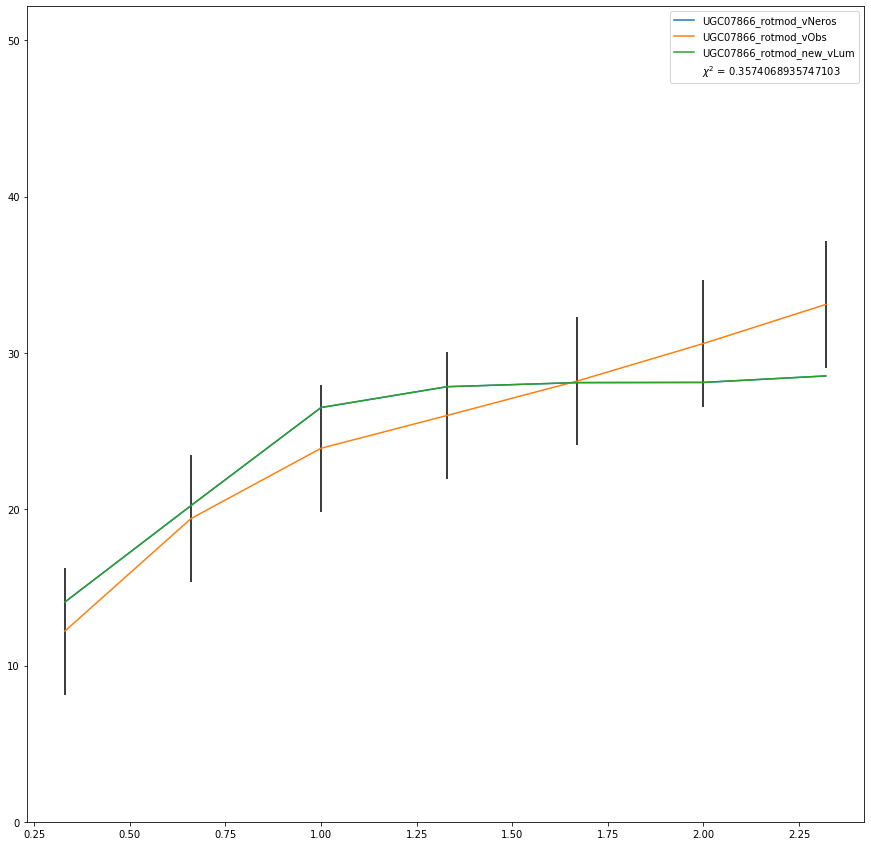

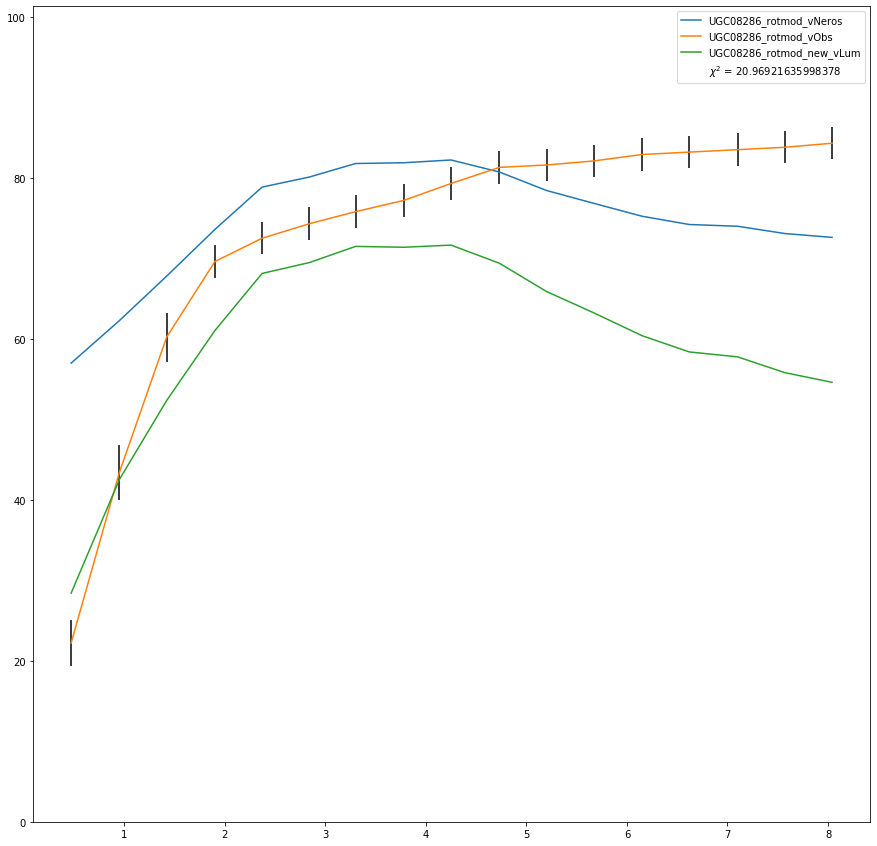

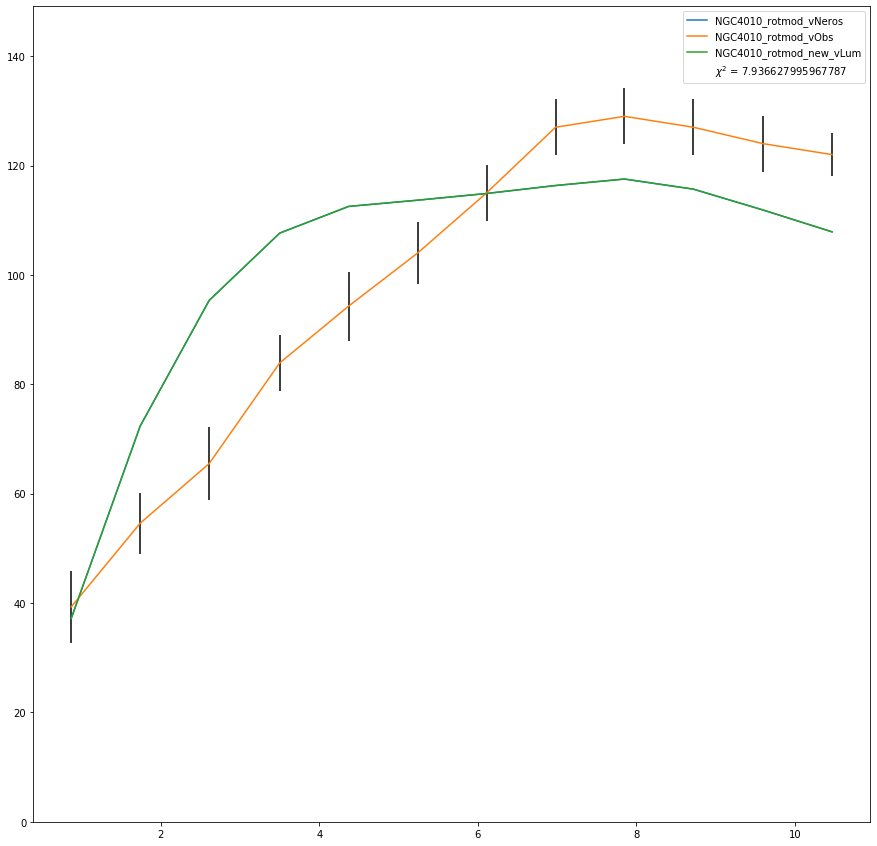

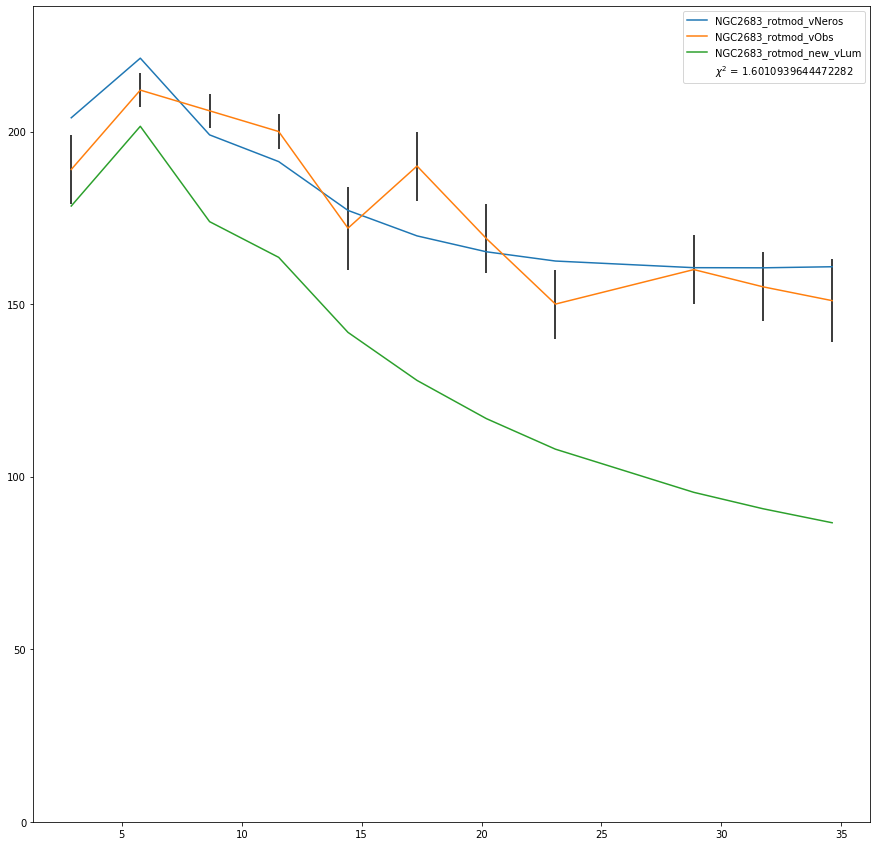

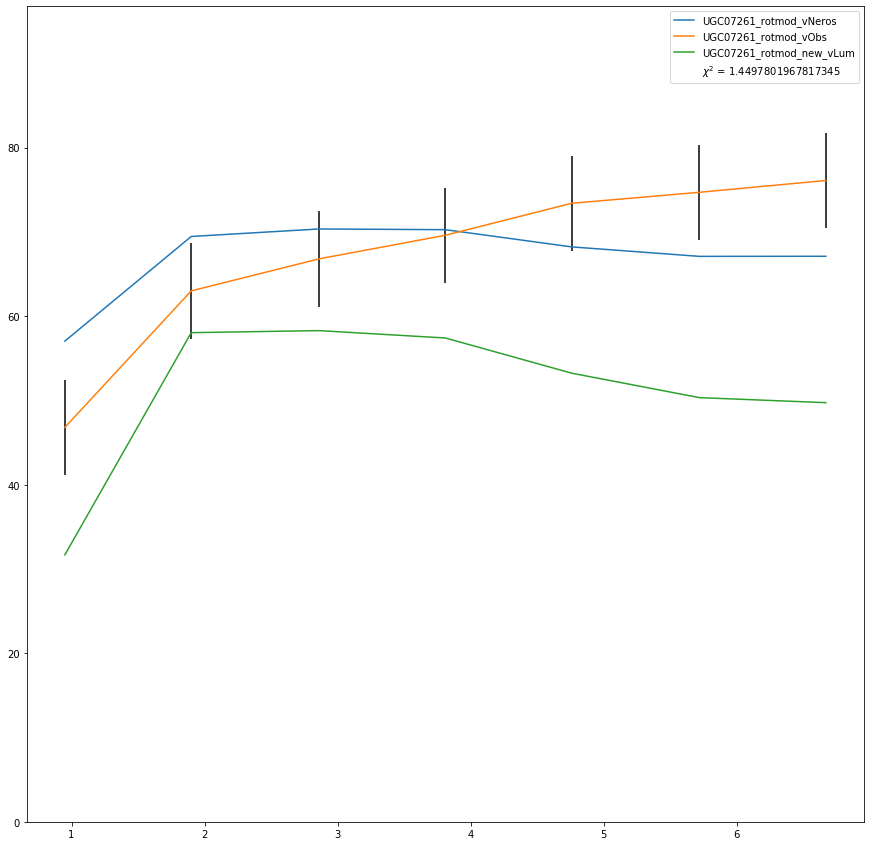

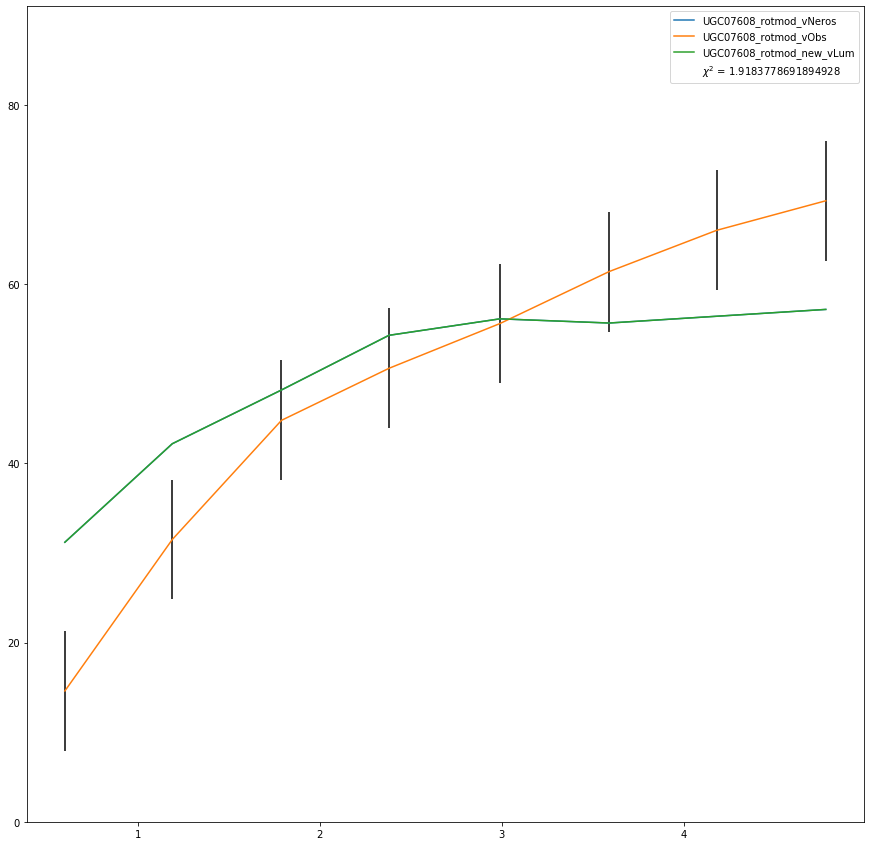

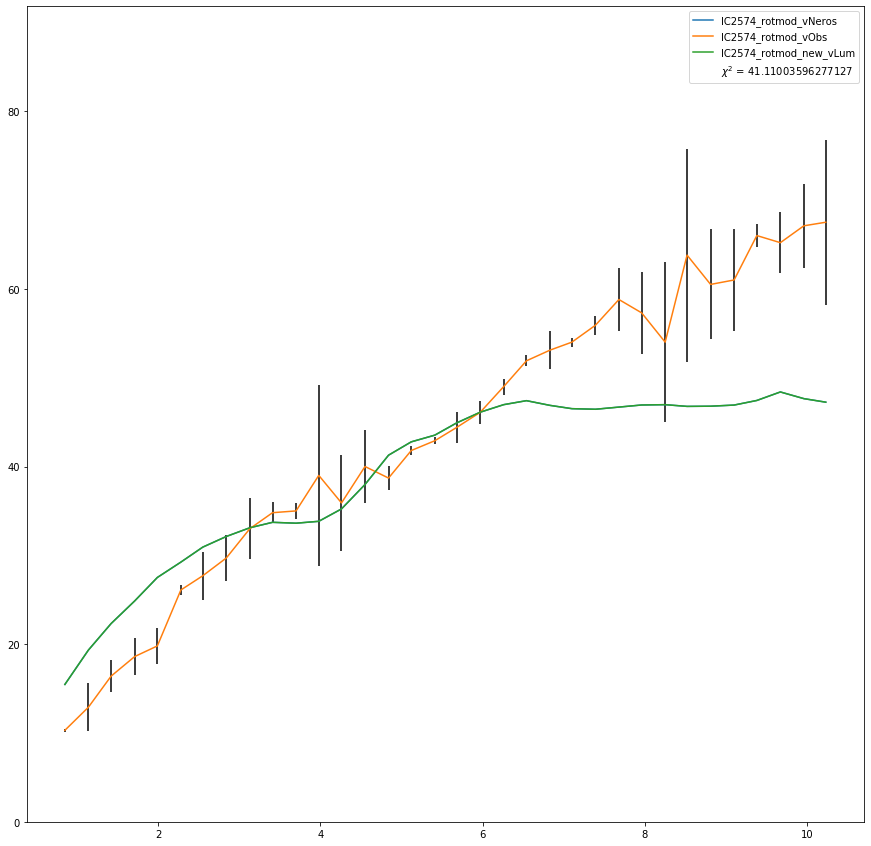

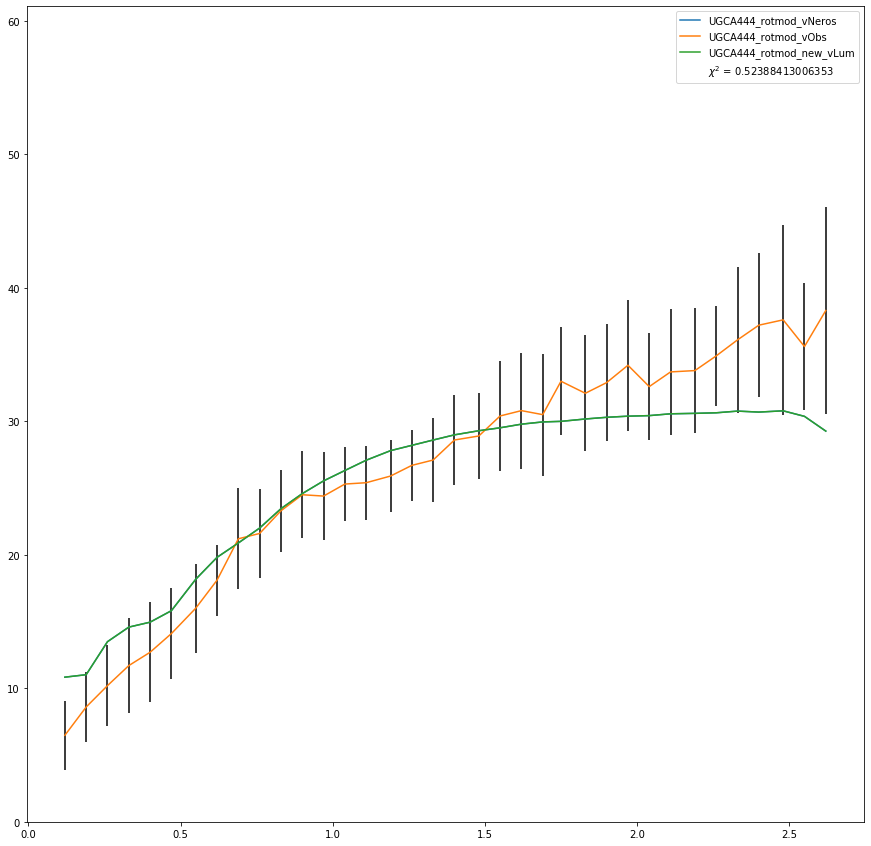

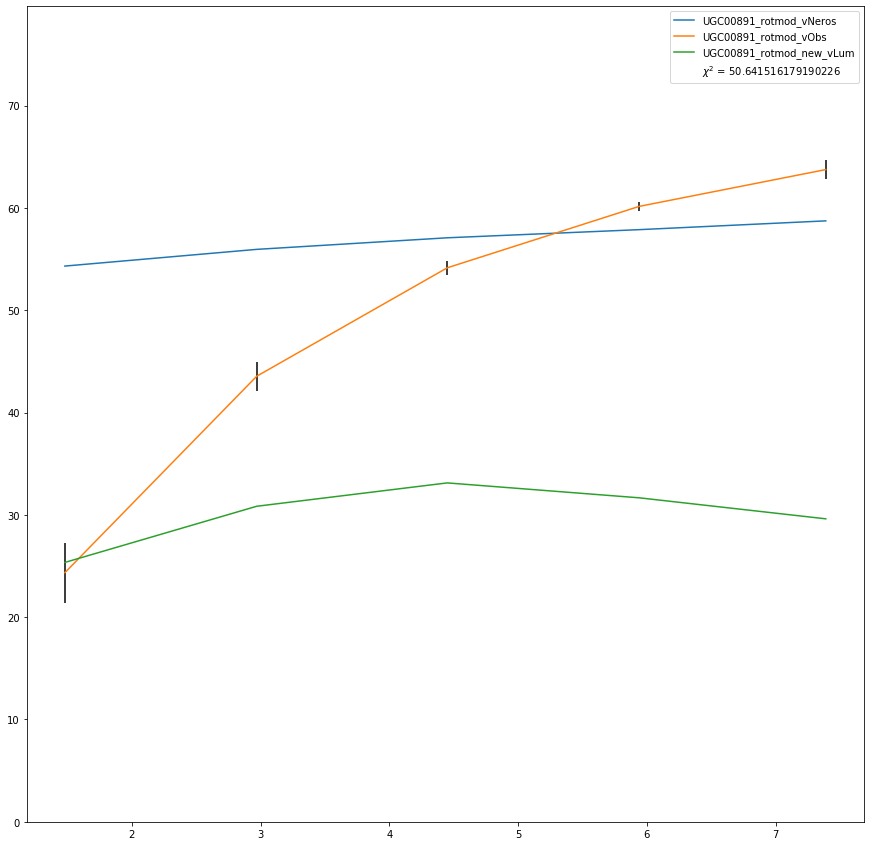

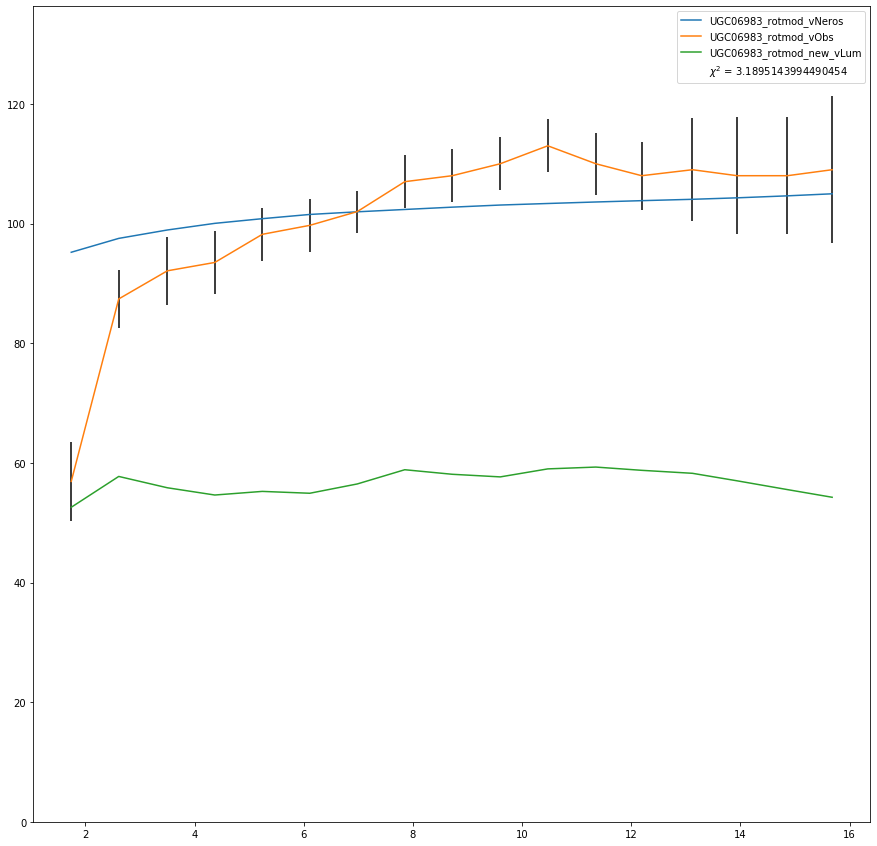

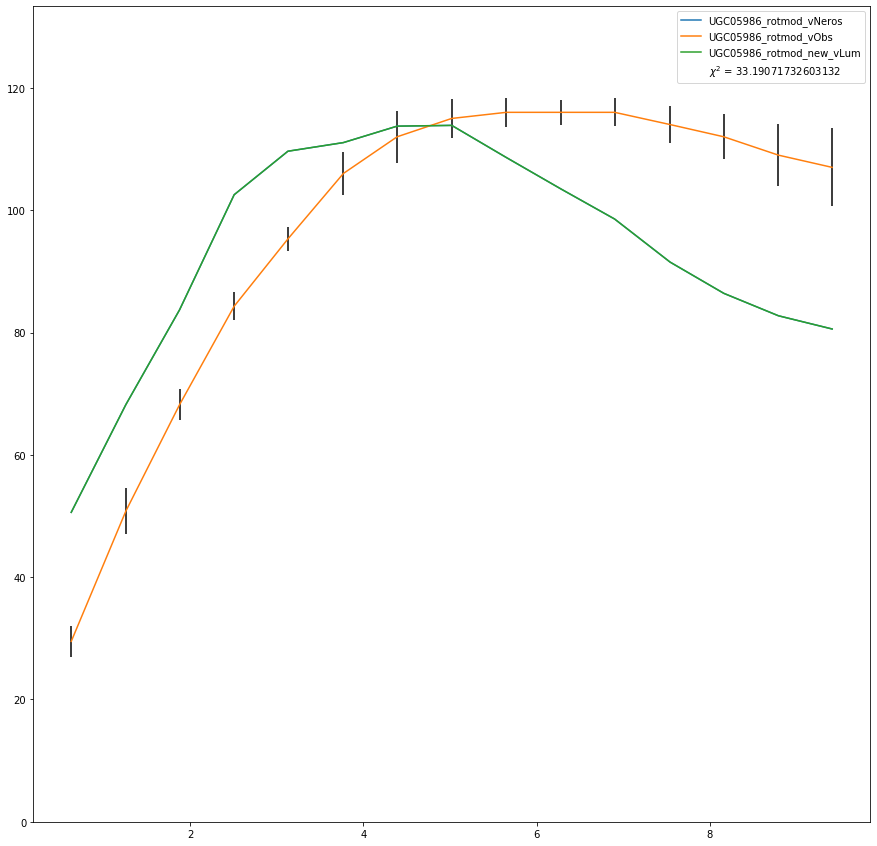

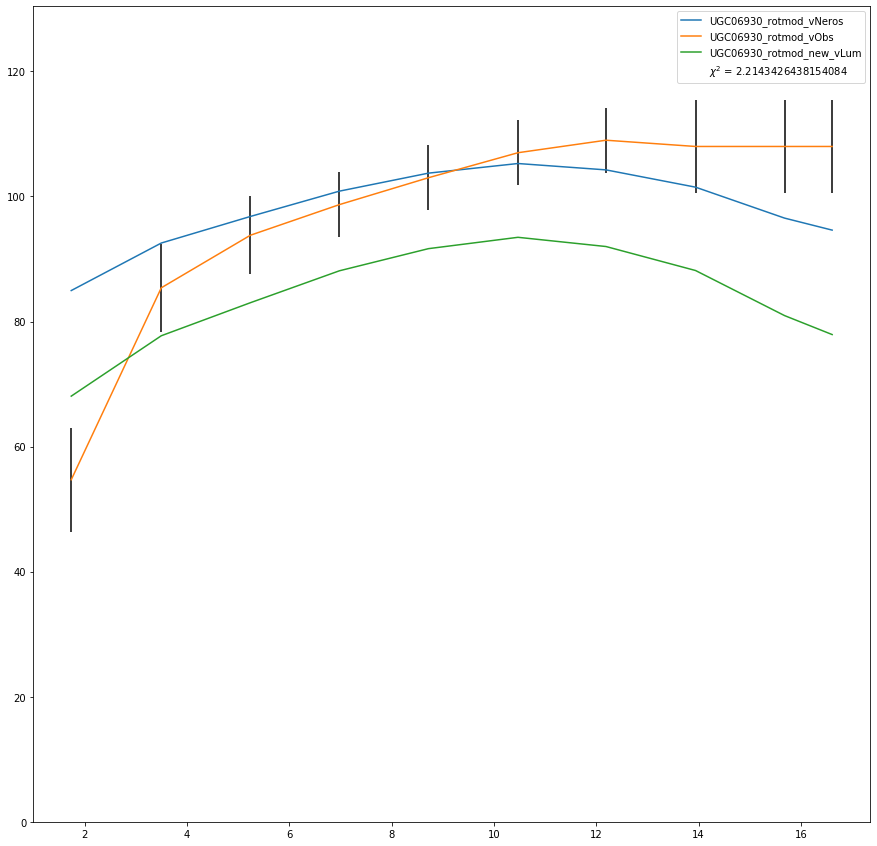

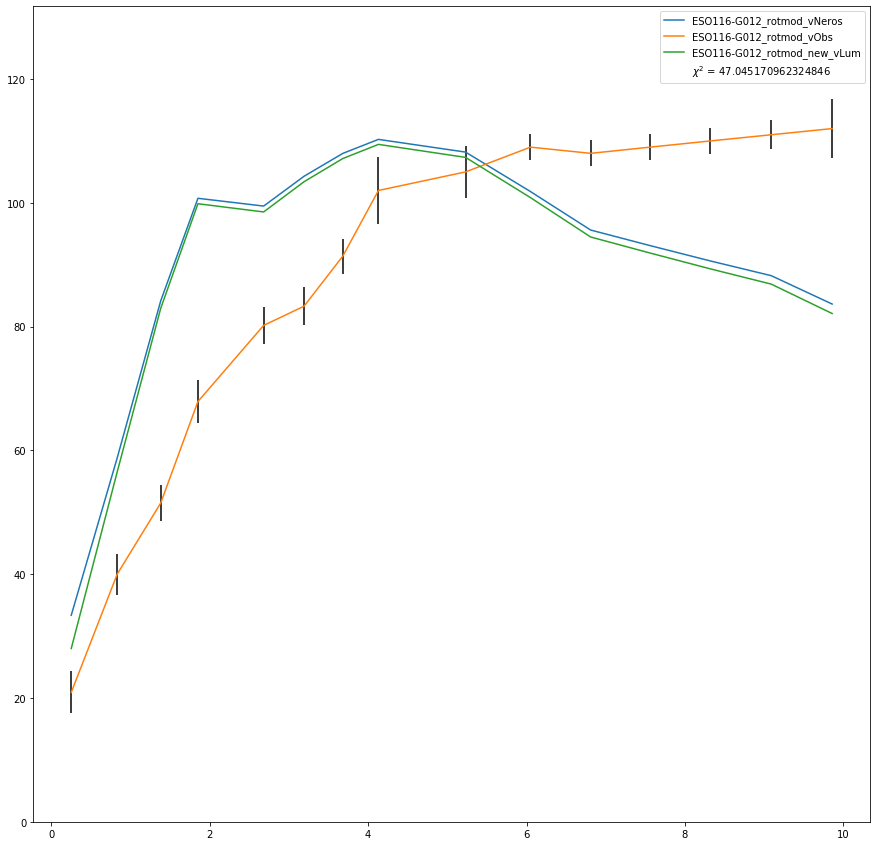

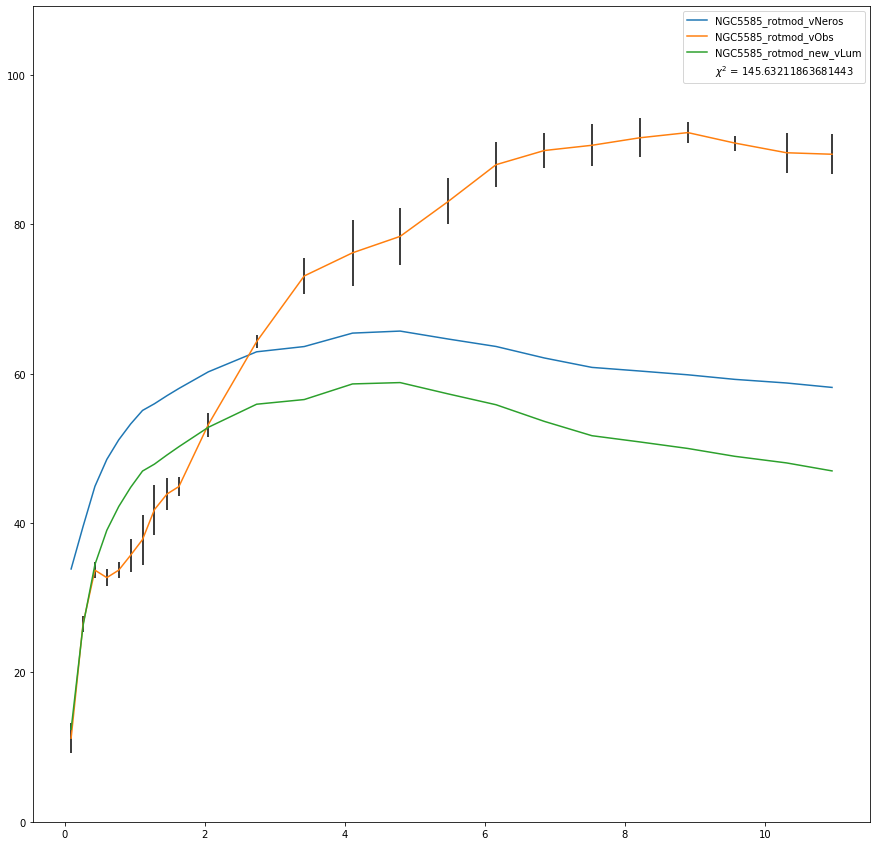

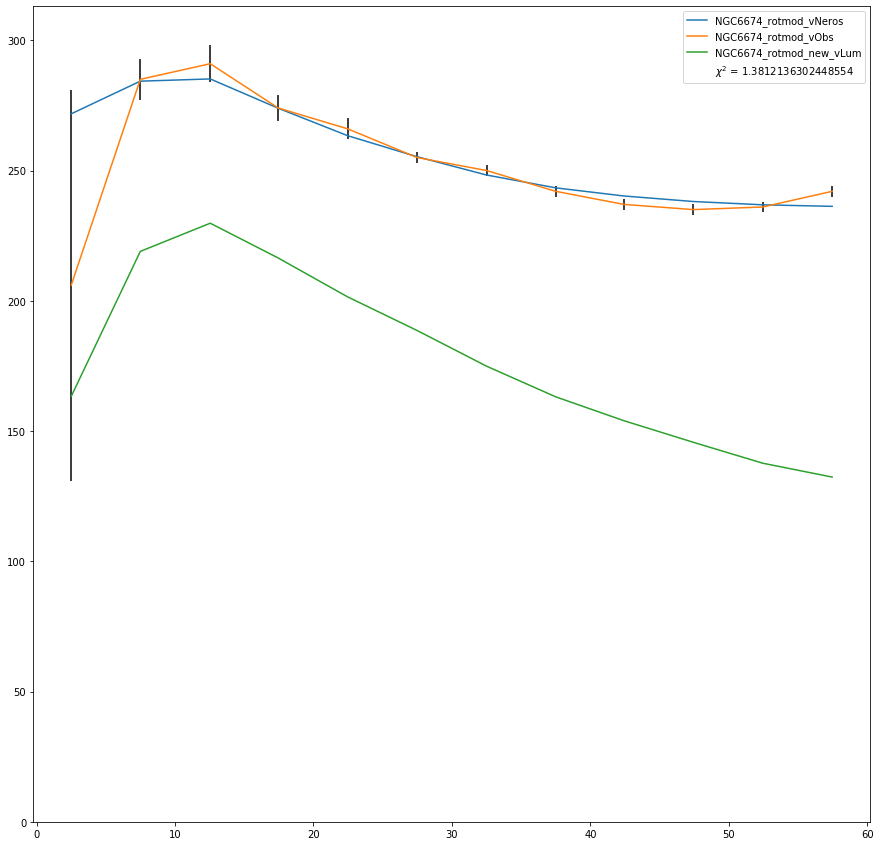

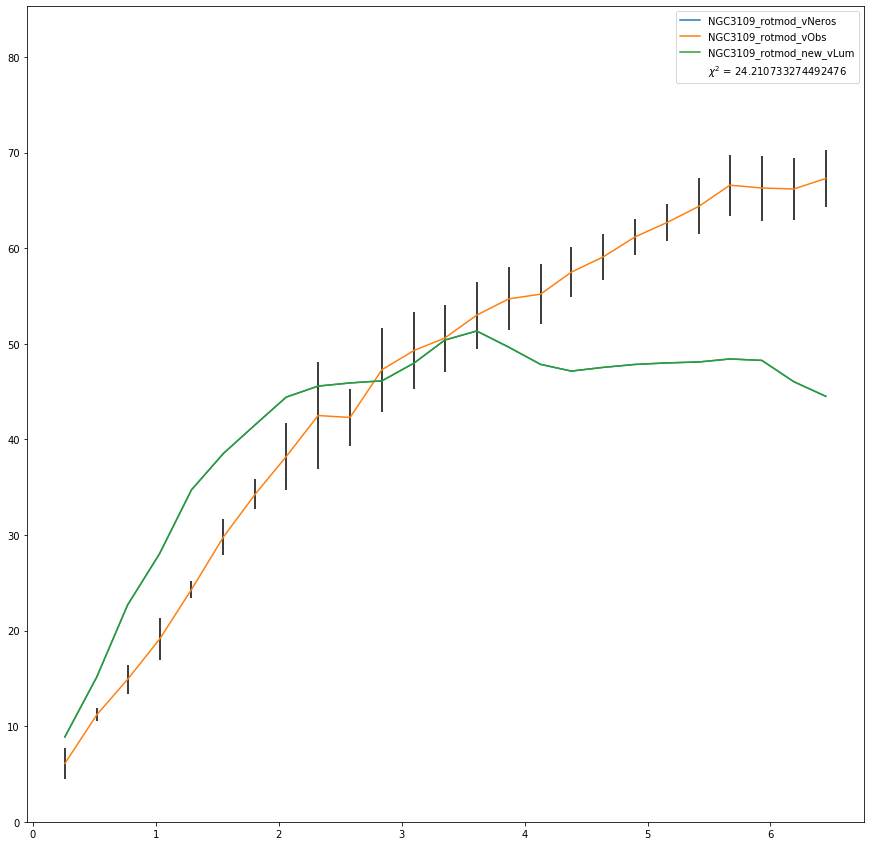

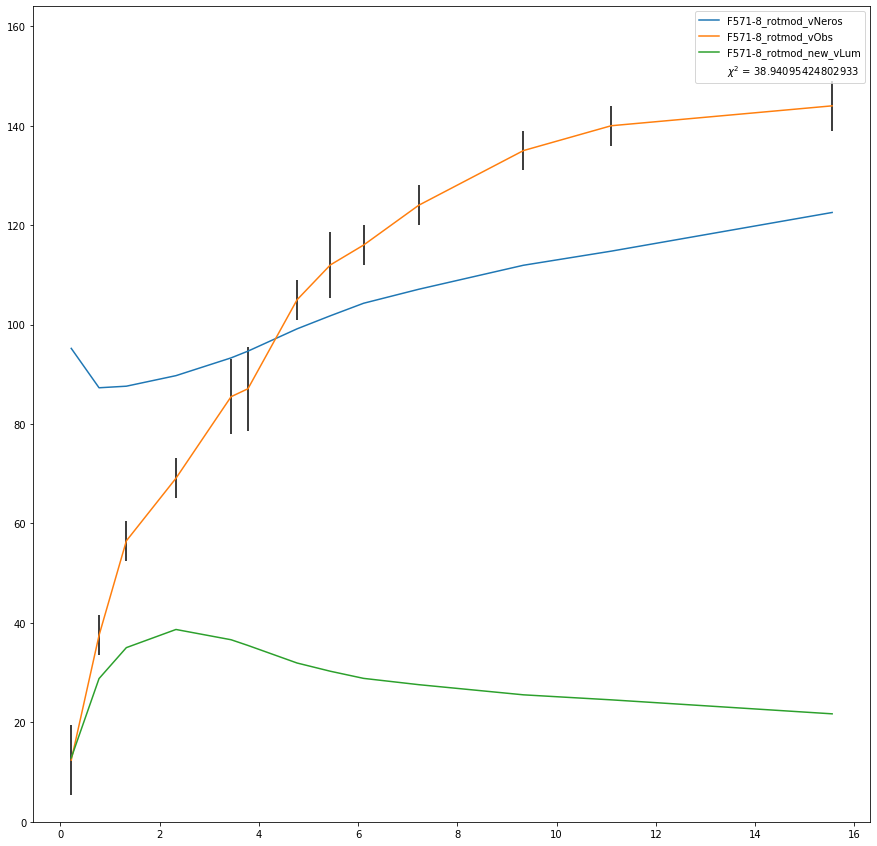

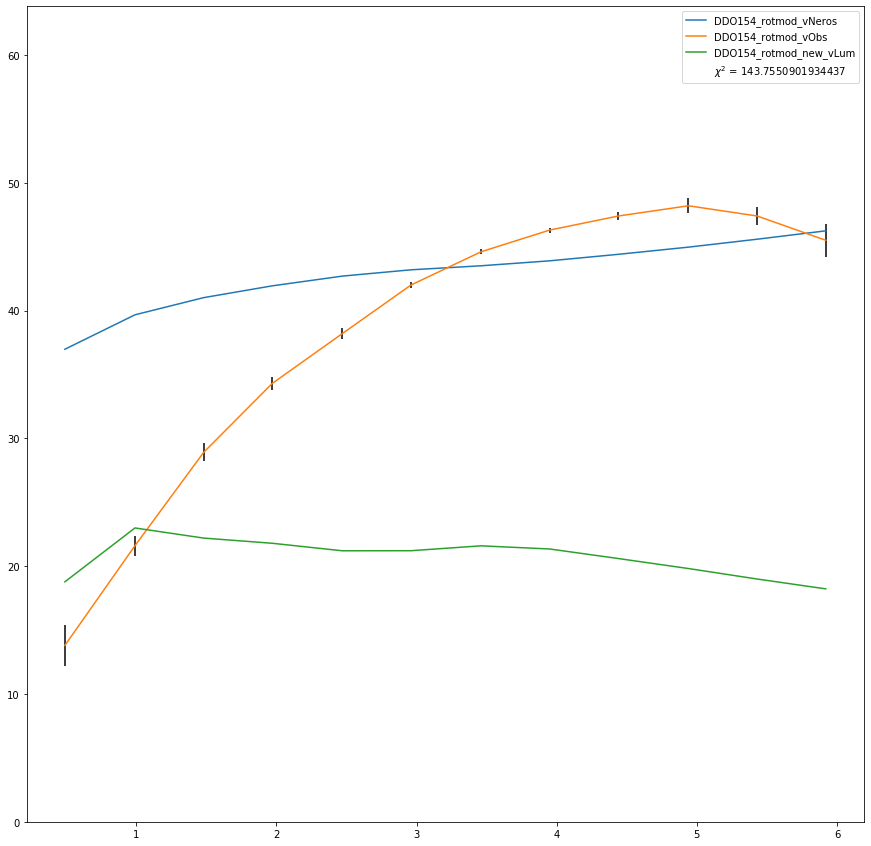

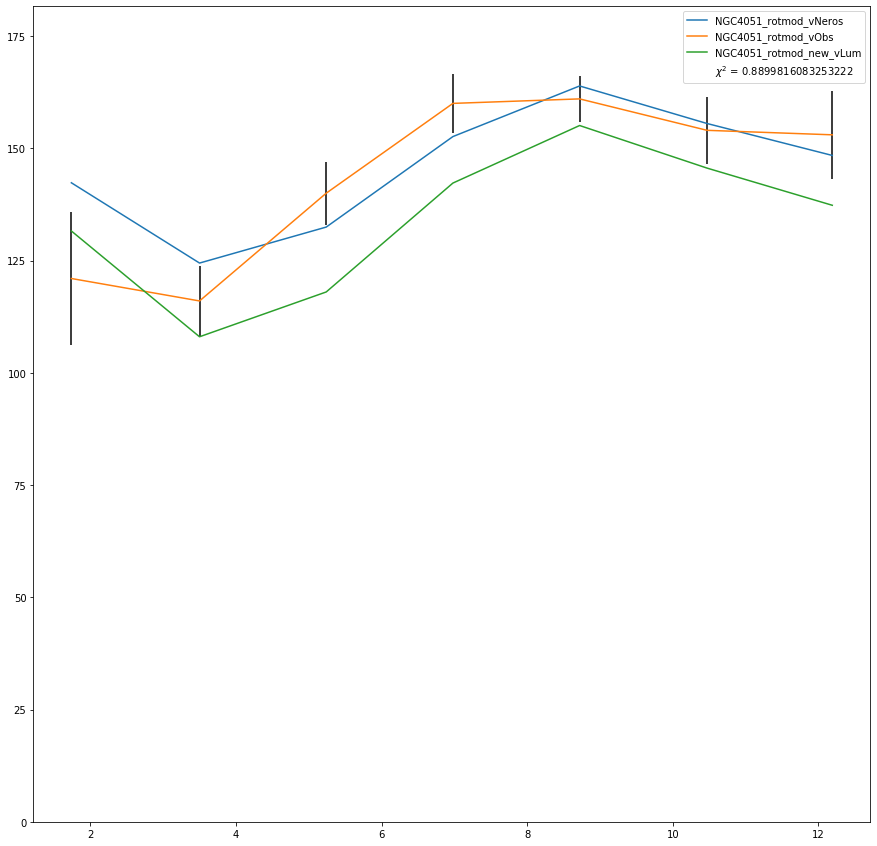

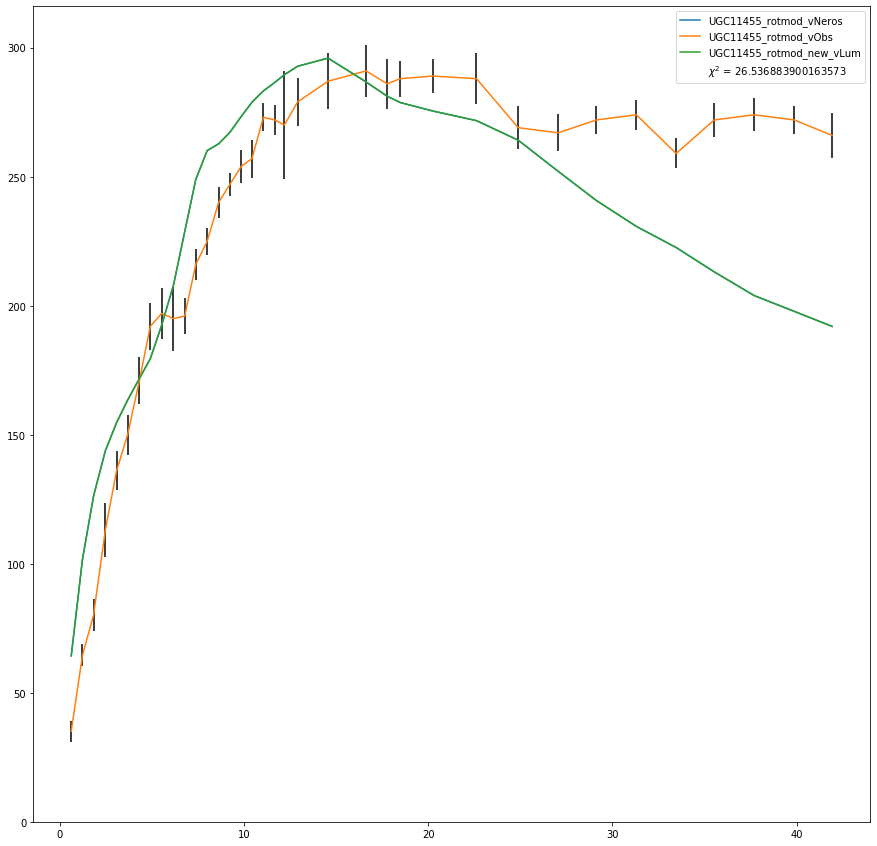

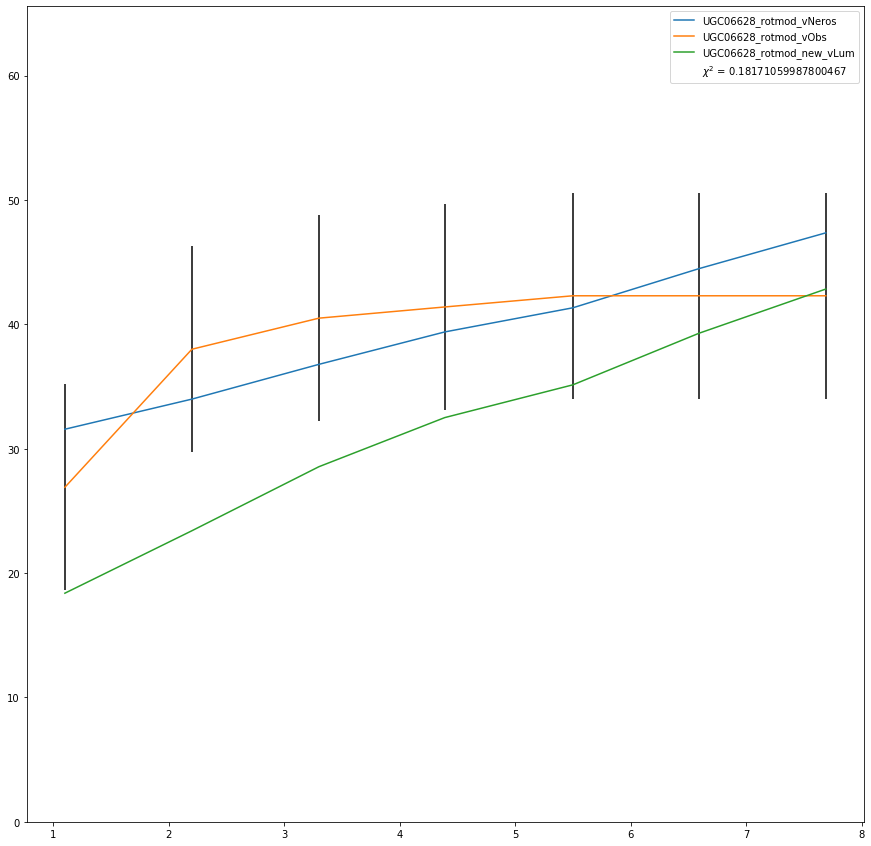

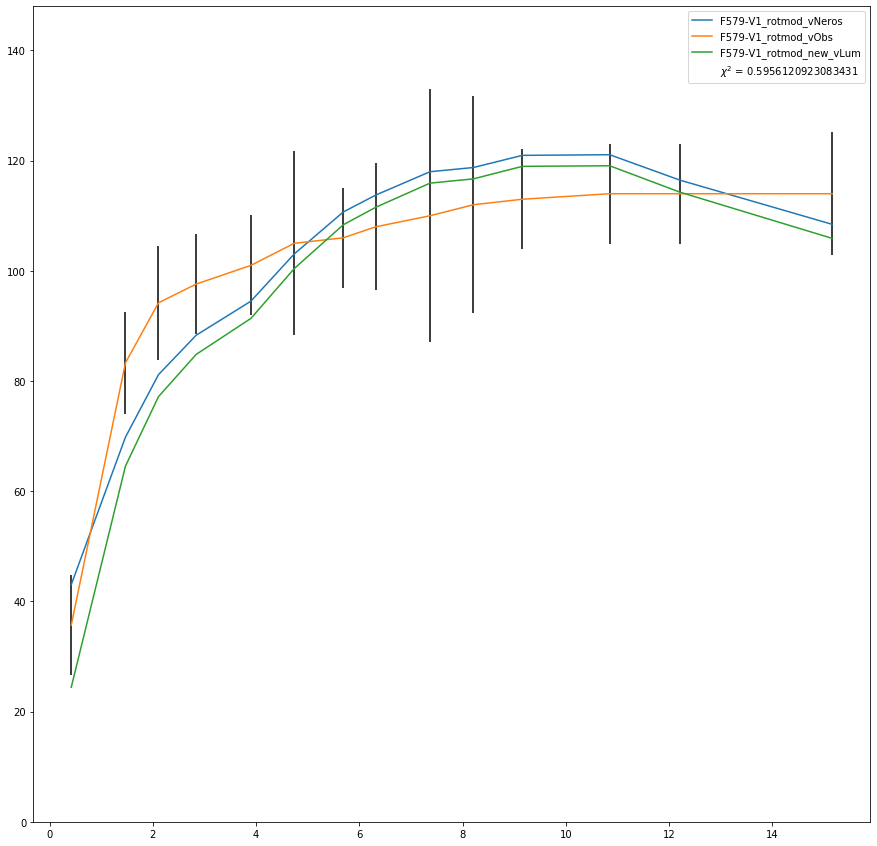

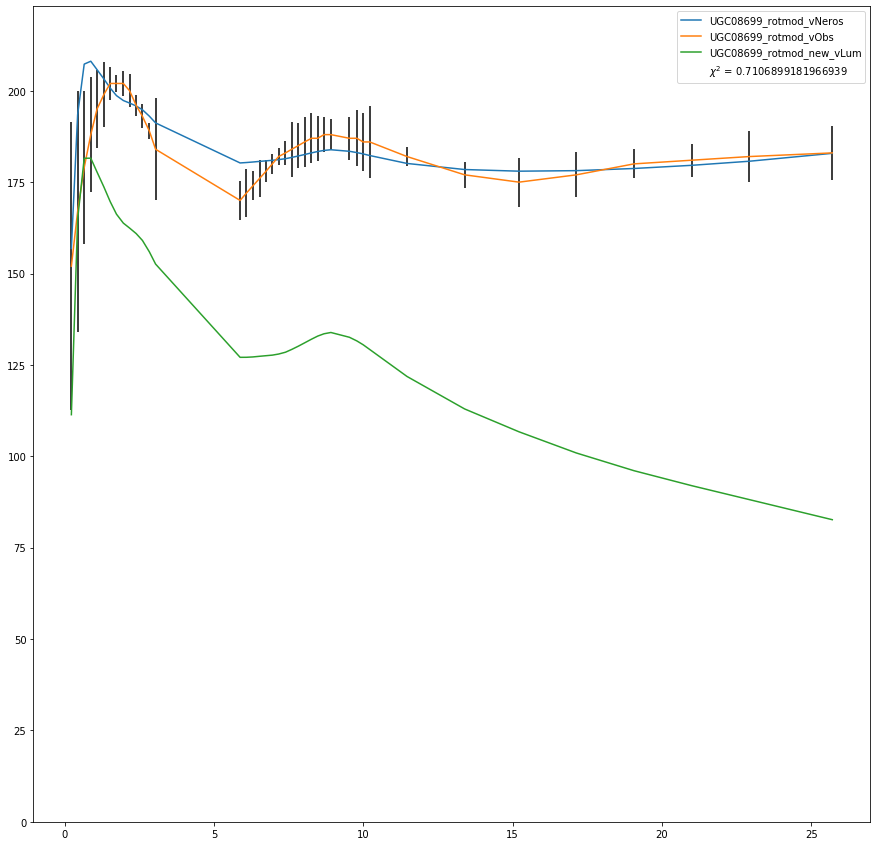

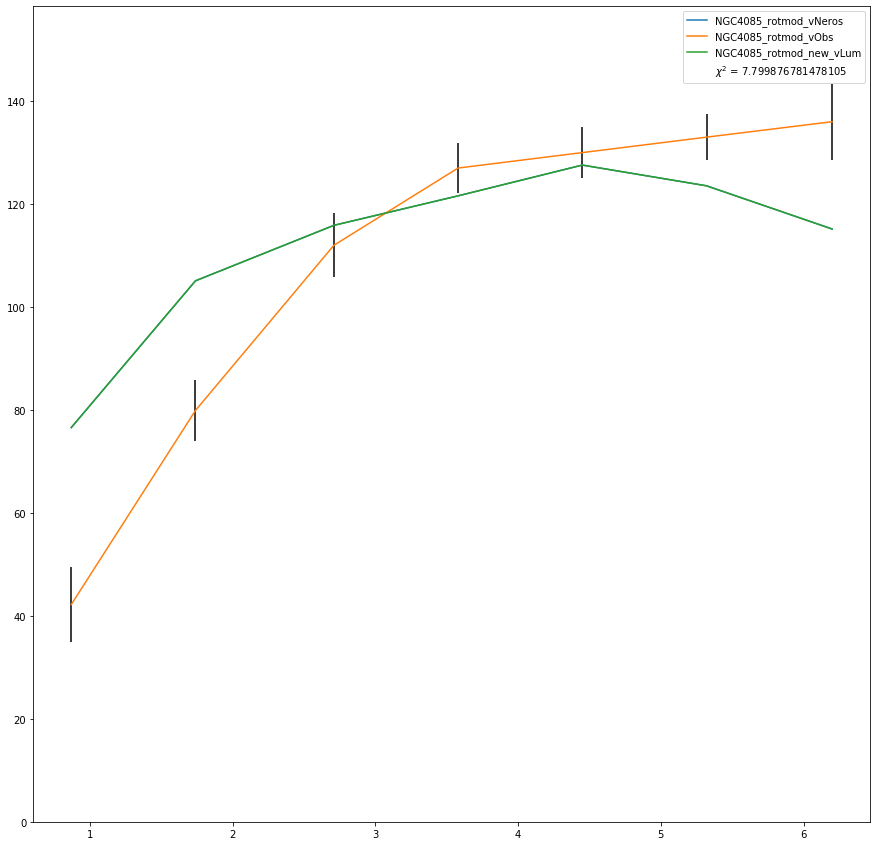

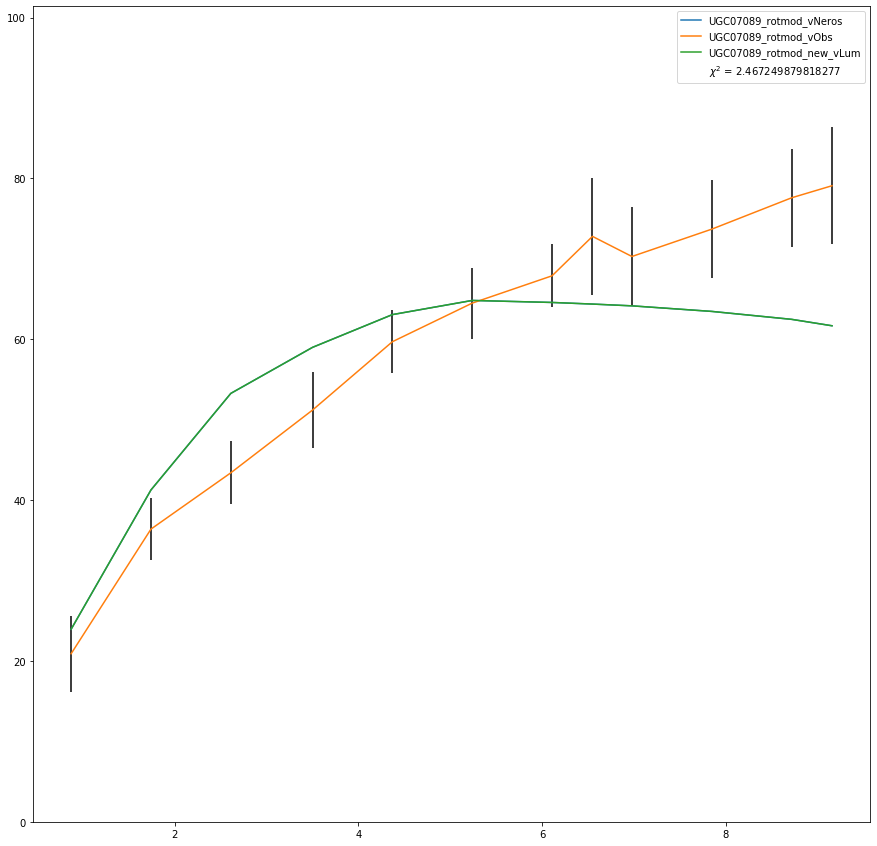

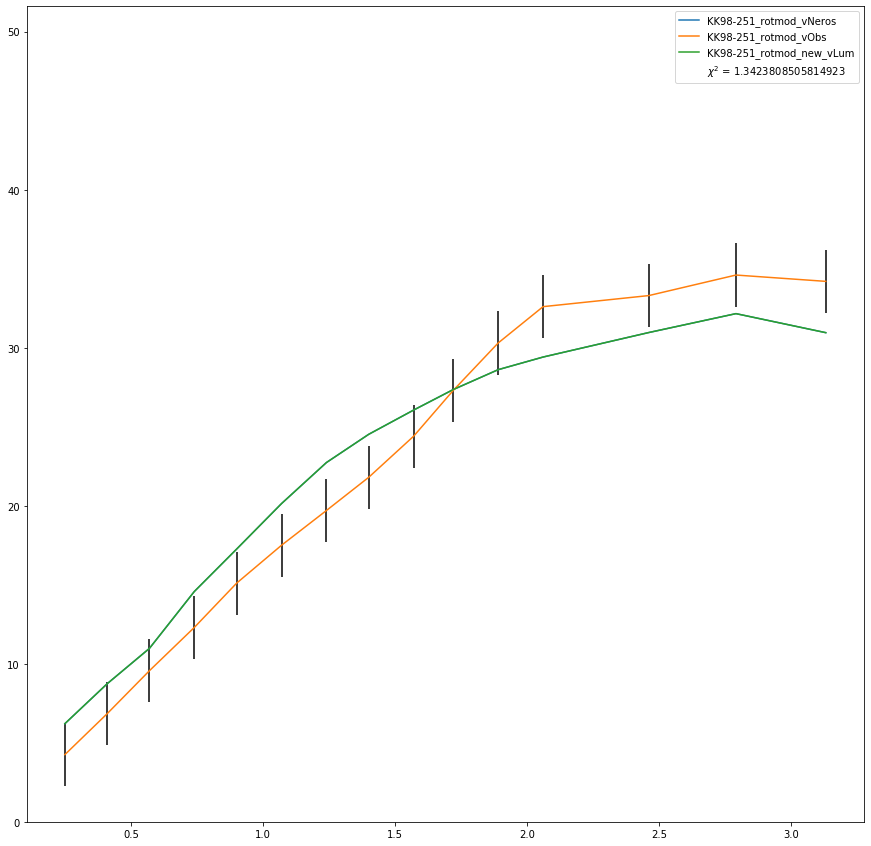

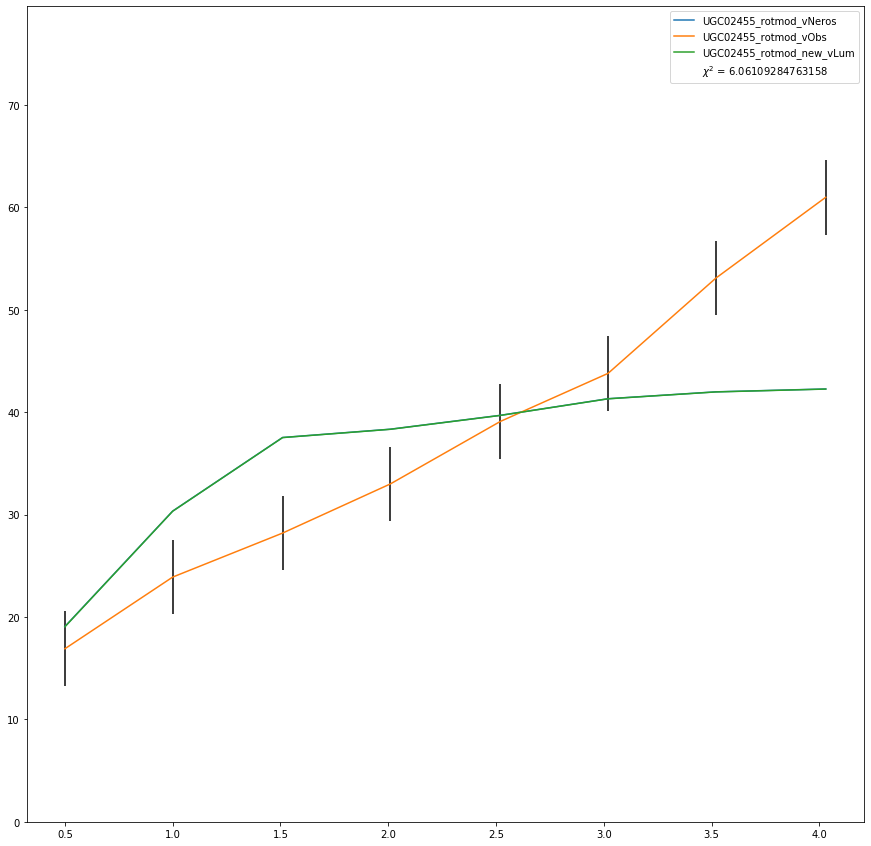

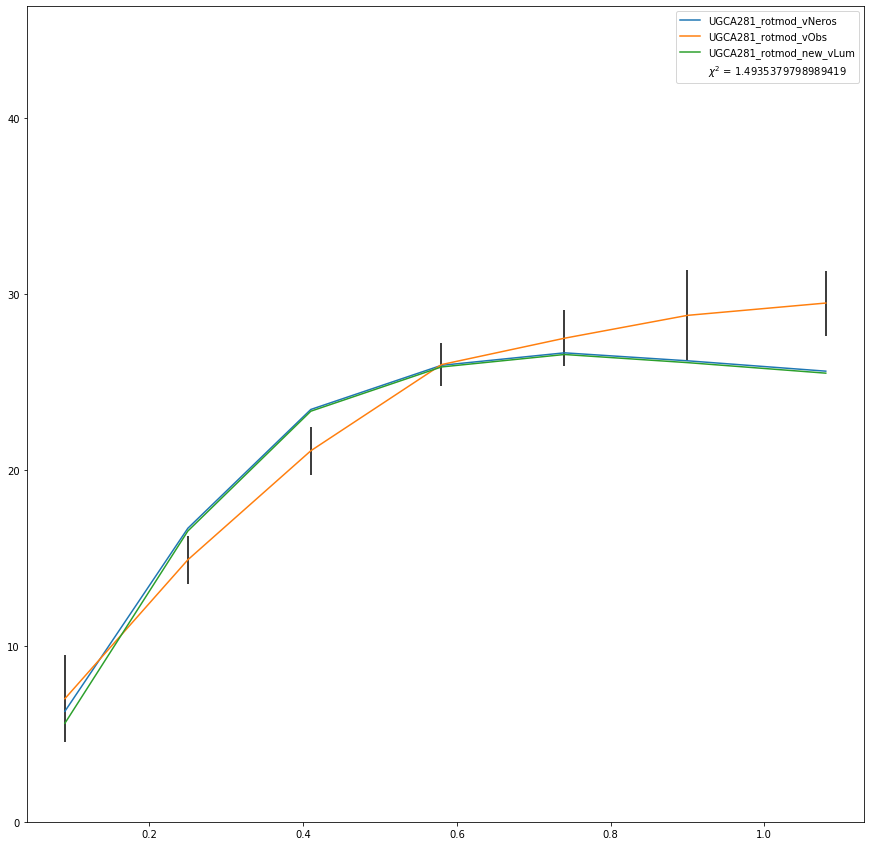

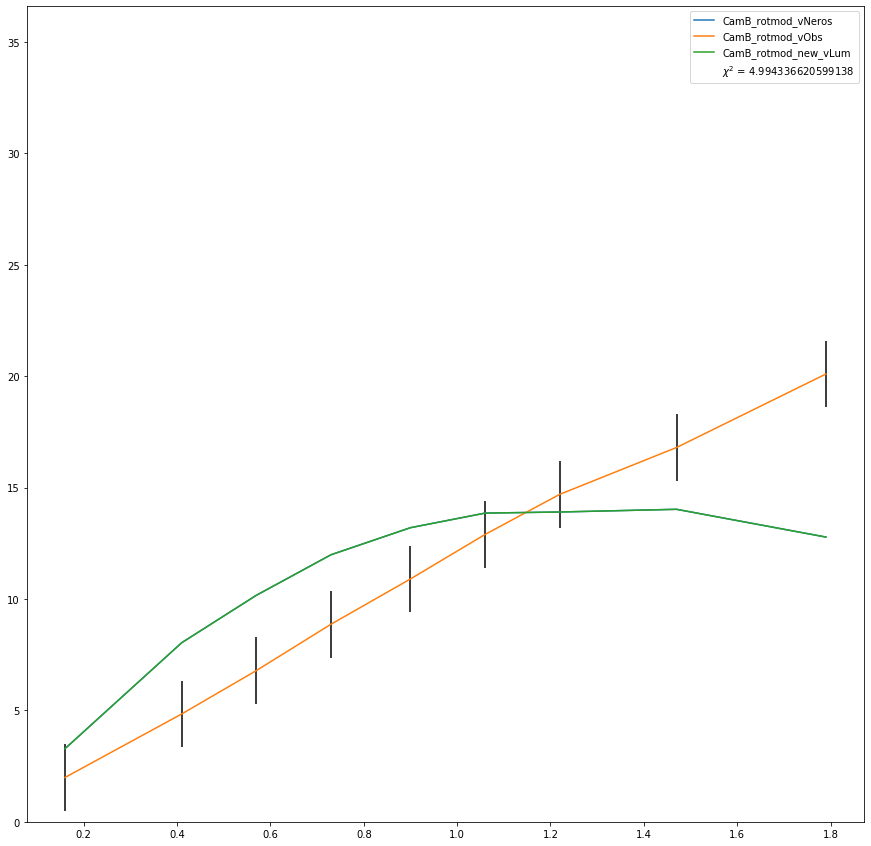

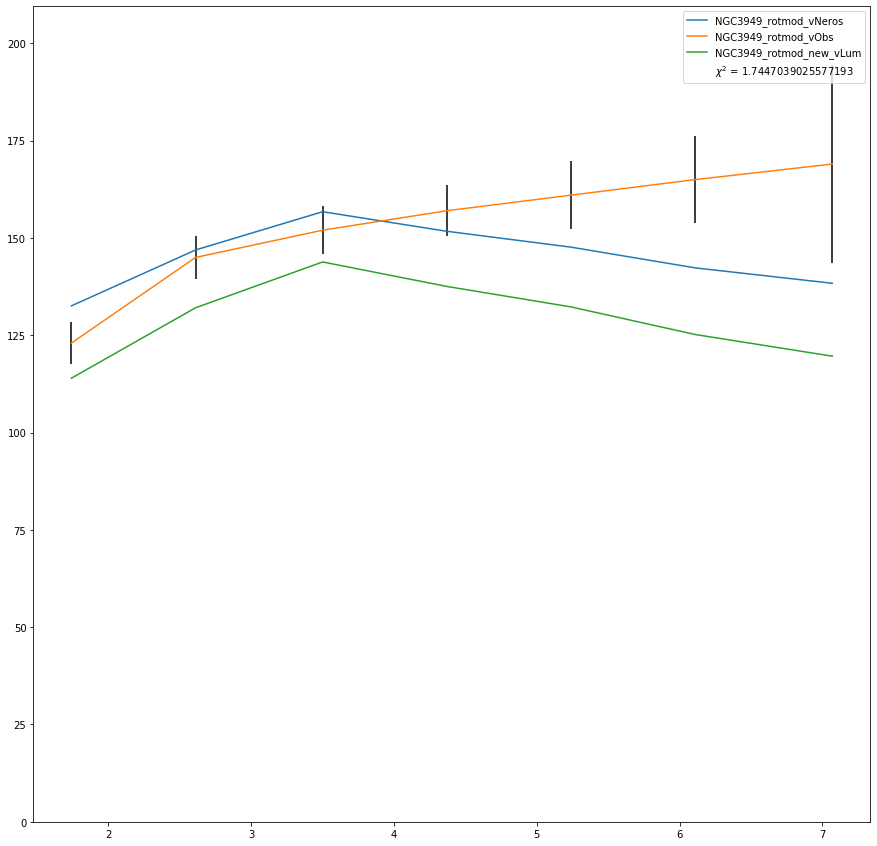

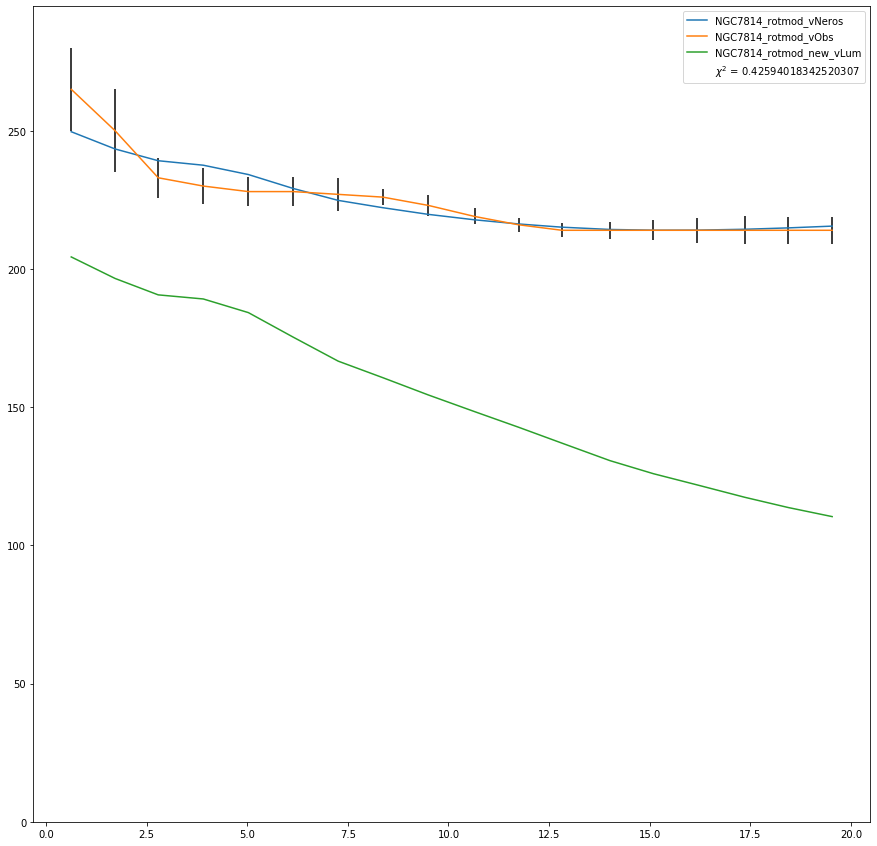

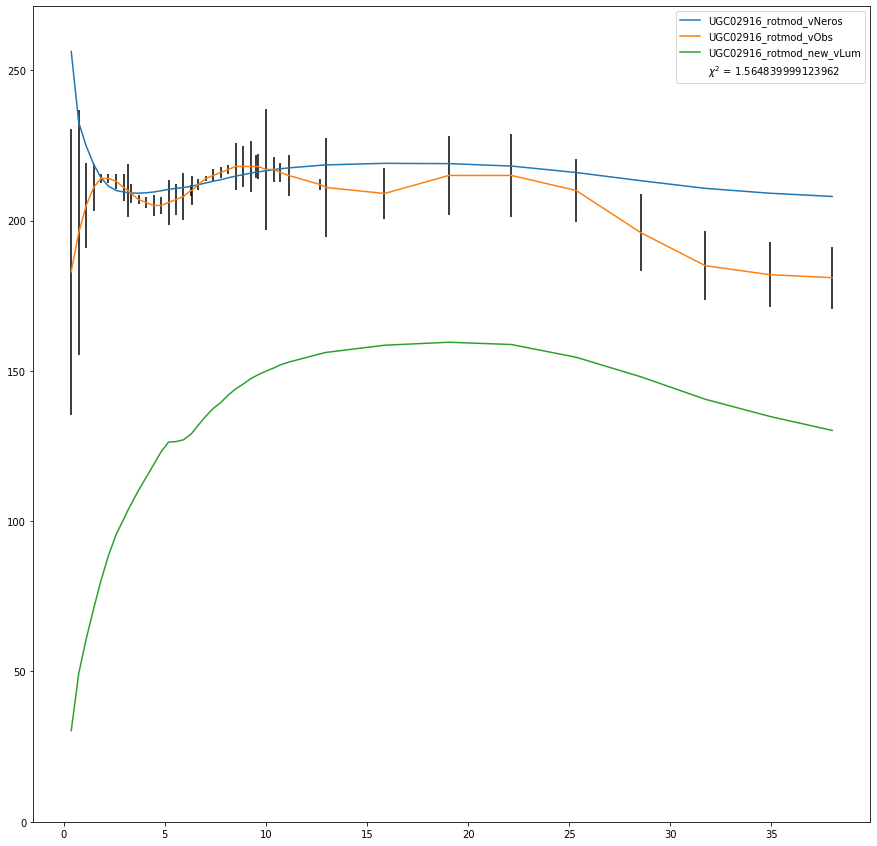

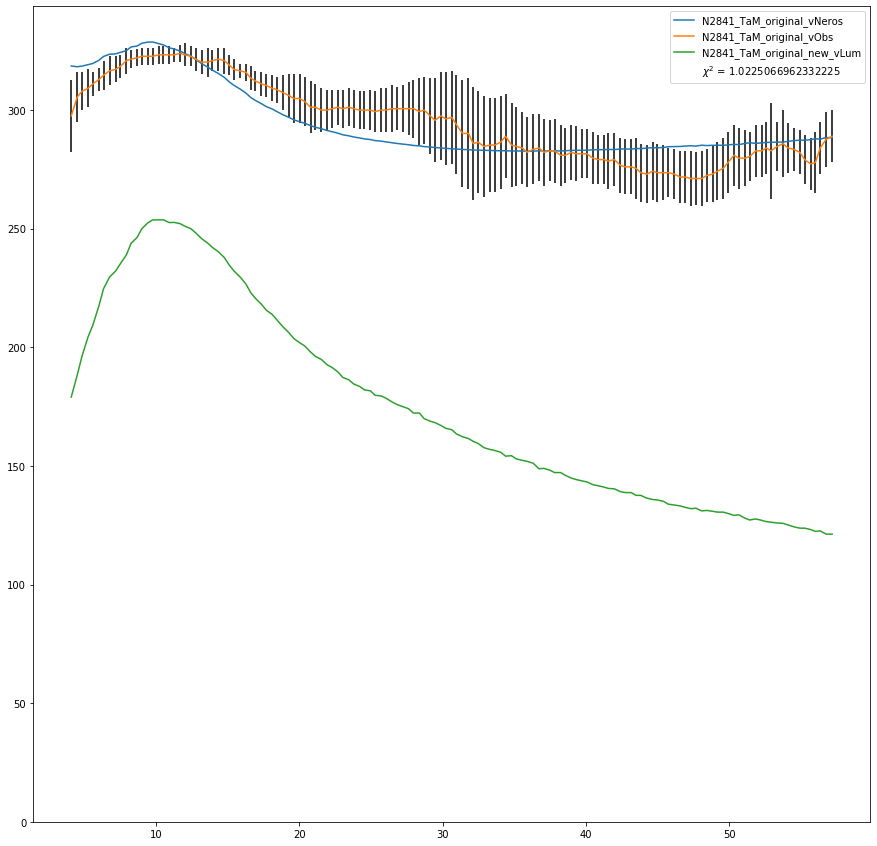

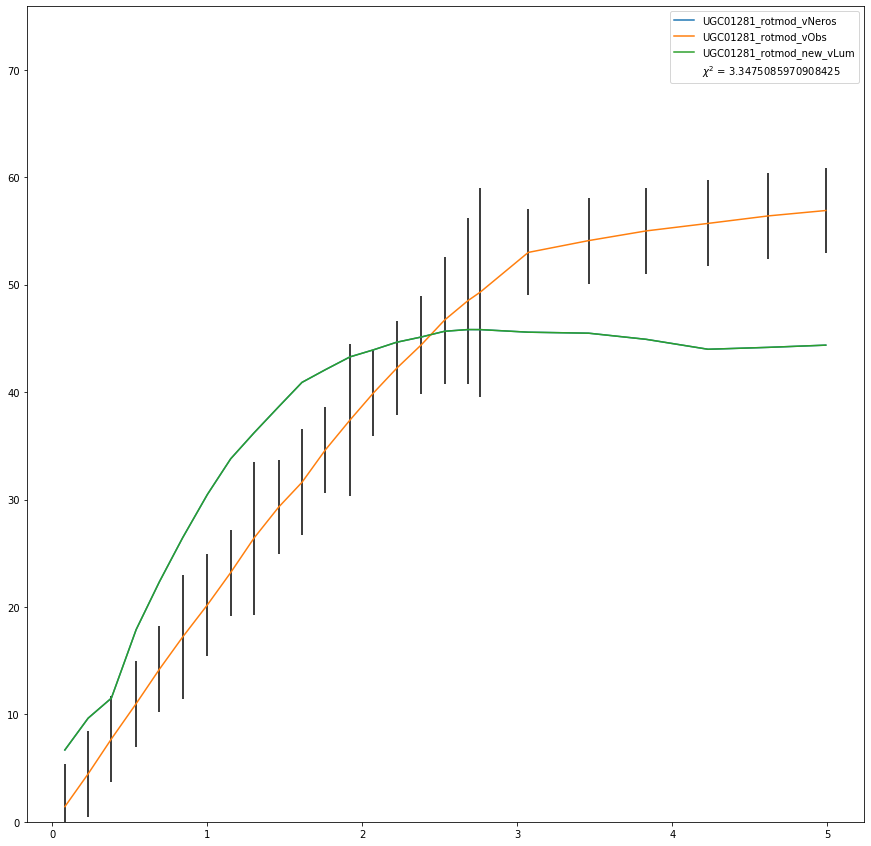

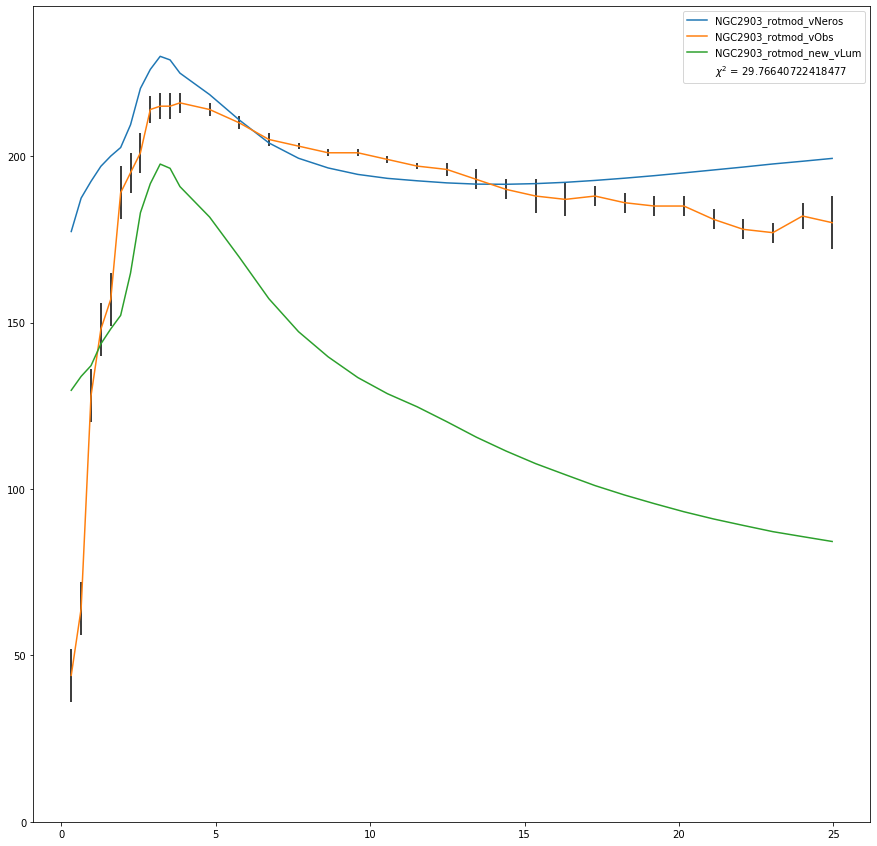

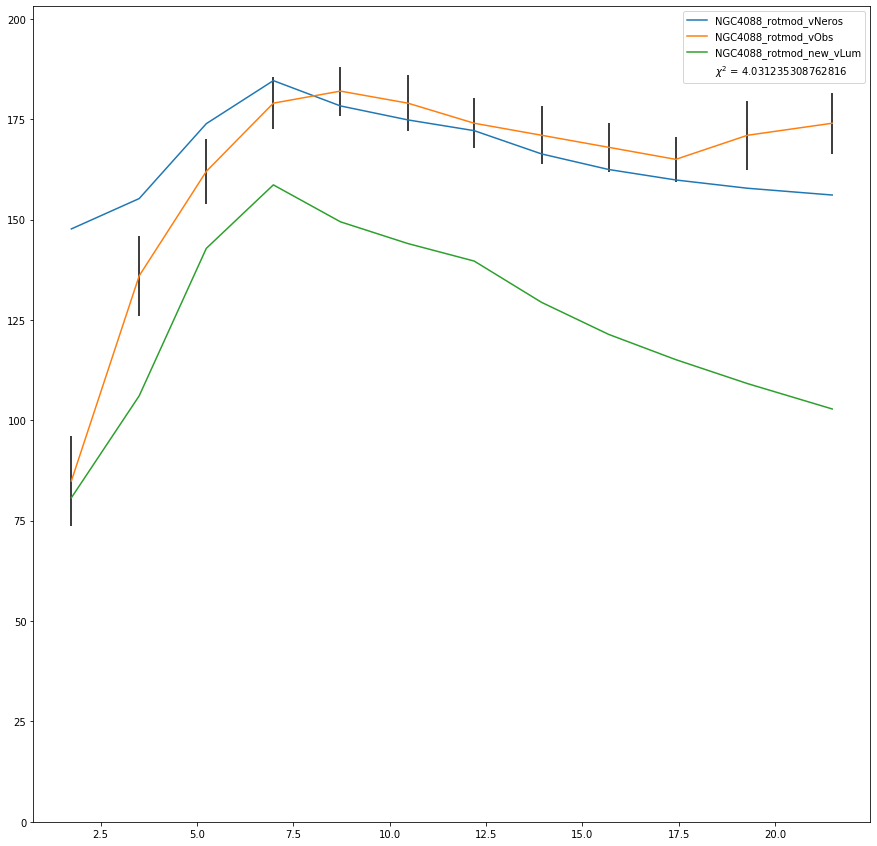

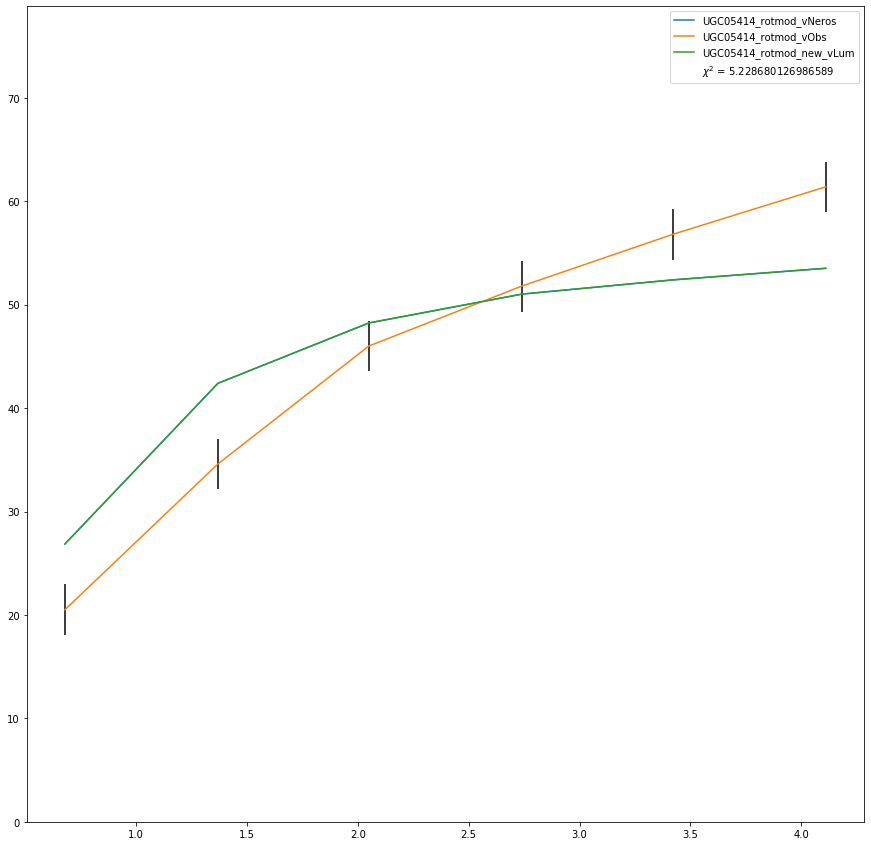

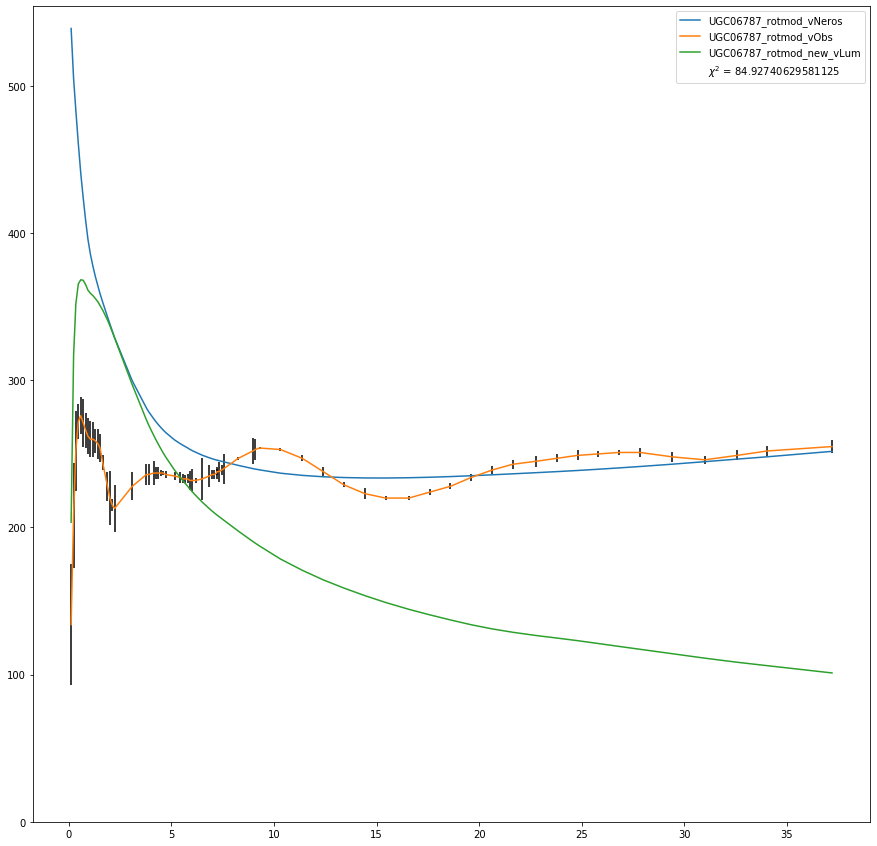

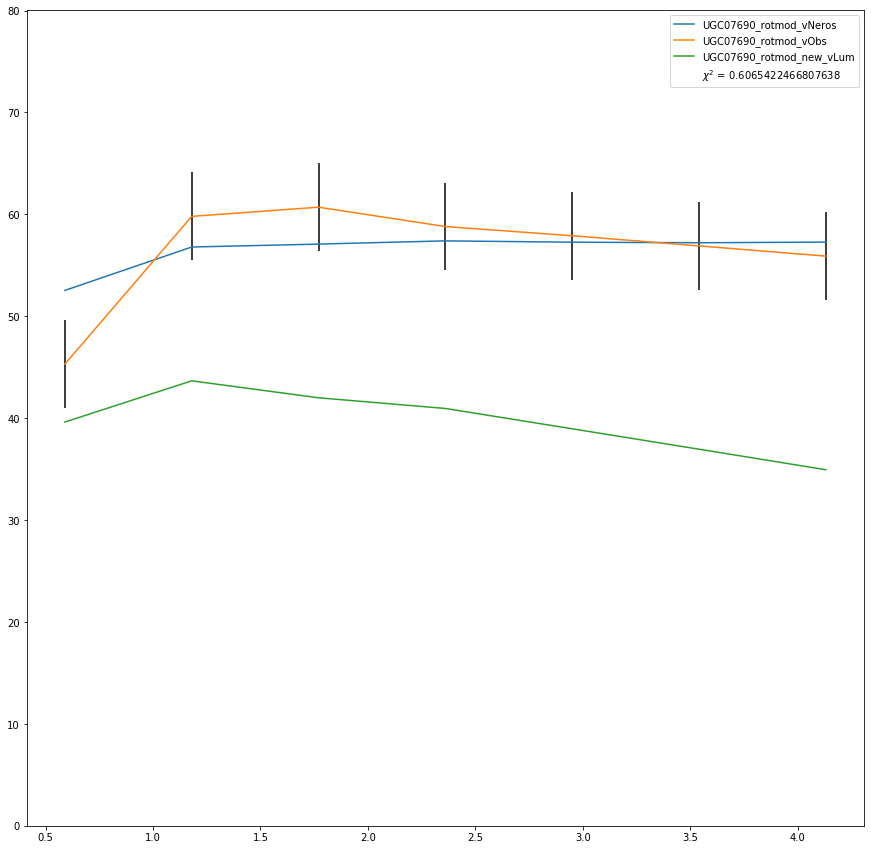

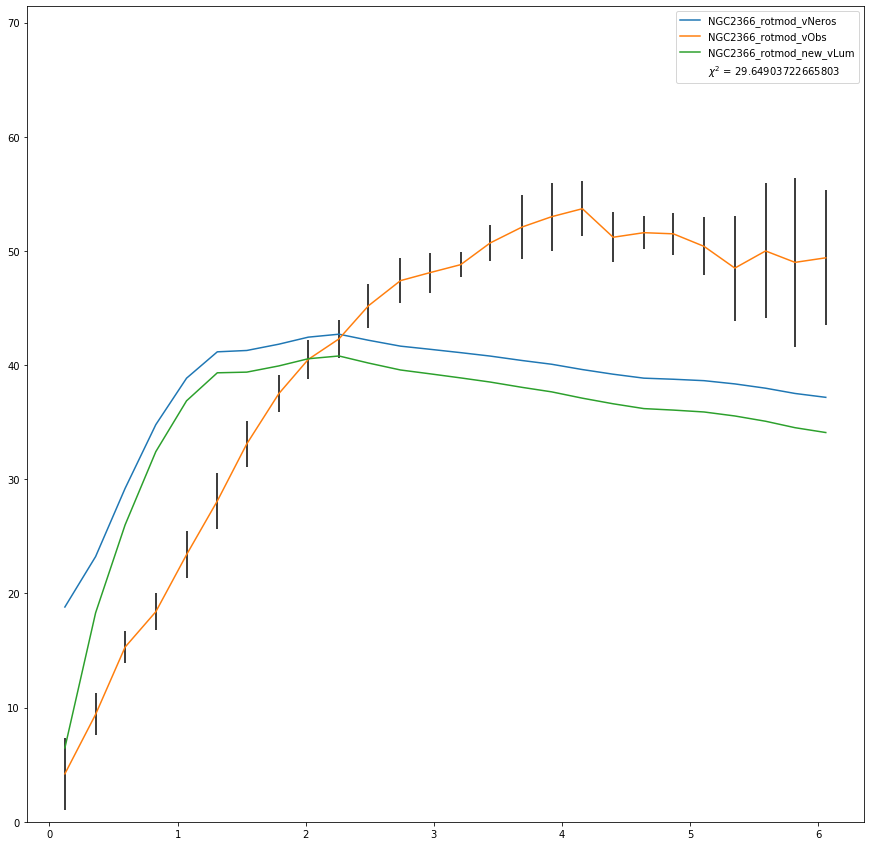

In [6]:
"""
This is the main body of the model. 
It loops through galaxies in the designated sample,
it calculates vLCM, vNeros, and chiSquared,
it fits galaxy data using alpha and vLumFreeParam,
it prints the values of alpha and vLumFreeParam to the console,
and it saves the graphs to a file.
"""

# This is where the fitted alpha & vlum free parameter will be written for each galaxy
out_file = "imported-data/data_" + str(MW_name) + ".csv"
with open(out_file, 'w') as f:
    f.write('{0},{1},{2},{3},{4}\n'.format("Galaxy", "chi_square",  "alpha", "disk_scale", "bulge_scale"))
f.close()

total_chi_squared = []


for galaxyName in galaxies:
    f, ax = plt.subplots(1, figsize = (15, 15))
    
    # Extract out the needed galaxy components
    galaxy = np.array(galaxies[galaxyName])
    galaxy_rad = galaxy[:,0]
    galaxy_vObs = galaxy[:,1]
    galaxy_error = galaxy[:,2]
    galaxy_gas = galaxy[:,3]
    galaxy_disk = galaxy[:,4]
    galaxy_bulge = galaxy[:,5]

    # Just fit then extract the relevant pieces
    neros_fns.fit(galaxy_rad, galaxy_gas, galaxy_disk, galaxy_bulge, galaxy_vObs, galaxy_error)

    print(f"galaxyName is: {galaxyName}")
    fit_results = neros_fns.get_fit_results()
    for param in fit_results:
        print(f"{param} is: {fit_results[param]}")
    print("--------------------------")
    
    total_chi_squared.append(fit_results['chi_squared'])
    
    print("Running average chi_squared: {}".format(sum(total_chi_squared)/len(total_chi_squared)))

    
    # Write galaxyName, fitted parameters
    with open(out_file, 'a') as f:
        f.write(f"{galaxyName},{fit_results['chi_squared']},{fit_results['alpha']},{fit_results['disk_scale']},{fit_results['bulge_scale']},\n")
    f.close()

    trimmed_rad = neros_fns.get_rad()
    trimmed_vLum_updated = neros_fns.get_vLum_scaled()
    trimmed_vObs = neros_fns.get_vObs()
    trimmed_error = neros_fns.get_vObsError()
    vNeros = neros_fns.get_vNeros()
    
    # plot
    # y-axis scales to the maximum velocity value in the list galaxy_vObs_err_incl
    # or to the maximum value in the list vNeros, whichever is the bigger number
    y_max = max(max(trimmed_vObs + trimmed_error), max(vNeros))
    ax.set_ylim(bottom = 0, top = y_max + 15)

    # plot vObs and vNeros and updated vLum
    ax.plot(trimmed_rad, vNeros, label="{}_vNeros".format(galaxyName))
    ax.plot(trimmed_rad, trimmed_vObs, label="{}_vObs".format(galaxyName))
    ax.plot(trimmed_rad, trimmed_vLum_updated, label="{}_new_vLum".format(galaxyName))
    ax.plot([],[], ' ', label="$\chi^2$ = {}".format(fit_results['chi_squared']))

    # error bar in vObs
    for i in range(len(trimmed_rad)):
        ax.vlines(trimmed_rad[i], trimmed_vObs[i] - trimmed_error[i], trimmed_vObs[i] + trimmed_error[i])

    ax.legend(loc="upper right")

    graph_file_name = "graphs/" + str(galaxyName) + "_" + str(MW_name)

    plt.savefig(graph_file_name)
